# Language-agnostic modeling of quality of Wikipedia articles

This notebook provides a tutorial for how to explore the dataset from language-agnostic feature values and quality scores of Wikipedia articles. It has 3 stages:
1. Accessing and extending a sample of the dataset
2. Visualizing features values and qualities scores over time
3. Future Analyses

# ADDRESSING FEEDBACK GIVEN BY MENTOR CAROLINE MYRICK
1. "Your notebook is organized, but could benefit from more section sub-headers". In response to this feedback, I added a header for every plot made in the notebook.
2. “Write your thoughts on the trade-offs between longer vs. shorter granularities and how this affects the visualization.”. In response to this feedback, I have provided analyses on every set of plots on the tradeoffs between short and long granularities.
3. "Could you provide us with some visualizations that are similar to the boxplot we provided, but in which you change the granularity to monthly, daily, or hourly?" In response to this feedback, I have provided plots of varying granularities wherever possible.
4. "For the charts with quality class, the classes are sorted alphabetically even though they have a rank (List, Stub, Start, C, B, GA, FA). You might consider visualizing them in this order so that trends are more clear". In response to this feedback I have ordered all my histograms and bar charts.
5. "You’ve shown predicted quality scores aggregated by time period. Could you additionally show how to aggregate this data by importance class and pageviews? (you can just use February 2024's pageviews for this)." In response to this feedback I have derived various plots of different granularities showing aggregation by importance class and page_views also.
6. "For the third TODO, we asked you to "create data visualizations using different types of charts and proposing approaches to filtering and aggregating data." Can you make it clearer in either your comments or your discussion what aggregation or filtering choices you've made?" In response to this feedback, I have included a section for every set of plots to show my reasoning for filtering and aggregating data in a particular way.
7. "Since this Outreachy project will focus heavily on visualization, can you provide us with more future visualizations you could do? You don’t need to write any code, but describe what the visualizations would look like, and/or how a user of the visualization would interact with it." In response to this feedback I have explained some new visualizations that I would like to create and how a user can interact with them.


## 1. Accessing to the data

The dataset of language-agnostic feature values and quality scores of Wikipedia articles available on [Zenodo](https://zenodo.org/records/10495081) is too large to handle with a Jupyter notebook. For that reason, we have prepared a sample with the revisions of English Wikipedia articles maintained by [WikiProject Climate change](https://en.wikipedia.org/wiki/Wikipedia:WikiProject_Climate_change) with the following columns:
- wiki_db: Wikipedia language edition ('enwiki' in this sample).
- page_id: Id of the page (in the corresponding Wikipedia language edition).
- revision_id: Id of the revision (in the corresponding Wikipedia language edition).
- page_length:  Number of bytes of the revision.
- num_refs:  Number of references of the revision.
- num_wikilinks: Number of wikilinks of the revision.
- num_categories: Number of categories of the revision.
- num_media: Number of media files of the revision.
- num_headings: Number of sections of the revision.
- item_id: Id of the page in Wikidata.
- pred_qual: Predicted quality score between 0 and 1.

In [ ]:
# TODO: add other libraries here as necessary
import pandas as pd #pandas is used to work with dataframes and series
import numpy as np # used to work with arrays
import seaborn as sns # used for visualization
import matplotlib.pyplot as plt #used for visualization
sns.set_theme() #applies the default theme

#### A. Short Exploration of df_revisions

In [ ]:
# Read the zipped CSV
df_revisions = pd.read_csv('https://public-paws.wmcloud.org/User:Pablo%20(WMF)/outreachy/round28/features_scores_climatechange_2022.csv.zip')
df_revisions

wiki_db   page_id  revision_id    revision_timestamp  page_length  \
0        enwiki    348869    366664976  2010-06-07T22:45:20Z        10464   
1        enwiki    348869    251114181  2008-11-11T15:34:55Z         4049   
2        enwiki    348869    712041311  2016-03-26T15:07:18Z        20701   
3        enwiki    348869    341876534  2010-02-04T12:02:16Z        10100   
4        enwiki    348869    519730962  2012-10-25T09:56:12Z        17858   
...         ...       ...          ...                   ...          ...   
1456207  enwiki  66790245   1069533455  2022-02-02T19:41:20Z        42178   
1456208  enwiki  66790245   1007245703  2021-02-17T04:02:02Z          744   
1456209  enwiki  66790245   1041821278  2021-09-01T18:18:01Z         5728   
1456210  enwiki  66790245   1055285832  2021-11-15T00:29:52Z        34922   
1456211  enwiki  66790245   1083221740  2022-04-17T18:49:10Z        40452   

         num_refs  num_wikilinks  num_categories  num_media  num_headings  \
0              11             66               4          2             7   
1               0             41               4          2             3   
2              28             84               4          2            10   
3              11             61               4          2             7   
4              21             93               4          2             9   
...           ...            ...             ...        ...           ...   
1456207        81            118               4          2            14   
1456208         1              2               0          0             0   
1456209         9             19               4          0             5   
1456210        80            115               4          1            14   
1456211        80            119               4          2            14   

            item_id  pred_qual  
0          Q1137345   0.557963  
1          Q1137345   0.397999  
2          Q1137345   0.696191  
3          Q1137345   0.554477  
4          Q1137345   0.654836  
...             ...        ...  
1456207  Q105549782   0.797312  
1456208  Q105549782   0.139069  
1456209  Q105549782   0.401310  
1456210  Q105549782   0.770978  
1456211  Q105549782   0.800184  

[1456212 rows x 12 columns]

In [ ]:
df_revisions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456212 entries, 0 to 1456211
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   wiki_db             1456212 non-null  object 
 1   page_id             1456212 non-null  int64  
 2   revision_id         1456212 non-null  int64  
 3   revision_timestamp  1456212 non-null  object 
 4   page_length         1456212 non-null  int64  
 5   num_refs            1456212 non-null  int64  
 6   num_wikilinks       1456212 non-null  int64  
 7   num_categories      1456212 non-null  int64  
 8   num_media           1456212 non-null  int64  
 9   num_headings        1456212 non-null  int64  
 10  item_id             1456212 non-null  object 
 11  pred_qual           1456212 non-null  float64
dtypes: float64(1), int64(8), object(3)
memory usage: 133.3+ MB


##### i). Observations
1. There are no missing data values or rows in df_revision
2. Page_id and revision_id have a data type of integer which is not ideal for identification. They should be turned into strings
3. The revision_timestamp column has a data type of object but should be converted into a Datetime data type using pandas
4. Item_id has a data type of integer which is not ideal for identification. It should be converted into a string data type.

In [ ]:
df_revisions.nunique()

wiki_db                     1
page_id                  3642
revision_id           1456212
revision_timestamp    1453056
page_length            168920
num_refs                  767
num_wikilinks            1275
num_categories            190
num_media                  89
num_headings              126
item_id                  3642
pred_qual             1039654
dtype: int64

##### ii). Observations
1. All entries are derived from the english language wikidb.
2. The dataset provides data of the revision history of 3642 wikipedia articles.
3. There are a total of 1,456, 212 revisions made on 3642 wikipedia articles.
4. The quality score of each revision is recorded per article at the time it was made and we need to record these changes in quality from the earliest revision date to the latest revision date.

#### B. Data Wrangling
1. Convert the data types of page_id, revision_id, and item_id to strings / object using the astype method in pandas.
2. Convert the revision_timestamp column to Datetime.

In [ ]:
# convert the ids to strings
df_revisions = df_revisions.astype({"page_id": object, "item_id": object, "revision_id": object})
df_revisions.loc[:, ["page_id", "item_id", "revision_id"]].dtypes

page_id        object
item_id        object
revision_id    object
dtype: object

In [ ]:
# convert revision_timestamp to date
df_revisions["revision_timestamp"] = pd.to_datetime(df_revisions["revision_timestamp"])
df_revisions["revision_timestamp"].dtype

datetime64[ns, UTC]

In [ ]:
# As mentioned above, pages are English Wikipedia articles maintained by WikiProject Climate change.
# The id and title of these pages, together with their quality class and importance class can be extracted with the following Quarry query:
# https://quarry.wmcloud.org/query/52210
df_pages = pd.read_csv('https://quarry.wmcloud.org/query/52210/result/latest/0/csv')
df_pages

page_id                            page_title quality_class  \
0           39                                Albedo             B   
1          627                           Agriculture            GA   
2          903                           Arable_land             C   
3         1365                               Ammonia             B   
4         3201  Attribution_of_recent_climate_change             B   
...        ...                                   ...           ...   
3812  73428116                  Anne_Therese_Gennari         Start   
3813  73464356                   Christopher_Magadza             C   
3814  73540566                       Britney_Schmidt             C   
3815  73569052     Rainwater_harvesting_in_the_Sahel             C   
3816  73608388                         Judy_Lawrence          Stub   

     importance_class  
0                High  
1                 Low  
2                 Low  
3                 Low  
4                High  
...               ...  
3812              Low  
3813              Low  
3814              Low  
3815              Low  
3816          Unknown  

[3817 rows x 4 columns]

#### C. A Short exploraton of df_pages

In [ ]:
df_pages.info()
# there are 3817 entries but df_revisions only has 3642 articles

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   page_id           3817 non-null   int64 
 1   page_title        3817 non-null   object
 2   quality_class     3687 non-null   object
 3   importance_class  3688 non-null   object
dtypes: int64(1), object(3)
memory usage: 119.4+ KB


In [ ]:
df_pages.nunique()
# all page_ids and page_titles are unique and NOT repeated
# it is expeced that quality class and importance_class to have repeated values

page_id             3817
page_title          3817
quality_class          7
importance_class       5
dtype: int64

In [ ]:
df_pages.isna().sum()
# there are no whole row null entries in df_pages
# however, we are missing some quality classes and importance classes
# we will decide whether to drop these columns later on

page_id               0
page_title            0
quality_class       130
importance_class    129
dtype: int64

In [ ]:
df_pages.dtypes
# the page_id column is of type int but it is better if we turn it to type object

page_id              int64
page_title          object
quality_class       object
importance_class    object
dtype: object

In [ ]:
# change the page_id column to an object
df_pages = df_pages.astype({"page_id": object})
df_pages.dtypes

page_id             object
page_title          object
quality_class       object
importance_class    object
dtype: object

In [ ]:
# Both dataframes can be merged to extend metadata of the revisions samples
df_revisions = df_revisions.merge(df_pages, how = "left", on='page_id')
# we use the how parameter to keep all the other entries in the original df_revisions dataframe

In [ ]:
df_revisions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456212 entries, 0 to 1456211
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype              
---  ------              --------------    -----              
 0   wiki_db             1456212 non-null  object             
 1   page_id             1456212 non-null  object             
 2   revision_id         1456212 non-null  object             
 3   revision_timestamp  1456212 non-null  datetime64[ns, UTC]
 4   page_length         1456212 non-null  int64              
 5   num_refs            1456212 non-null  int64              
 6   num_wikilinks       1456212 non-null  int64              
 7   num_categories      1456212 non-null  int64              
 8   num_media           1456212 non-null  int64              
 9   num_headings        1456212 non-null  int64              
 10  item_id             1456212 non-null  object             
 11  pred_qual           1456212 non-null  float64            
 12  

In [ ]:
df_revisions.head(2)

wiki_db page_id revision_id        revision_timestamp  page_length  \
0  enwiki  348869   366664976 2010-06-07 22:45:20+00:00        10464   
1  enwiki  348869   251114181 2008-11-11 15:34:55+00:00         4049   

   num_refs  num_wikilinks  num_categories  num_media  num_headings   item_id  \
0        11             66               4          2             7  Q1137345   
1         0             41               4          2             3  Q1137345   

   pred_qual                  page_title quality_class importance_class  
0   0.557963  North_Atlantic_oscillation         Start          Unknown  
1   0.397999  North_Atlantic_oscillation         Start          Unknown

In [ ]:
!pip install mwviews
from mwviews.api import PageviewsClient

  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=22294097784ae55e7a5eec4e44f7851485d6b4a5d0621d1d7cbc1b69ade2ddb2
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
# TODO: For any article, you need to use the API to gather pageviews count
# in the time period each revision was made.
# mwviews documentation: https://github.com/mediawiki-utilities/python-mwviews
# user_agent helps identify the request if there's an issue and is best practice
tutorial_label = 'PAWS Language-agnostic quality modeling tutorial (mwapi)'
# NOTE: it is best practice to include a contact email in user agents
# generally this is private information though so do not change it to yours
# if you are working in the PAWS environment or adding to a Github repo
# for Outreachy, you can leave this as Pablo's email or switch it to your Mediawiki username
# e.g., Pablo (WMF) for https://www.mediawiki.org/wiki/User:Pablo_(WMF)
contact_email = 'paragon@wikimedia.org'
p = PageviewsClient(user_agent=f'<{contact_email}> {tutorial_label}')
# See below an example for monthly pageviews of two given articles in 2022
# views = p.article_views('en.wikipedia', ['Albedo'], granularity='daily', start='202201012')
# views

#### D. TODO - Gather PageViews for Articles in Each Revision Timestamp

##### Step 1
- Create a function that can turn dates into the required format to be passed into the pageviews client api. The dates should be strings and an example format is "20221201".

In [ ]:
# import datetime module to work with dates
from datetime import datetime, timedelta
import asyncio # asyncio will be used to create an asynchronous function while fetching page views

In [ ]:
def add_date(x):
    # gets the date into a right format for placing in mviews api for example 2022010212
    # returns the date in a string format
    # x is the article name
    month = x.month #gets month from the timestamp
    year = x.year #gets year from the timestamp
    day = x.day #gets day from the timestamp
    hour = x.hour #gets the hour
    date = str(year) #final return value
    if month < 10:
        month_temp = "0" + str(month); # adds a zero to months below October
        date  = date + month_temp;
    else:
        date = date + str(month)
    day = str(day)
    if (len(day) == 1):
        date =  date + "0" + day; #adds a zero to days below date 10
    else:
        date = date + day
    hour = str(hour)
    if len(hour) == 1:
        date = date + "0" + hour
    else:
        date = date + hour
    return date
year_month_day_revision = df_revisions.revision_timestamp.transform(lambda x: add_date(x)) #use transform function to change revision timestamp to
# string format
year_month_day_revision

0          2010060722
1          2008111115
2          2016032615
3          2010020412
4          2012102509
              ...    
1456207    2022020219
1456208    2021021704
1456209    2021090118
1456210    2021111500
1456211    2022041718
Name: revision_timestamp, Length: 1456212, dtype: object

##### Step 2
- Add the new dates into the main dataframe

In [ ]:
# adds a new column of the string representation of revision_timestamp to the main dataframe df_revisions
df_revisions["year_month_day_revision"] = year_month_day_revision
df_revisions.head(3)

wiki_db page_id revision_id        revision_timestamp  page_length  \
0  enwiki  348869   366664976 2010-06-07 22:45:20+00:00        10464   
1  enwiki  348869   251114181 2008-11-11 15:34:55+00:00         4049   
2  enwiki  348869   712041311 2016-03-26 15:07:18+00:00        20701   

   num_refs  num_wikilinks  num_categories  num_media  num_headings   item_id  \
0        11             66               4          2             7  Q1137345   
1         0             41               4          2             3  Q1137345   
2        28             84               4          2            10  Q1137345   

   pred_qual                  page_title quality_class importance_class  \
0   0.557963  North_Atlantic_oscillation         Start          Unknown   
1   0.397999  North_Atlantic_oscillation         Start          Unknown   
2   0.696191  North_Atlantic_oscillation         Start          Unknown   

  year_month_day_revision  
0              2010060722  
1              2008111115  
2              2016032615

In [ ]:
# adds the column year of revision timestamp to the dataframe
year_series = df_revisions.revision_timestamp.transform(lambda x: x.year) #year series
df_revisions["revision_year"] = year_series
df_revisions.head(2)

wiki_db page_id revision_id        revision_timestamp  page_length  \
0  enwiki  348869   366664976 2010-06-07 22:45:20+00:00        10464   
1  enwiki  348869   251114181 2008-11-11 15:34:55+00:00         4049   

   num_refs  num_wikilinks  num_categories  num_media  num_headings   item_id  \
0        11             66               4          2             7  Q1137345   
1         0             41               4          2             3  Q1137345   

   pred_qual                  page_title quality_class importance_class  \
0   0.557963  North_Atlantic_oscillation         Start          Unknown   
1   0.397999  North_Atlantic_oscillation         Start          Unknown   

  year_month_day_revision  revision_year  
0              2010060722           2010  
1              2008111115           2008

In [ ]:
# add the months column of revision_timestamp to df_revisions
months_series = df_revisions.revision_timestamp.transform(lambda x: x.month) #month series
df_revisions["revision_months"] = months_series
df_revisions.head(2)

wiki_db page_id revision_id        revision_timestamp  page_length  \
0  enwiki  348869   366664976 2010-06-07 22:45:20+00:00        10464   
1  enwiki  348869   251114181 2008-11-11 15:34:55+00:00         4049   

   num_refs  num_wikilinks  num_categories  num_media  num_headings   item_id  \
0        11             66               4          2             7  Q1137345   
1         0             41               4          2             3  Q1137345   

   pred_qual                  page_title quality_class importance_class  \
0   0.557963  North_Atlantic_oscillation         Start          Unknown   
1   0.397999  North_Atlantic_oscillation         Start          Unknown   

  year_month_day_revision  revision_year  revision_months  
0              2010060722           2010                6  
1              2008111115           2008               11

##### Step 3
- Create a function that takes as an argument the article name and returns a dataframe containing all page views in the time period a revision was made.

In [ ]:
# next step is to add the views for each revision timestamp using mviews
# this function can fetch page_views for respective revision_timestamps.
# the function can also fetch page_views for a range of revision_timestamps namely from the first timestamp to the last timestamp
# the function can also take in a sample year and sample month to get page_views on a daily granularity for that month
async def add_view(x, df, granularity, range_diff=False, sample_month = None, sample_year = None):
    # x - page_title or article name
    # df - dataframe or df_revisions specifically
    # granularity - interval of views ie daily, hourly, or monthrly
    # range_diff is a boolean value that instructs the function to only take the first and last revision_timestamp. if True then the range is taken
    # and calculate page_views between those dates
    # sample_month - a month ranging from 1 to 12 from which a sample of pageviews can be derived
    # sample_year -  a year from which a sample of pageviews can be derived
    # returns a new dataframe with added pageviews for each revision timestamp or a range of pageviews from the earliest to the latest date

    #1. get a smaller dataframe with the page_title == x
    new_df = df.loc[df.page_title == x]
    # 2. If article does not exist then exit the function
    # check if both sample_month and sample year is given otherwise throw an error if one is given and the other is not
    if len(new_df) == 0:
        return ["No rows matched your article page_title", "No rows matched your article page_title"]

    if sample_month or sample_year:
      # if sample month and sample year are given, page views will be collected for that month and year
      if not sample_month or not sample_year:
        return ["Please provide both sample_month and sample_year", "Please provide both sample_month and sample_year"]
      if sample_month < 1 or sample_month > 12:
        # make sure sample month is between 1 and 12
        return ["Sample_month should be bettween 1 and 12 inclusive", "Sample_month should be bettween 1 and 12 inclusive"]
      start_date = f"{sample_year}{sample_month}01"
      if sample_month < 10:
        start_date = f"{sample_year}0{sample_month}01"
      next_month = sample_month + 1
      end_date = f"{sample_year}{next_month}01"
      if next_month < 10:
        end_date = f"{sample_year}0{next_month}01"
      try:
        article_views = p.article_views('en.wikipedia', [x], granularity = "daily", start = start_date, end = end_date)
        return [article_views, {}]
      except Exception as e:
        print(e)
        return ["Error with sample", "Error with sample"]

    #3. sort new_df according to revision_timestamp - this represents the order or revisions from earliest to latest
    new_df = new_df.sort_values(by = "revision_timestamp")

    #4. calculate values for end dates ie: get cumulative differences between timestamps
    # creates a series of differences in revision_timestamp using the diff() function,
    # then reset_index and drops the first index which is a NaT, then
    # resets index again to prevent issues when adding it to the main df
    cumulative_difference = new_df.revision_timestamp.diff().reset_index(drop = True).drop(0).reset_index(drop = True)

    #5. add cumulative difference to start dates
    end_date = new_df.revision_timestamp.reset_index(drop = True)  + cumulative_difference # adds the revision_timestamp

    #6.  add end_date as a revision_timestamp to the dataframe first
    new_df = new_df.reset_index(drop = True) #reset index to prevent adding based on index
    new_df["revision_timestamp_end"] = end_date

    #7. bring in the add_date function to transform the end_dates into a desireable format
    end_date = end_date.transform(lambda x: add_date(x))

    #8. add end_date to new_df
    new_df["end_date"] = end_date

    #9. add page_views from mview
    views_dict = {} #will carry all the views for each revision period

    if range_diff:
      # here we take the pageviews between a range of two dates only
        start_date = new_df.year_month_day_revision[0] #gets the first revision date
        end_date = new_df.end_date[len(new_df) - 2] #gets the last revision date
        views = p.article_views('en.wikipedia', [x], granularity=granularity, start = start_date, end = end_date)
        return [views, new_df] # returns both the dataframe and the views dict

    for i, row in new_df.iterrows():
        # these variables represent the timestamps when revisions were made and when individual revision periods ended
        revision_date = row.revision_timestamp
        revision_date_end = row.revision_timestamp_end
        diff = revision_date_end - revision_date #gets difference between the two dates to get an interval

        year_month_day_start = row.year_month_day_revision #string versions of start and end dates
        year_month_day_end = row.end_date #string versions of start and end dates

        # since data is only available from July, 2015, we will skip all timestamps below this date
        year = revision_date.year
        month = revision_date.month

        if year < 2015:
            continue
        if year >= 2015 and month < 7:
            continue
        # check for granularity and time period between revision_timestamps to make sure they are of the right length

        if granularity == "monthly":
            # make sure that difference in revision_timestamp is over a month. Days are over 30
            days = diff.days;
            if month == 2 and year % 4 == 0:
                # leap year February has 29 days
                if days < 29:
                    continue
            elif month == 2:
                if days < 28:
                    continue
            elif days < 30:
                continue
        elif granularity == "daily":
            days = diff.days
            if days < 1:
                continue
        elif granularity == "hourly":
            seconds = diff.seconds
            if seconds < 3600:
                continue

        # if year_month_day_start == year_month_day_end, then we also skip that date
        if year_month_day_start == year_month_day_end:
            # views_dict[views_dict_key] = 0
            # views_dict_key += 1
            continue

        try:
            article_views =  p.article_views('en.wikipedia', [x], granularity=granularity, start = year_month_day_start, end = year_month_day_end)
            if article_views:
                # finds the average of all articles within the dict
                num_views = 0
                for i in article_views:
                    page_views = article_views[i][x] #accesses the pageviews from article views
                    if page_views: #checks if the value of page_views is not a None value
                      num_views += page_views # gets the views count
                      # set the key of the dict as the revision_timestamp
                      views_dict[i] = num_views
            else:
                views_dict[i] = 0 #if no value was returned place 0 as the default page_views
        except Exception as err:
            print(err)
            pass
    return [views_dict, new_df] #returns both the page_views over different timestamps in a dict and the new_df formed
Will_Steffen_Monthly = await add_view("Will_Steffen", df_revisions, "monthly") # Will_Steffen article and respective views for resivion timestamp periods
Will_Steffen_Monthly_Views = Will_Steffen_Monthly[0]
Will_Steffen_Monthly_Views

time data 'nannannannan' does not match format '%Y%m%d%H'


{datetime.datetime(2015, 11, 1, 0, 0): 453,
 datetime.datetime(2015, 10, 1, 0, 0): 577,
 datetime.datetime(2015, 12, 1, 0, 0): 847,
 datetime.datetime(2016, 10, 1, 0, 0): 375,
 datetime.datetime(2016, 11, 1, 0, 0): 896,
 datetime.datetime(2016, 9, 1, 0, 0): 633,
 datetime.datetime(2017, 3, 1, 0, 0): 501,
 datetime.datetime(2017, 5, 1, 0, 0): 1314,
 datetime.datetime(2017, 4, 1, 0, 0): 1775,
 datetime.datetime(2017, 6, 1, 0, 0): 2208,
 datetime.datetime(2017, 2, 1, 0, 0): 2843,
 datetime.datetime(2016, 12, 1, 0, 0): 3282,
 datetime.datetime(2017, 7, 1, 0, 0): 1093,
 datetime.datetime(2017, 1, 1, 0, 0): 3767,
 datetime.datetime(2017, 9, 1, 0, 0): 495,
 datetime.datetime(2017, 10, 1, 0, 0): 1596,
 datetime.datetime(2017, 8, 1, 0, 0): 1720,
 datetime.datetime(2018, 5, 1, 0, 0): 385,
 datetime.datetime(2018, 12, 1, 0, 0): 704,
 datetime.datetime(2018, 10, 1, 0, 0): 1310,
 datetime.datetime(2018, 2, 1, 0, 0): 2018,
 datetime.datetime(2018, 8, 1, 0, 0): 3152,
 datetime.datetime(2017, 12, 1, 0

In [ ]:
# we can also obtain a sample from the add_views function
# this is a sample of article views for the year 2024, February
Will_Steffen_Sample = await add_view("Will_Steffen", df_revisions, "daily", False, 2, 2024)
Will_Steffen_Sample_Views = Will_Steffen_Sample[0] #access the first return value of the add_view function
Will_Steffen_Sample_Views

defaultdict(dict,
            {datetime.datetime(2024, 2, 1, 0, 0): {'Will_Steffen': 32},
             datetime.datetime(2024, 2, 2, 0, 0): {'Will_Steffen': 29},
             datetime.datetime(2024, 2, 3, 0, 0): {'Will_Steffen': 32},
             datetime.datetime(2024, 2, 4, 0, 0): {'Will_Steffen': 24},
             datetime.datetime(2024, 2, 5, 0, 0): {'Will_Steffen': 15},
             datetime.datetime(2024, 2, 6, 0, 0): {'Will_Steffen': 39},
             datetime.datetime(2024, 2, 7, 0, 0): {'Will_Steffen': 25},
             datetime.datetime(2024, 2, 8, 0, 0): {'Will_Steffen': 26},
             datetime.datetime(2024, 2, 9, 0, 0): {'Will_Steffen': 28},
             datetime.datetime(2024, 2, 10, 0, 0): {'Will_Steffen': 23},
             datetime.datetime(2024, 2, 11, 0, 0): {'Will_Steffen': 16},
             datetime.datetime(2024, 2, 12, 0, 0): {'Will_Steffen': 29},
             datetime.datetime(2024, 2, 13, 0, 0): {'Will_Steffen': 27},
             datetime.datetime(2024, 2, 14

#### Step 4
- Create a function that returns a series of page_views for a particular article name

In [ ]:
# create a series object from the views
def create_series(dictionary, page_title):
    # dictionary - gotten from the previous function add_views which returns a dictionary with pageviews
    # page_title = article name
    # returns a series without any null values
    new_dict = {}
    for i in dictionary:
        element = dictionary[i]
        if type(element) is not dict:
          # checks to see if the d
          new_dict[i] = element
        else:
          views = element[page_title]
          new_dict[i] = views
    views = pd.Series(new_dict, name = "views").sort_index().dropna()
    return views
Will_Steffen_Series = create_series(Will_Steffen_Monthly_Views, "Will_Steffen")
Will_Steffen_Series #variable carries the total number of pageviews for each revision timestamp belonging to Will_Steffn article

2015-10-01     577
2015-11-01     453
2015-12-01     847
2016-09-01     633
2016-10-01     375
2016-11-01     896
2016-12-01    3282
2017-01-01    3767
2017-02-01    2843
2017-03-01     501
2017-04-01    1775
2017-05-01    1314
2017-06-01    2208
2017-07-01    1093
2017-08-01    1720
2017-09-01     495
2017-10-01    1596
2017-11-01    4297
2017-12-01    3491
2018-01-01    7131
2018-02-01    2018
2018-03-01    4705
2018-04-01    5416
2018-05-01     385
2018-06-01    3866
2018-07-01    5027
2018-08-01    3152
2018-09-01    6108
2018-10-01    1310
2018-11-01    6649
2018-12-01     704
2019-08-01    1343
2019-09-01    3286
2019-10-01    1293
2019-11-01    2493
2019-12-01    3052
2020-01-01    1290
2020-02-01    2659
2020-03-01    1787
2020-10-01     332
2020-11-01    1149
2020-12-01    2648
2021-01-01    1104
2021-02-01    1942
2021-03-01    3727
2021-04-01    4721
2021-05-01    2733
2021-09-01    4858
2021-10-01    2004
2021-11-01     914
2021-12-01    6335
2022-01-01    5702
2022-02-01  

In [ ]:
# creates a series from the sample views of articles belonging to article name == Will_Steffen
Will_Steffen_Series_Sample = create_series(Will_Steffen_Sample_Views, "Will_Steffen")
Will_Steffen_Series_Sample

2024-02-01    32
2024-02-02    29
2024-02-03    32
2024-02-04    24
2024-02-05    15
2024-02-06    39
2024-02-07    25
2024-02-08    26
2024-02-09    28
2024-02-10    23
2024-02-11    16
2024-02-12    29
2024-02-13    27
2024-02-14    20
2024-02-15    26
2024-02-16    24
2024-02-17    21
2024-02-18    23
2024-02-19    21
2024-02-20    38
2024-02-21    27
2024-02-22    38
2024-02-23    24
2024-02-24    16
2024-02-25    47
2024-02-26    23
2024-02-27    60
2024-02-28    18
2024-02-29    45
2024-03-01    27
Name: views, dtype: int64

In [ ]:
# function that creates a dataframe from  series and adds columns for both year and month
def create_dataframe(x):
  # creates a df from a series
  # the parameter x is specific to the return value of the create_series function and which has a date and views columns
  new_df = pd.DataFrame(x).reset_index().rename({"index": "view_date"}, axis = 1)
  #reset_index to remove the date column as the index then rename it from index to view_date
  year_column = new_df.loc[:, "view_date"].transform(lambda x: x.year) #gets year value from the timestamp
  month_column = new_df.loc[:, "view_date"].transform(lambda x: x.month) #gets month value from the timestamp
  day_column = new_df.loc[:, "view_date"].transform(lambda x: x.day) #gets day value from the timestamp
  # assign to new_df
  new_df["year_view"] = year_column
  new_df["month_view"] = month_column
  new_df["day_view"] = day_column
  return new_df
Will_Steffen_Sample_df = create_dataframe(Will_Steffen_Series_Sample)
Will_Steffen_Sample_df

view_date  views  year_view  month_view  day_view
0  2024-02-01     32       2024           2         1
1  2024-02-02     29       2024           2         2
2  2024-02-03     32       2024           2         3
3  2024-02-04     24       2024           2         4
4  2024-02-05     15       2024           2         5
5  2024-02-06     39       2024           2         6
6  2024-02-07     25       2024           2         7
7  2024-02-08     26       2024           2         8
8  2024-02-09     28       2024           2         9
9  2024-02-10     23       2024           2        10
10 2024-02-11     16       2024           2        11
11 2024-02-12     29       2024           2        12
12 2024-02-13     27       2024           2        13
13 2024-02-14     20       2024           2        14
14 2024-02-15     26       2024           2        15
15 2024-02-16     24       2024           2        16
16 2024-02-17     21       2024           2        17
17 2024-02-18     23       2024           2        18
18 2024-02-19     21       2024           2        19
19 2024-02-20     38       2024           2        20
20 2024-02-21     27       2024           2        21
21 2024-02-22     38       2024           2        22
22 2024-02-23     24       2024           2        23
23 2024-02-24     16       2024           2        24
24 2024-02-25     47       2024           2        25
25 2024-02-26     23       2024           2        26
26 2024-02-27     60       2024           2        27
27 2024-02-28     18       2024           2        28
28 2024-02-29     45       2024           2        29
29 2024-03-01     27       2024           3         1

In [ ]:
Will_Steffen_df = create_dataframe(Will_Steffen_Series)
Will_Steffen_df #dataframe of entire revisions made on the Will Steffen article

view_date  views  year_view  month_view  day_view
0  2015-10-01    577       2015          10         1
1  2015-11-01    453       2015          11         1
2  2015-12-01    847       2015          12         1
3  2016-09-01    633       2016           9         1
4  2016-10-01    375       2016          10         1
5  2016-11-01    896       2016          11         1
6  2016-12-01   3282       2016          12         1
7  2017-01-01   3767       2017           1         1
8  2017-02-01   2843       2017           2         1
9  2017-03-01    501       2017           3         1
10 2017-04-01   1775       2017           4         1
11 2017-05-01   1314       2017           5         1
12 2017-06-01   2208       2017           6         1
13 2017-07-01   1093       2017           7         1
14 2017-08-01   1720       2017           8         1
15 2017-09-01    495       2017           9         1
16 2017-10-01   1596       2017          10         1
17 2017-11-01   4297       2017          11         1
18 2017-12-01   3491       2017          12         1
19 2018-01-01   7131       2018           1         1
20 2018-02-01   2018       2018           2         1
21 2018-03-01   4705       2018           3         1
22 2018-04-01   5416       2018           4         1
23 2018-05-01    385       2018           5         1
24 2018-06-01   3866       2018           6         1
25 2018-07-01   5027       2018           7         1
26 2018-08-01   3152       2018           8         1
27 2018-09-01   6108       2018           9         1
28 2018-10-01   1310       2018          10         1
29 2018-11-01   6649       2018          11         1
30 2018-12-01    704       2018          12         1
31 2019-08-01   1343       2019           8         1
32 2019-09-01   3286       2019           9         1
33 2019-10-01   1293       2019          10         1
34 2019-11-01   2493       2019          11         1
35 2019-12-01   3052       2019          12         1
36 2020-01-01   1290       2020           1         1
37 2020-02-01   2659       2020           2         1
38 2020-03-01   1787       2020           3         1
39 2020-10-01    332       2020          10         1
40 2020-11-01   1149       2020          11         1
41 2020-12-01   2648       2020          12         1
42 2021-01-01   1104       2021           1         1
43 2021-02-01   1942       2021           2         1
44 2021-03-01   3727       2021           3         1
45 2021-04-01   4721       2021           4         1
46 2021-05-01   2733       2021           5         1
47 2021-09-01   4858       2021           9         1
48 2021-10-01   2004       2021          10         1
49 2021-11-01    914       2021          11         1
50 2021-12-01   6335       2021          12         1
51 2022-01-01   5702       2022           1         1
52 2022-02-01   4651       2022           2         1
53 2022-03-01   3828       2022           3         1
54 2022-04-01   2913       2022           4         1

###### Plot of Total Views for a particular article over the entire span of revisions

In [ ]:
# set default styling for seaborn
width = 20
height = 8
sns.set(rc = {'figure.figsize':(width, height)})

<Axes: xlabel='year_view', ylabel='views'>

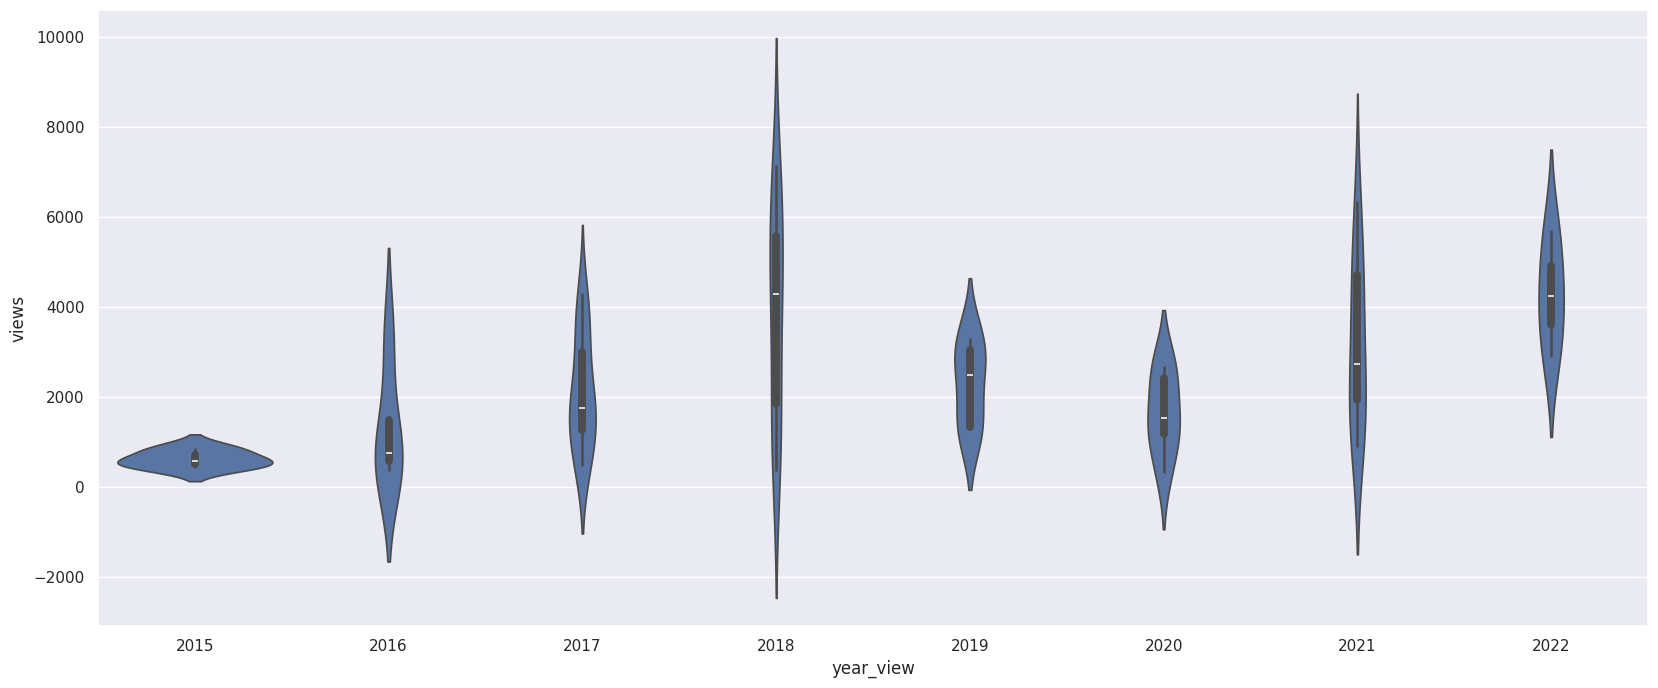

In [ ]:
sns.violinplot(data = Will_Steffen_df, x = "year_view", y = "views")

##### Plot of page_views of a given article in one sample year

<Axes: title={'center': 'Sample year of 2021'}, xlabel='month_view', ylabel='views'>

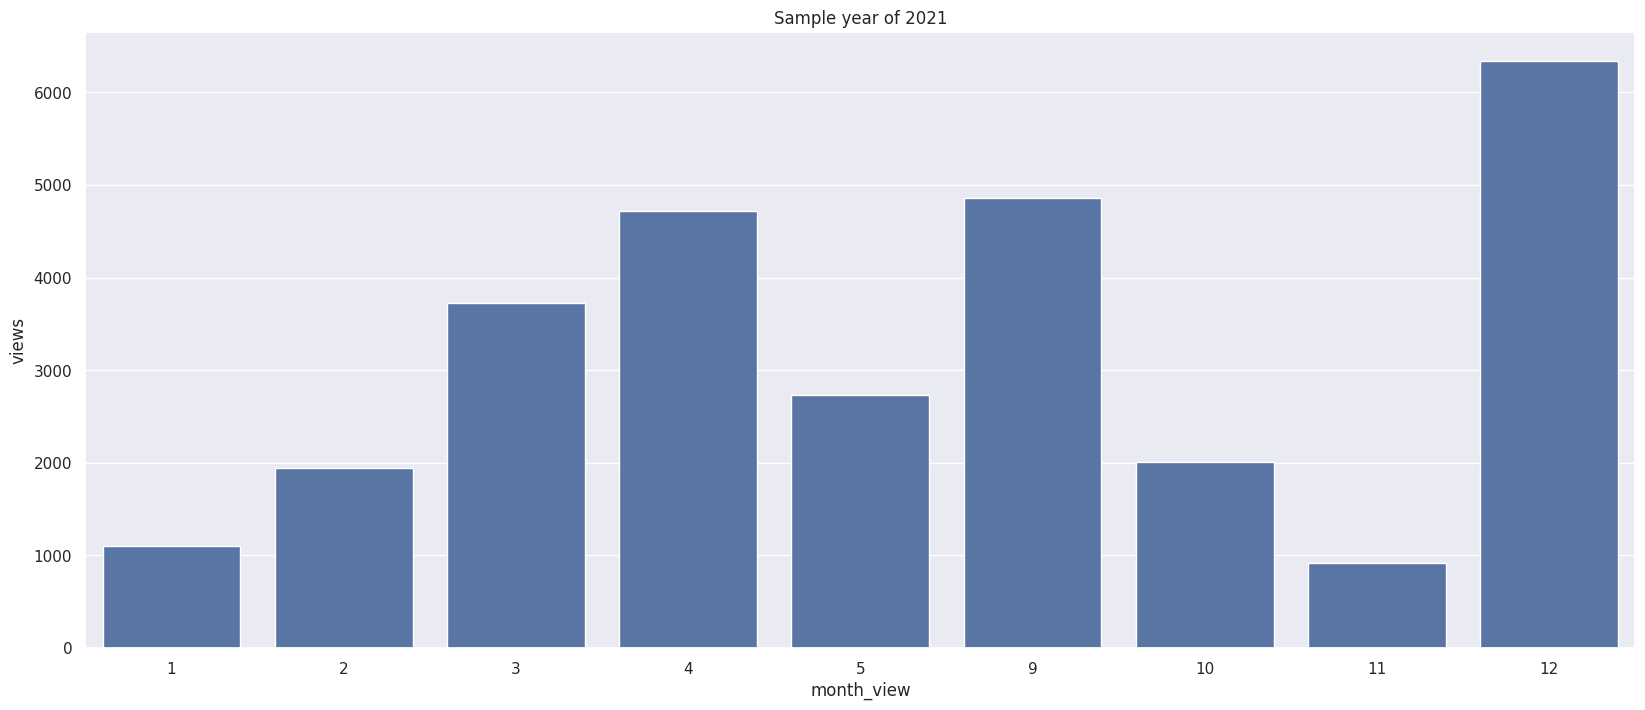

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Sample year of 2021")
sns.barplot(data = Will_Steffen_df.loc[Will_Steffen_df.year_view == 2021], x = "month_view", y = "views")

##### Plots of article views on a sample month for a given article

<Axes: title={'center': 'Sample Period of February, 2024'}, xlabel='day_view', ylabel='views'>

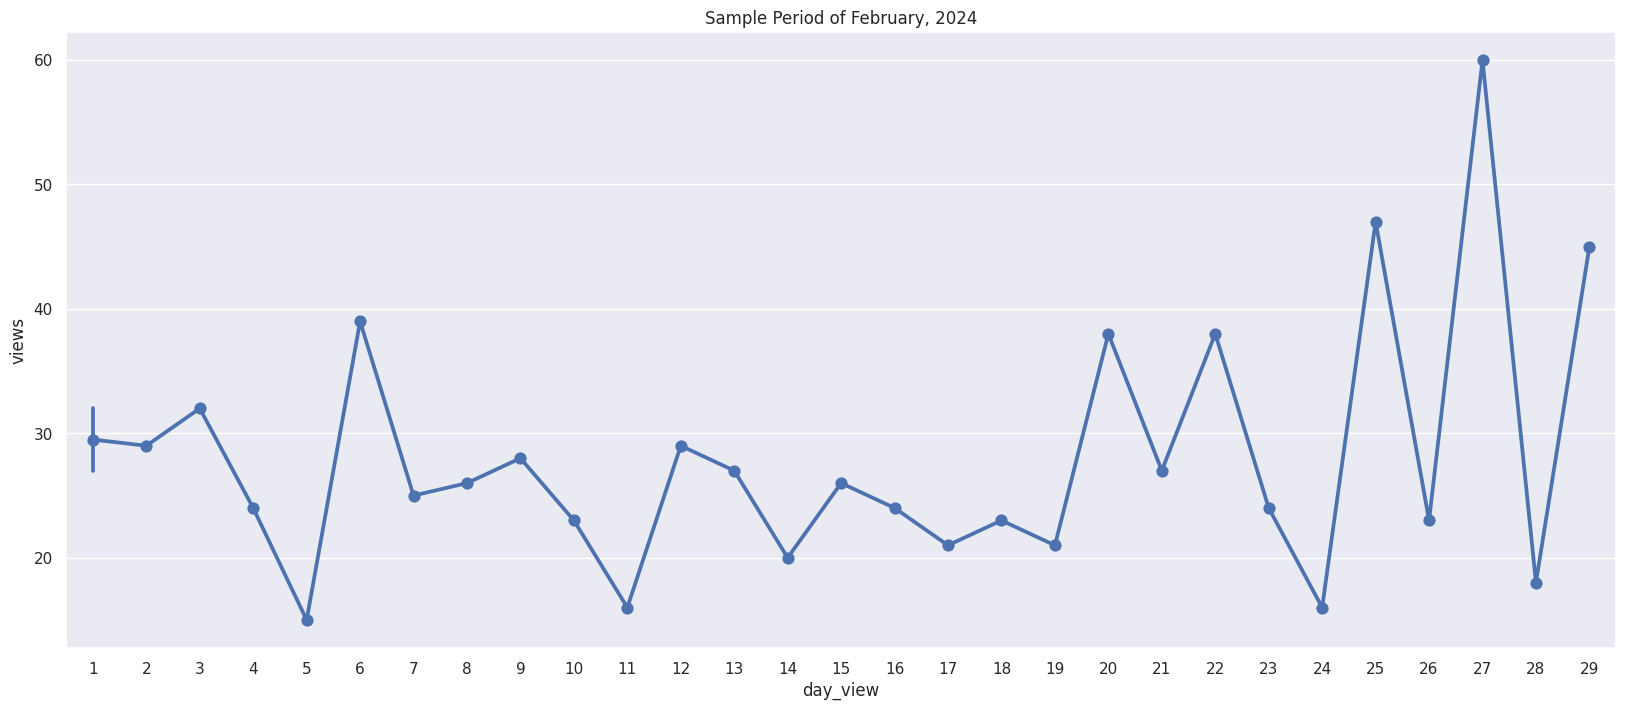

In [ ]:
# our sample taken was February, 2024
fig, ax = plt.subplots()
ax.set_title("Sample Period of February, 2024")
sns.pointplot(data = Will_Steffen_Sample_df, x = "day_view", y = "views")

##### Observations
1. Views for the Will_Steffen article fluctuate within the years and within the months. There is no clear trend that informs why the article is viewed a certain number of times.
2. Generally, the article seems to garner a greater median value of views as the years progress.
3. The upper tail of views also increases as the years progress suggesting that more people are viewing the article.

## 2. Visualizing features values and qualities scores over time

Here we want to explore the evolution of individual articles and the sample of Climate change articles  by visualizing feature values and quality scores over time. For this type of data, plots like the following would make sense, showing the predicted quality scores of the latest revision up to a given year of each English Wikipedia article (the darkness of the color corresponds to the time dimension, the darker the more recent).

![image1](./enwiki_boxplot.png)

Choose a more fine-grained time granularity than yearly (e.g., monthly, weekly, daily, hourly) and create data visualizations of the features value and scores (page_length, num_refs, num_wikilinks, num_categories, num_media, num_headings, pred_qual). Write your thoughts on the trade-offs between longer vs. shorter granularities and how this affects the visualization.

## A). Explore individual articles and quality scores over different granularities

In [ ]:
# create function that filters by page_title
# the article chosen for analysis is John_Holdren
def find_article(x):
  return df_revisions.sort_values(by = "revision_timestamp").loc[df_revisions.page_title == x].loc[:, ["page_length", "num_refs", "num_wikilinks", "num_categories", "num_media", "num_headings", "revision_year", "pred_qual", "revision_months"]]
df_holdren = find_article("John_Holdren")
df_holdren

page_length  num_refs  num_wikilinks  num_categories  num_media  \
496912          945         0              0               0          1   
496766          962         0              0               0          1   
497043          994         0              0               0          0   
496634         1027         0              0               0          0   
496835          910         0              0               1          0   
...             ...       ...            ...             ...        ...   
497160        23220        49             96              22          2   
496696        23141        49             93              22          2   
497110        23143        49             93              22          2   
497042        23136        49             93              22          2   
496724        23136        49             93              22          2   

        num_headings  revision_year  pred_qual  revision_months  
496912             0           2007   0.111301                4  
496766             0           2007   0.111957                4  
497043             0           2007   0.075177                4  
496634             0           2007   0.076415                6  
496835             0           2007   0.076931                6  
...              ...            ...        ...              ...  
497160             7           2022   0.803251                2  
496696             7           2022   0.801818                2  
497110             7           2022   0.801829                2  
497042             7           2022   0.801791                3  
496724             7           2022   0.801791                6  

[626 rows x 9 columns]

In [ ]:
# normalizes data to a scale of 0 to 1 for better visualization
df = df_holdren.drop(['revision_year', "revision_months"], axis=1)
df_norm = (df-df.min())/(df.max()-df.min())
df_norm = pd.concat((df_norm, df_holdren.revision_year), 1)
df_norm

<ipython-input-34-06dc7d13d31b>:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_norm = pd.concat((df_norm, df_holdren.revision_year), 1)


page_length  num_refs  num_wikilinks  num_categories  num_media  \
496912     0.039498       0.0        0.00000        0.000000   0.333333   
496766     0.040231       0.0        0.00000        0.000000   0.333333   
497043     0.041611       0.0        0.00000        0.000000   0.000000   
496634     0.043034       0.0        0.00000        0.000000   0.000000   
496835     0.037989       0.0        0.00000        0.045455   0.000000   
...             ...       ...            ...             ...        ...   
497160     1.000000       1.0        1.00000        1.000000   0.666667   
496696     0.996594       1.0        0.96875        1.000000   0.666667   
497110     0.996680       1.0        0.96875        1.000000   0.666667   
497042     0.996378       1.0        0.96875        1.000000   0.666667   
496724     0.996378       1.0        0.96875        1.000000   0.666667   

        num_headings  pred_qual  revision_year  
496912      0.000000   0.047445           2007  
496766      0.000000   0.048307           2007  
497043      0.000000   0.000000           2007  
496634      0.000000   0.001626           2007  
496835      0.000000   0.002303           2007  
...              ...        ...            ...  
497160      0.777778   0.956257           2022  
496696      0.777778   0.954374           2022  
497110      0.777778   0.954388           2022  
497042      0.777778   0.954338           2022  
496724      0.777778   0.954338           2022  

[626 rows x 8 columns]

In [ ]:
# sets revison year as the index and finds mean of values
df_norm_year = df_norm.groupby("revision_year").mean()
df_norm_year

page_length  num_refs  num_wikilinks  num_categories  \
revision_year                                                         
2007              0.038910  0.000000       0.039828        0.061497   
2008              0.161160  0.017574       0.165799        0.329545   
2009              0.521212  0.386712       0.437690        0.439449   
2010              0.668949  0.598761       0.755208        0.699675   
2011              0.736923  0.702041       0.777604        0.785227   
2012              0.770040  0.755102       0.802083        0.863636   
2013              0.773470  0.755102       0.754006        0.923077   
2014              0.810627  0.920000       0.769583        0.954545   
2015              0.830462  0.938776       0.760417        0.954545   
2016              0.838708  0.937445       0.762455        0.954545   
2017              0.797304  0.857143       0.805060        0.954545   
2018              0.854341  0.860332       0.878255        0.954545   
2019              0.893299  0.892128       0.956101        0.954545   
2020              0.946326  0.929172       0.968137        0.978610   
2021              0.956002  0.950437       0.948661        1.000000   
2022              0.989436  0.992579       0.973485        1.000000   

               num_media  num_headings  pred_qual  
revision_year                                      
2007            0.039216      0.071895   0.104223  
2008            0.111111      0.191358   0.291907  
2009            0.329684      0.776156   0.658031  
2010            0.327381      0.769841   0.786506  
2011            0.333333      0.777778   0.826215  
2012            0.333333      0.777778   0.844333  
2013            0.333333      0.683761   0.832964  
2014            0.426667      0.666667   0.865901  
2015            0.666667      0.666667   0.906518  
2016            0.666667      0.782609   0.918601  
2017            0.666667      0.777778   0.913330  
2018            0.604167      0.777778   0.917084  
2019            0.666667      0.777778   0.936735  
2020            0.784314      0.777778   0.963657  
2021            0.666667      0.777778   0.946789  
2022            0.666667      0.777778   0.953390

                      ###### Plot 1 - Plot of mean feature values and mean quality scores over a yearly granularity

<Axes: xlabel='revision_year'>

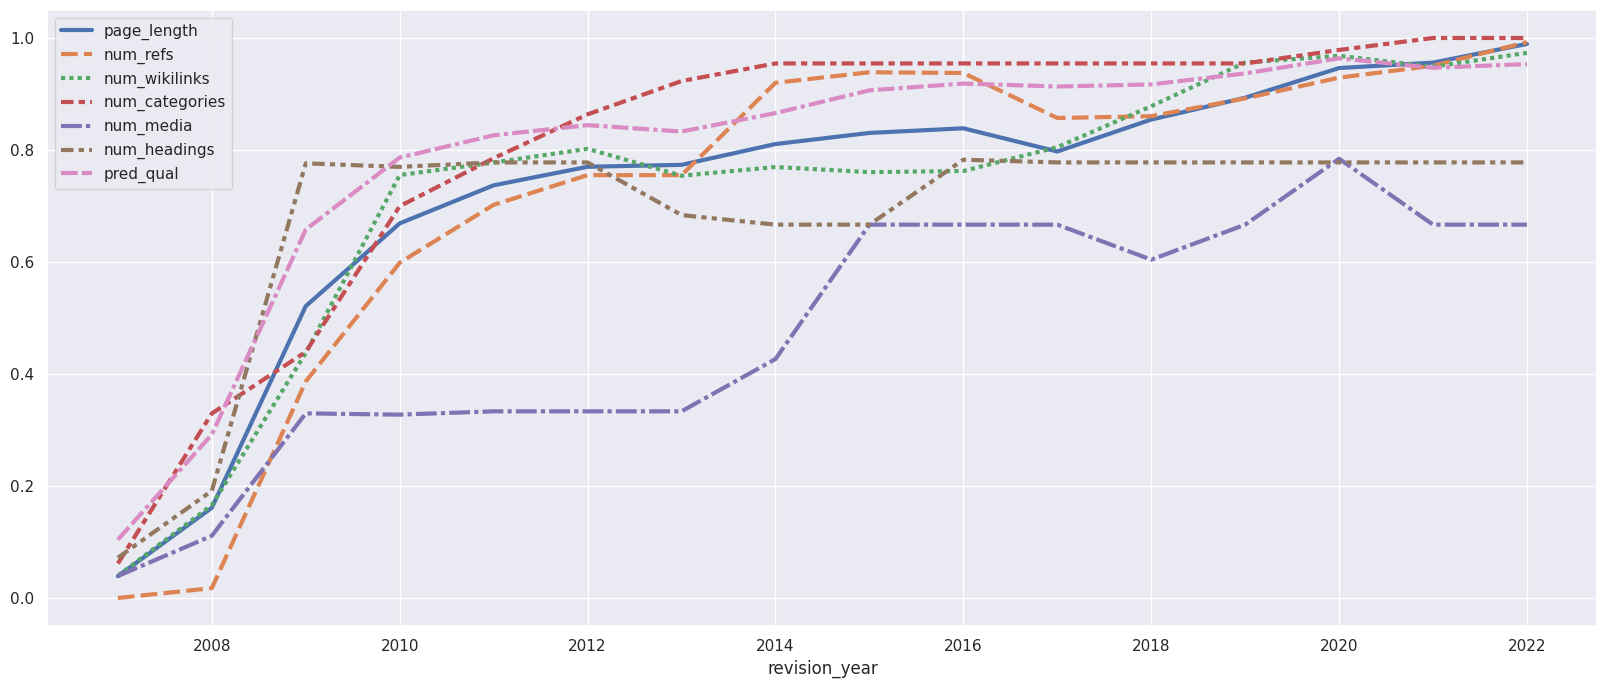

In [ ]:
# lineplot showing feature scores and quality scores for an article over a yearly granularity
sns.lineplot(data = df_norm_year, lw = 3)

In [ ]:
# adds the months column so that another plot of monthly granularity can be drawn
df_norm = pd.concat((df_norm, df_holdren.revision_months), 1)
df_norm

<ipython-input-37-86edf85ea012>:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_norm = pd.concat((df_norm, df_holdren.revision_months), 1)


page_length  num_refs  num_wikilinks  num_categories  num_media  \
496912     0.039498       0.0        0.00000        0.000000   0.333333   
496766     0.040231       0.0        0.00000        0.000000   0.333333   
497043     0.041611       0.0        0.00000        0.000000   0.000000   
496634     0.043034       0.0        0.00000        0.000000   0.000000   
496835     0.037989       0.0        0.00000        0.045455   0.000000   
...             ...       ...            ...             ...        ...   
497160     1.000000       1.0        1.00000        1.000000   0.666667   
496696     0.996594       1.0        0.96875        1.000000   0.666667   
497110     0.996680       1.0        0.96875        1.000000   0.666667   
497042     0.996378       1.0        0.96875        1.000000   0.666667   
496724     0.996378       1.0        0.96875        1.000000   0.666667   

        num_headings  pred_qual  revision_year  revision_months  
496912      0.000000   0.047445           2007                4  
496766      0.000000   0.048307           2007                4  
497043      0.000000   0.000000           2007                4  
496634      0.000000   0.001626           2007                6  
496835      0.000000   0.002303           2007                6  
...              ...        ...            ...              ...  
497160      0.777778   0.956257           2022                2  
496696      0.777778   0.954374           2022                2  
497110      0.777778   0.954388           2022                2  
497042      0.777778   0.954338           2022                3  
496724      0.777778   0.954338           2022                6  

[626 rows x 9 columns]

In [ ]:
# pick a sample year to investigate the trend of feature values and quality scores over a monthly granularity
# our sample is 2017
df_norm_months = df_norm.loc[df_norm.revision_year == 2017]
df_norm_months

page_length  num_refs  num_wikilinks  num_categories  num_media  \
497205     0.792764  0.857143       0.812500        0.954545   0.666667   
497077     0.793454  0.857143       0.812500        0.954545   0.666667   
496877     0.789703  0.857143       0.802083        0.954545   0.666667   
496915     0.798672  0.857143       0.802083        0.954545   0.666667   
497164     0.798715  0.857143       0.802083        0.954545   0.666667   
496960     0.800138  0.857143       0.802083        0.954545   0.666667   
497010     0.807684  0.857143       0.802083        0.954545   0.666667   

        num_headings  pred_qual  revision_year  revision_months  
497205      0.777778   0.912953           2017                1  
497077      0.777778   0.913069           2017                1  
496877      0.777778   0.911890           2017                3  
496915      0.777778   0.913405           2017                4  
497164      0.777778   0.913413           2017                9  
496960      0.777778   0.913653           2017                9  
497010      0.777778   0.914929           2017               11

In [ ]:
# sets month as index and finds mean of values
df_norm_months = df_norm_months.groupby("revision_months").mean().drop("revision_year", axis = 1)
df_norm_months

page_length  num_refs  num_wikilinks  num_categories  \
revision_months                                                         
1                   0.793109  0.857143       0.812500        0.954545   
3                   0.789703  0.857143       0.802083        0.954545   
4                   0.798672  0.857143       0.802083        0.954545   
9                   0.799427  0.857143       0.802083        0.954545   
11                  0.807684  0.857143       0.802083        0.954545   

                 num_media  num_headings  pred_qual  
revision_months                                      
1                 0.666667      0.777778   0.913011  
3                 0.666667      0.777778   0.911890  
4                 0.666667      0.777778   0.913405  
9                 0.666667      0.777778   0.913533  
11                0.666667      0.777778   0.914929

                      ###### Plot of mean feature values and mean quality scores over a monthly granularity

<Axes: title={'center': 'Plot of feature values and quality scores over a monthly granularity for the year 2017'}, xlabel='revision_months'>

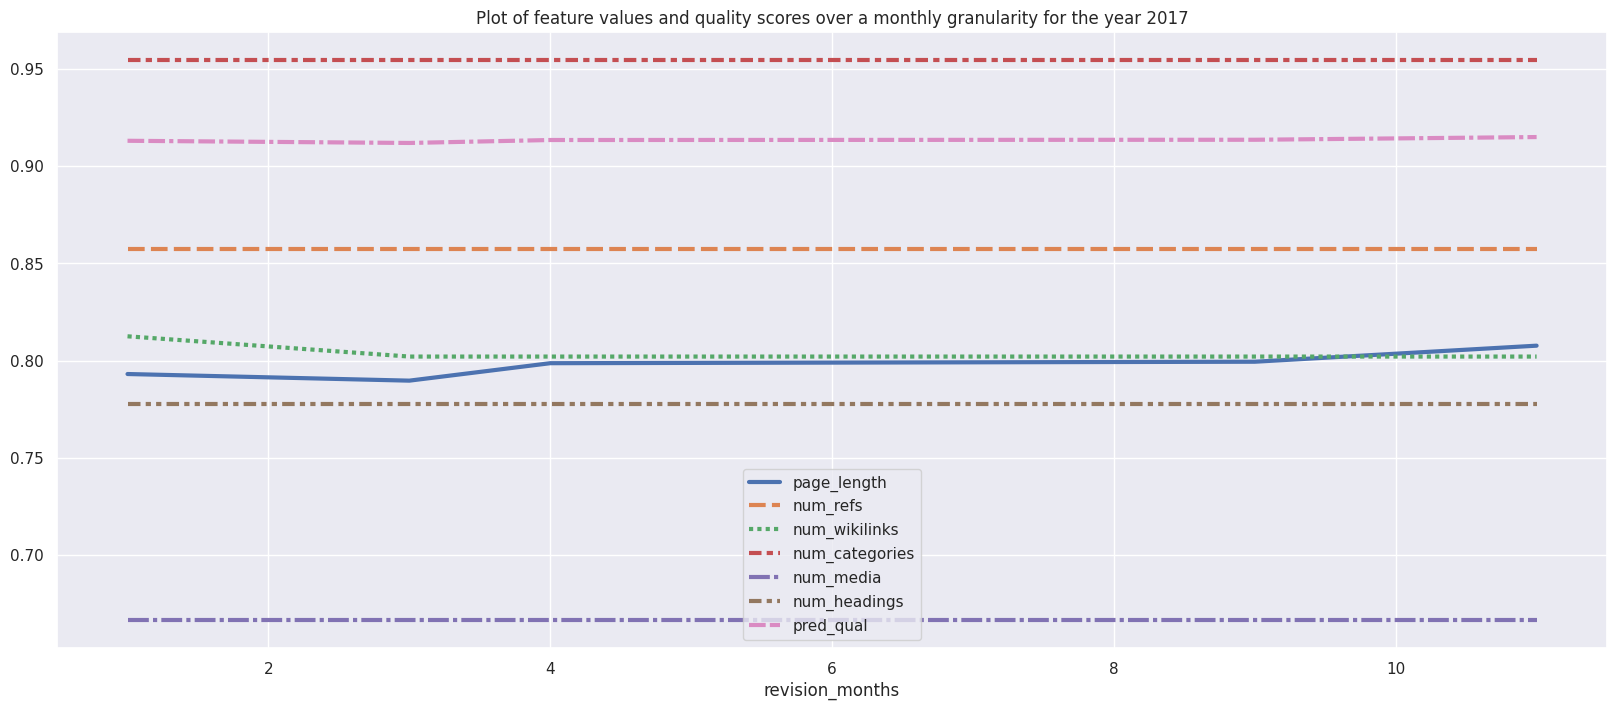

In [ ]:
# plot of feature values and quality scores over a monthly granularity for the sample year 2017
fig, ax = plt.subplots()
ax.set_title("Plot of feature values and quality scores over a monthly granularity for the year 2017")
sns.lineplot(data = df_norm_months, lw = 3)

### Tradeoffs between longer and shorter granularities
- The line graphs with shorter granularities (months) show minimal changes in features scores and quality scores over time. This trend shows that these values (feature scores and quality scores) change dramatically over a longer granularity such as years.
- The line graphs with longer granularities (years) show a clear increasing or rising trend in the values of feature scores and quality scores over time. The trend shows that these values (feature scores and quality scores) increase in value over a longer period of time.
### Filtering and aggregation choices made
-The first graphs show how quantitative feature scores and quality values are distributed for a sample article over the entire duration of the revision period.
- Since the variables are quantitative, a line graph was suitable.
- The data was first filtered based on feature scores and quality values over the entire period of the revision. The mean was aggregated for all variables in a given year using the groupby function.
- A sample from the year 2017 was then collected and aggregated based on the mean of all variables for the individual months.
### Alternative options
- Instead of the mean, other aggregations such as max and min can yield more insight.

## B). Explore the predicted quality score of articles on the latest revision for different durations including year, month and day

In [ ]:
# set default styling for seaborn
width = 20
height = 8
sns.set(rc = {'figure.figsize':(width, height)})

In [ ]:
# this variable holds a pivot table that calculates the last revision_timestamp per year of every article and its
# pred_qual
# we first sort the df to get the revision_timestamps from earliest to latest
df_revisions_year_pivot = df_revisions.sort_values(by = "revision_timestamp").pivot_table(index = "page_title", columns = "revision_year", values = "pred_qual", aggfunc ="last")
df_revisions_year_pivot

revision_year                                       2001     2002      2003  \
page_title                                                                    
100%_renewable_energy                                NaN      NaN       NaN   
100,000-year_problem                                 NaN      NaN       NaN   
100-year_flood                                       NaN  0.19245  0.192339   
12_Characters_in_Search_of_an_Apocalypse:_On_th...   NaN      NaN       NaN   
1452/1453_mystery_eruption                           NaN      NaN       NaN   
...                                                  ...      ...       ...   
Équiterre                                            NaN      NaN       NaN   
Öko-Institut                                         NaN      NaN       NaN   
İÇDAŞ                                                NaN      NaN       NaN   
Δ13C                                                 NaN      NaN       NaN   
Δ18O                                                 NaN      NaN       NaN   

revision_year                                           2004      2005  \
page_title                                                               
100%_renewable_energy                                    NaN       NaN   
100,000-year_problem                                     NaN       NaN   
100-year_flood                                      0.201631  0.197751   
12_Characters_in_Search_of_an_Apocalypse:_On_th...       NaN       NaN   
1452/1453_mystery_eruption                               NaN       NaN   
...                                                      ...       ...   
Équiterre                                                NaN       NaN   
Öko-Institut                                             NaN       NaN   
İÇDAŞ                                                    NaN       NaN   
Δ13C                                                     NaN       NaN   
Δ18O                                                     NaN       NaN   

revision_year                                           2006      2007  \
page_title                                                               
100%_renewable_energy                                    NaN       NaN   
100,000-year_problem                                     NaN  0.623771   
100-year_flood                                      0.223344  0.238287   
12_Characters_in_Search_of_an_Apocalypse:_On_th...       NaN       NaN   
1452/1453_mystery_eruption                               NaN       NaN   
...                                                      ...       ...   
Équiterre                                           0.324421  0.328269   
Öko-Institut                                             NaN       NaN   
İÇDAŞ                                                    NaN       NaN   
Δ13C                                                     NaN       NaN   
Δ18O                                                0.327805  0.331678   

revision_year                                           2008      2009  \
page_title                                                               
100%_renewable_energy                               0.128060       NaN   
100,000-year_problem                                0.608129  0.610084   
100-year_flood                                      0.236576  0.459095   
12_Characters_in_Search_of_an_Apocalypse:_On_th...       NaN       NaN   
1452/1453_mystery_eruption                               NaN       NaN   
...                                                      ...       ...   
Équiterre                                           0.328384  0.333988   
Öko-Institut                                             NaN  0.331185   
İÇDAŞ                                                    NaN       NaN   
Δ13C                                                0.302129  0.424962   
Δ18O                                                0.410014  0.467348   

revision_year                                           2010  ...      2013  \
page

                ####### PLOT 1 - Year and Predicted Quality of Final Revisions

Text(0, 0.5, 'Pred_qual')

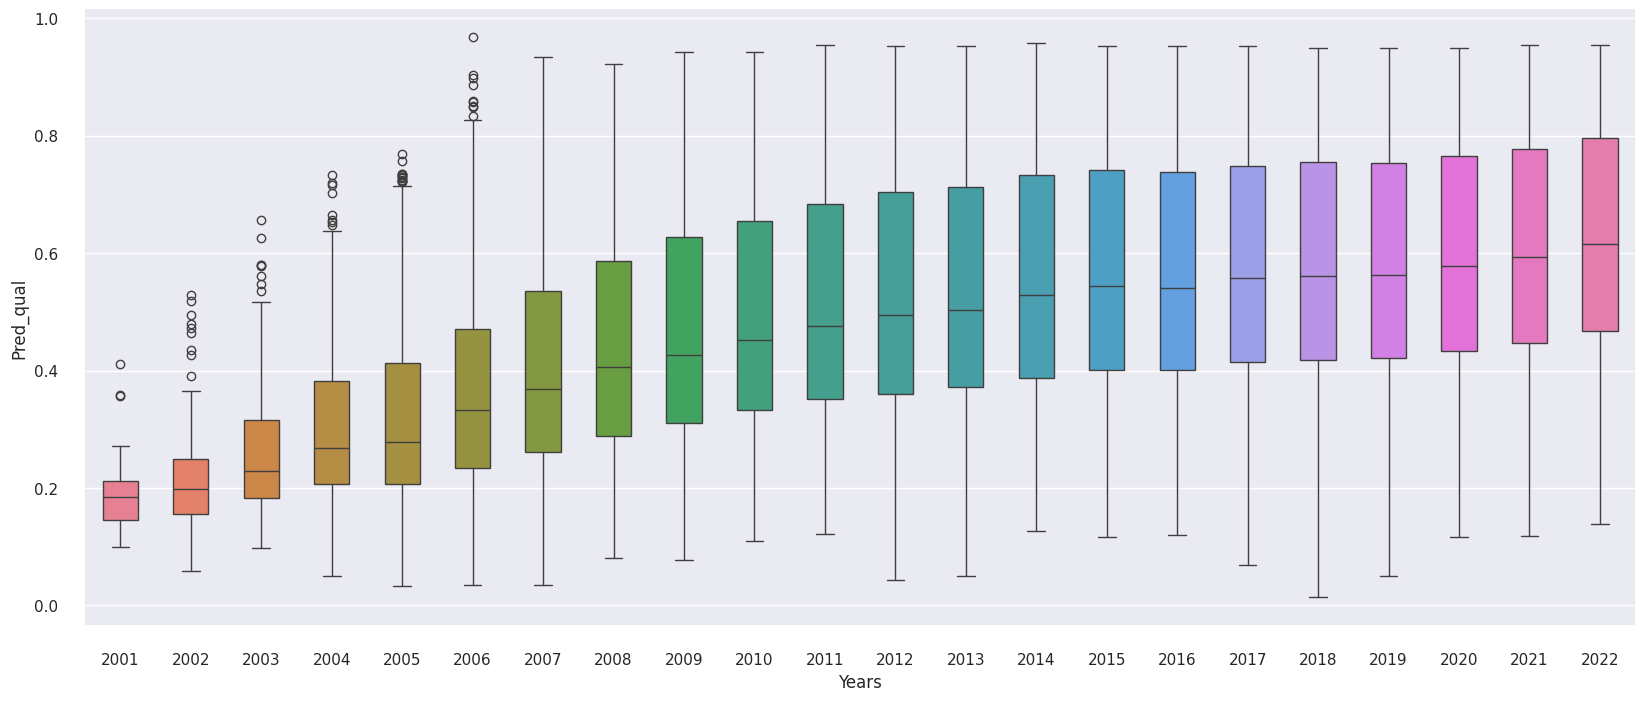

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(data = df_revisions_year_pivot, width = 0.5 )
sns.despine(offset=10, trim=True)
ax.set_xlabel("Years")
ax.set_ylabel("Pred_qual")

In [ ]:
# this variable holds a pivot table that calculates the last revision_timestamp per month of every article and its
# pred_qual
# we first sort the df to get the revision_timestamps from earliest to latest
df_revisions_month_pivot = df_revisions.sort_values(by = "revision_timestamp").pivot_table(index = "page_title", columns = ["revision_year", "revision_months"], values = "pred_qual", aggfunc ="last")
df_revisions_month_pivot

revision_year                                      2001                      \
revision_months                                      3   4   5   7   8   9    
page_title                                                                    
100%_renewable_energy                               NaN NaN NaN NaN NaN NaN   
100,000-year_problem                                NaN NaN NaN NaN NaN NaN   
100-year_flood                                      NaN NaN NaN NaN NaN NaN   
12_Characters_in_Search_of_an_Apocalypse:_On_th...  NaN NaN NaN NaN NaN NaN   
1452/1453_mystery_eruption                          NaN NaN NaN NaN NaN NaN   
...                                                 ...  ..  ..  ..  ..  ..   
Équiterre                                           NaN NaN NaN NaN NaN NaN   
Öko-Institut                                        NaN NaN NaN NaN NaN NaN   
İÇDAŞ                                               NaN NaN NaN NaN NaN NaN   
Δ13C                                                NaN NaN NaN NaN NaN NaN   
Δ18O                                                NaN NaN NaN NaN NaN NaN   

revision_year                                                  2002  ...  \
revision_months                                     10  11  12   1   ...   
page_title                                                           ...   
100%_renewable_energy                              NaN NaN NaN  NaN  ...   
100,000-year_problem                               NaN NaN NaN  NaN  ...   
100-year_flood                                     NaN NaN NaN  NaN  ...   
12_Characters_in_Search_of_an_Apocalypse:_On_th... NaN NaN NaN  NaN  ...   
1452/1453_mystery_eruption                         NaN NaN NaN  NaN  ...   
...                                                 ..  ..  ..  ...  ...   
Équiterre                                          NaN NaN NaN  NaN  ...   
Öko-Institut                                       NaN NaN NaN  NaN  ...   
İÇDAŞ                                              NaN NaN NaN  NaN  ...   
Δ13C                                               NaN NaN NaN  NaN  ...   
Δ18O                                               NaN NaN NaN  NaN  ...   

revision_year                                           2022            \
revision_months                                           3         4    
page_title                                                               
100%_renewable_energy                               0.807652  0.808120   
100,000-year_problem                                0.701223  0.715109   
100-year_flood                                           NaN       NaN   
12_Characters_in_Search_of_an_Apocalypse:_On_th...       NaN       NaN   
1452/1453_mystery_eruption                          0.395337  0.395599   
...                                                      ...       ...   
Équiterre                                                NaN       NaN   
Öko-Institut                                        0.275860       NaN   
İÇDAŞ                                                    NaN       NaN   
Δ13C                                                0.519949  0.544078   
Δ18O                                                     NaN       NaN   

revision_year                                                           \
revision_months                                           5         6    
page_title                                                               
100%_renewable_energy                               0.808246  0.807676   
100,000-year_problem                                0.713766  0.713789   
100-year_flood                                      0.691705       NaN   
12_Characters_in_Search_of_an_Apocalypse:_On_th...       NaN       NaN   
1452/1453_mystery_eruption                               NaN  0.491164   
...                                                      ...       ...   
Équiterre                                                NaN       NaN   
Öko-Institut                                       

                ####### PLOT 2 - Months in a given year and Predicted Quality of Final Revisions

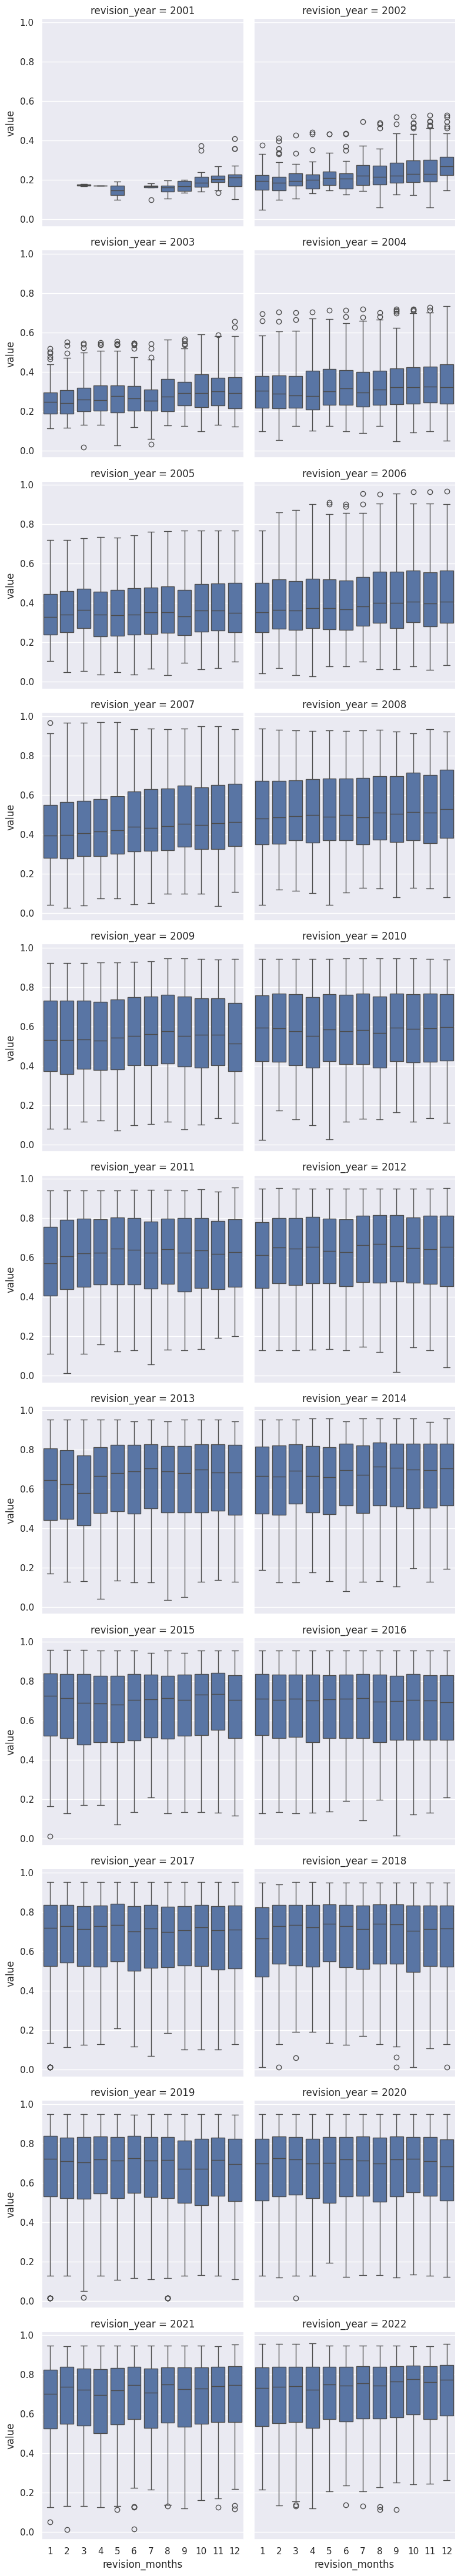

In [ ]:
order = []
data = pd.melt(df_revisions_month_pivot) #melt the pivoted data to get the data in a format suitable for using
# a FacetGrid
for i in range(1, 13):
    # create the order in which the months will be displayed
    order.append(i) # the order simply lists the order of months from 1 to 12
# draw the facet grid of all latest revisions per month of each article in a given year
g = sns.FacetGrid(data = data, col = "revision_year", height = 4, aspect = 1, col_wrap = 2)
g.map(sns.boxplot, "revision_months", "value", order = order)

                ####### PLOT 3 - Days and Predicted Quality of Final Revisions

In [ ]:
# adds the day column to df_revisions
days_series = df_revisions.revision_timestamp.transform(lambda x: x.day) # a series holding the days in which revisions were made
df_revisions["revision_days"] = days_series

In [ ]:
# let's pick a sample year and month for this exploration - January, 2022 and January, 2021
df_revisions_days_pivot = df_revisions.loc[df_revisions.revision_months == 1].loc[df_revisions.revision_year >= 2021]
df_revisions_days_pivot

wiki_db   page_id revision_id        revision_timestamp  page_length  \
56       enwiki    348869   997847722 2021-01-02 14:50:30+00:00        25671   
131      enwiki    348869  1001438622 2021-01-19 17:53:19+00:00        25686   
169      enwiki    348869  1000037520 2021-01-13 06:07:33+00:00        25673   
494      enwiki   5042951   998280358 2021-01-04 17:17:45+00:00       271967   
891      enwiki   5042951   997713032 2021-01-01 21:44:09+00:00       271697   
...         ...       ...         ...                       ...          ...   
1456050  enwiki  66790245  1066358118 2022-01-18 00:43:47+00:00        35624   
1456128  enwiki  66790245  1064688962 2022-01-09 18:32:13+00:00        35623   
1456155  enwiki  66790245  1064077581 2022-01-06 13:03:12+00:00        35624   
1456178  enwiki  66790245  1066372320 2022-01-18 02:24:41+00:00        35800   
1456188  enwiki  66790245  1066372356 2022-01-18 02:25:03+00:00        35624   

         num_refs  num_wikilinks  num_categories  num_media  num_headings  \
56             36             87               3          2            10   
131            36             87               3          2            10   
169            36             87               3          2            10   
494           305            430               5         33            28   
891           305            430               5         33            26   
...           ...            ...             ...        ...           ...   
1456050        81            116               4          2            14   
1456128        81            116               4          2            14   
1456155        81            116               4          2            14   
1456178        81            116               4          2            14   
1456188        81            116               4          2            14   

            item_id  pred_qual                  page_title quality_class  \
56         Q1137345   0.735638  North_Atlantic_oscillation         Start   
131        Q1137345   0.735673  North_Atlantic_oscillation         Start   
169        Q1137345   0.735643  North_Atlantic_oscillation         Start   
494           Q7942   0.811814              Climate_change            FA   
891           Q7942   0.807766              Climate_change            FA   
...             ...        ...                         ...           ...   
1456050  Q105549782   0.807866      Build_Back_Better_Plan             C   
1456128  Q105549782   0.807868      Build_Back_Better_Plan             C   
1456155  Q105549782   0.807866      Build_Back_Better_Plan             C   
1456178  Q105549782   0.807532      Build_Back_Better_Plan             C   
1456188  Q105549782   0.807866      Build_Back_Better_Plan             C   

        importance_class year_month_day_revision  revision_year  \
56               Unknown              2021010214           2021   
131              Unknown              2021011917           2021   
169              Unknown              2021011306           2021   
494                  Top              2021010417           2021   
891                  Top              2021010121           2021   
...                  ...                     ...            ...   
1456050              Mid              2022011800           2022   
1456128              Mid              2022010918           2022   
1456155              Mid              2022010613           2022   
1456178              Mid              2022011802           2022   
1456188              Mid              2022011802           2022   

         revision_months  revision_days  
56                     1              2  
131                    1             19  
169                    1             13  
494                    1              4  
891                    1              1  
...                  ...            ...  
1456050                1             18  
1456128                1              9  
1456155                1  

In [ ]:
# pivots the dataframe and sets days as a column
df_revisions_days_pivot = df_revisions_days_pivot.sort_values(by = "revision_timestamp").pivot_table(index = "page_title", columns = ["revision_year",  "revision_days"], values = "pred_qual", aggfunc = "last")
df_revisions_days_pivot #finds the last revision of an article on each day of two months belonging to two different years

revision_year                                           2021                \
revision_days                                             1         2   3    
page_title                                                                   
100%_renewable_energy                                    NaN  0.801826 NaN   
100,000-year_problem                                     NaN       NaN NaN   
100-year_flood                                           NaN       NaN NaN   
12_Characters_in_Search_of_an_Apocalypse:_On_th...       NaN       NaN NaN   
1458_mystery_eruption                                    NaN       NaN NaN   
...                                                      ...       ...  ..   
Zero_carbon_housing                                      NaN       NaN NaN   
Çelikler_Holding                                         NaN       NaN NaN   
Équiterre                                                NaN       NaN NaN   
Δ13C                                                     NaN       NaN NaN   
Δ18O                                                0.478876       NaN NaN   

revision_year                                                               \
revision_days                                       4   5   6   7   8   9    
page_title                                                                   
100%_renewable_energy                              NaN NaN NaN NaN NaN NaN   
100,000-year_problem                               NaN NaN NaN NaN NaN NaN   
100-year_flood                                     NaN NaN NaN NaN NaN NaN   
12_Characters_in_Search_of_an_Apocalypse:_On_th... NaN NaN NaN NaN NaN NaN   
1458_mystery_eruption                              NaN NaN NaN NaN NaN NaN   
...                                                 ..  ..  ..  ..  ..  ..   
Zero_carbon_housing                                NaN NaN NaN NaN NaN NaN   
Çelikler_Holding                                   NaN NaN NaN NaN NaN NaN   
Équiterre                                          NaN NaN NaN NaN NaN NaN   
Δ13C                                               NaN NaN NaN NaN NaN NaN   
Δ18O                                               NaN NaN NaN NaN NaN NaN   

revision_year                                           ...      2022          \
revision_days                                       10  ...        22  23  24   
page_title                                              ...                     
100%_renewable_energy                              NaN  ...       NaN NaN NaN   
100,000-year_problem                               NaN  ...       NaN NaN NaN   
100-year_flood                                     NaN  ...       NaN NaN NaN   
12_Characters_in_Search_of_an_Apocalypse:_On_th... NaN  ...       NaN NaN NaN   
1458_mystery_eruption                              NaN  ...       NaN NaN NaN   
...                                                 ..  ...       ...  ..  ..   
Zero_carbon_housing                                NaN  ...       NaN NaN NaN   
Çelikler_Holding                                   NaN  ...       NaN NaN NaN   
Équiterre                                          NaN  ...  0.498337 NaN NaN   
Δ13C                                               NaN  ...       NaN NaN NaN   
Δ18O                                               NaN  ...       NaN NaN NaN   

revision_year                                                                  \
revision_days                                            25        26  27  28   
page_title                                                                      
100%_renewable_energy                               0.80877  0.808786 NaN NaN   
100,000-year_problem                                    NaN       NaN NaN NaN   
100-year_flood                                          NaN       NaN NaN NaN   
12_Characters_in_Search_of_an_Apocalypse:_On_th...      NaN       NaN NaN NaN   
1458_mystery_eruption                                   NaN       NaN NaN NaN   
...                            

In [ ]:
# melts the dataframe to get the data in a format that can be used in a graph
data_days = pd.melt(df_revisions_days_pivot) #drop null rows in the new dataframe
data_days.dropna(how = "any", inplace = True)

Text(0.5, 1.0, 'January 2021')

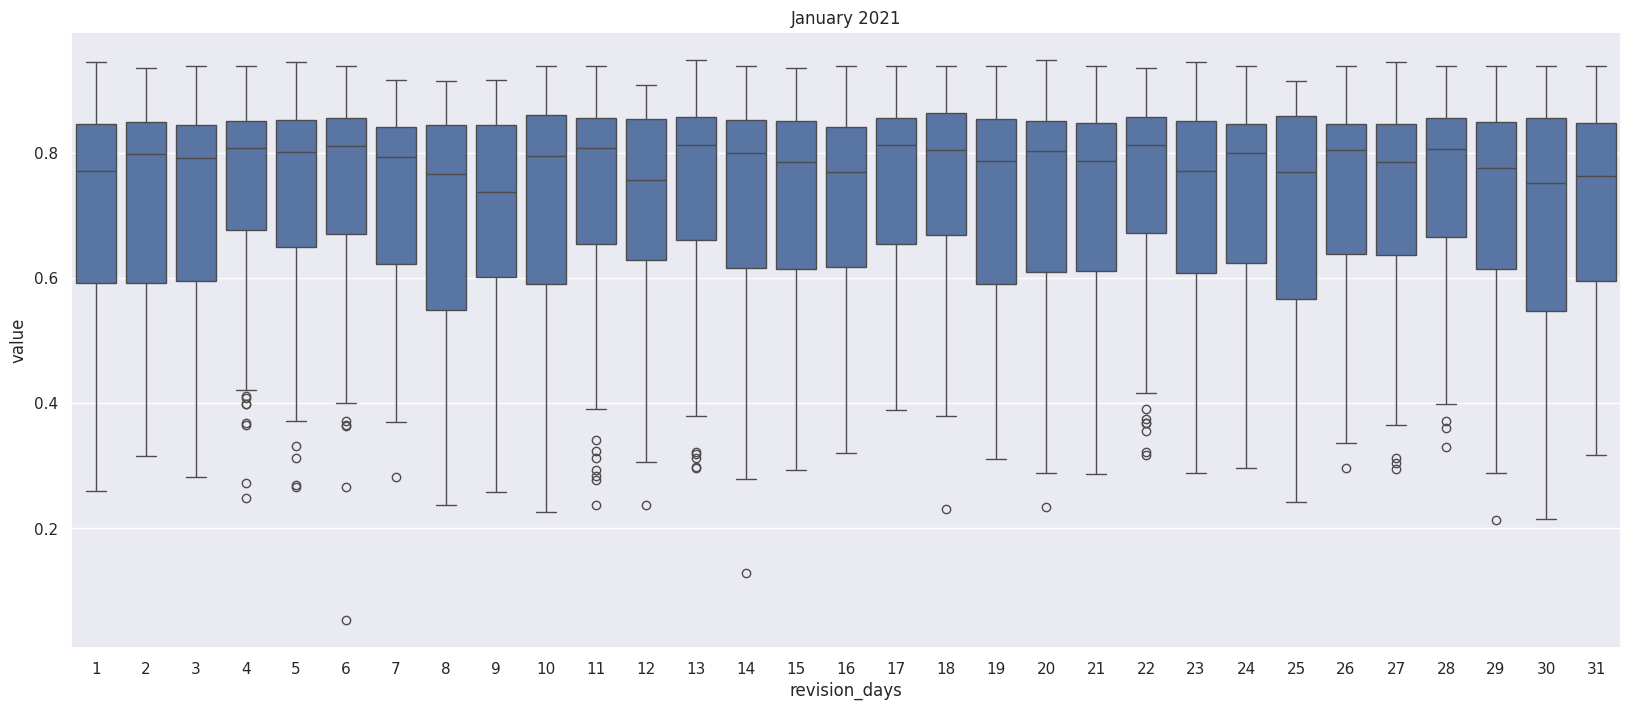

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(data = data_days[data_days.revision_year == 2021], x = "revision_days", y = "value")
ax.set_title("January 2021")

### Tradeoffs between larger and shorter granularities for pred_qual over time
1. Plots with shorter granularities (months and days) show the different distribution of median values across a given year or month. In later years that is post 2010, the median values vary slightly. This trend can be seen in all sets of plots.
2. As time progresses in all granularities (year, month, day), the pred_qual of articles increase steadily. This change is more visible when using a granularity of years and months compared to a granularity of days. In the plots showing days, there is not a sufficient amount of data to account for major differences in median values. Also, median values across a year as seen in the months granularity plots are almost the same in all instances.
3. As time progresses, more articles are stacked above the median pred_qual while upper tails (values above the median) become shorter and lower tails become longer (values above the median). This trend is observed in all sets of plots.
4. The median of box plots with a granularity of days fluctuate more dramatically and have much longer lower tails than upper tails.

### Filters and Aggregations
1. In this section, the pivot_table function was used to transform the dataframe to have columns that specify time periods such as year, months, and days. A sample year and sample month were selected for shorter granularities. The last value in each respective period was selected for each article.
2. The melt function was then used to reconstitute the pivoted dataframes into a "normal" dataframe for better and simpler visualization.
3. A box plot was used as the main visualization chart because of its accuracy in showing the distribution of articles across a range of pred_qual values. It also shows outliers and the median value.

## C. Explore the quality_score of articles for different durations and granularities including year and month

In [ ]:
# sort dataframe by year select all rows with columns - quality class, year and importance class
df_revisions_quality_importance_scores = df_revisions.sort_values(by = "revision_year").loc[:, ["revision_year", "importance_class", "quality_class", "revision_months", "revision_days"]]
df_revisions_quality_importance_scores

revision_year importance_class quality_class  revision_months  \
456730            2001              Low            GA               10   
182831            2001             High             C                7   
455149            2001              Low            GA               11   
409992            2001             High             B               12   
219906            2001             High            GA                3   
...                ...              ...           ...              ...   
1057747           2022              Low             C                8   
1057748           2022              Low             C                7   
1057749           2022              Low             C                8   
1057738           2022              Low             C                8   
1456211           2022              Mid             C                4   

         revision_days  
456730              21  
182831              31  
455149              13  
409992              16  
219906               7  
...                ...  
1057747             20  
1057748             21  
1057749             28  
1057738             15  
1456211             17  

[1456212 rows x 5 columns]

                    ##### Plot of distribution of quality scores over the entire revision period

<Axes: xlabel='quality_class', ylabel='count'>

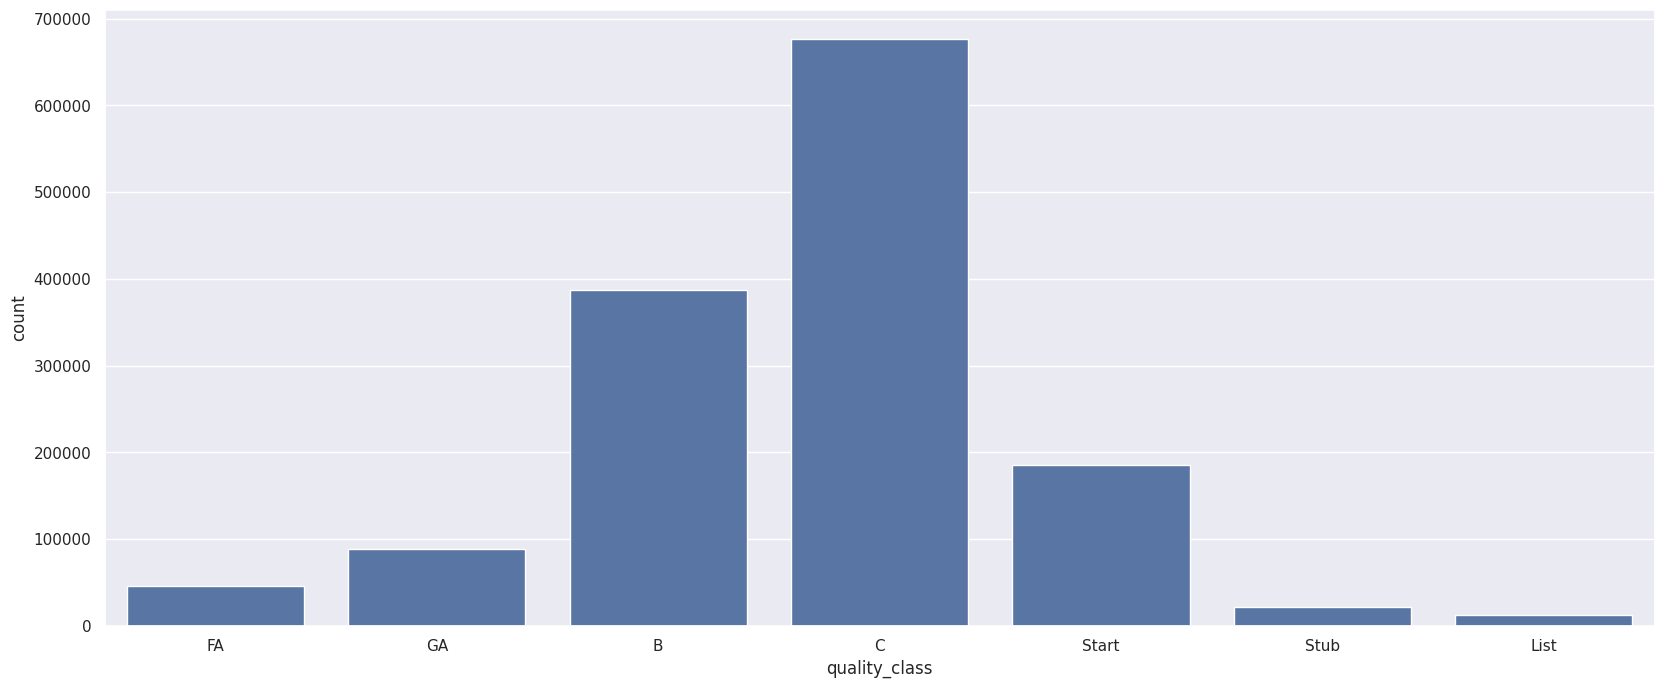

In [ ]:
bar_plot_order_quality_class = ["FA", "GA", "B", "C", "Start", "Stub", "List"]
sns.countplot(df_revisions_quality_importance_scores, x = "quality_class", order = bar_plot_order_quality_class)

                      ##### Plot of quality scores over a yearly granularity

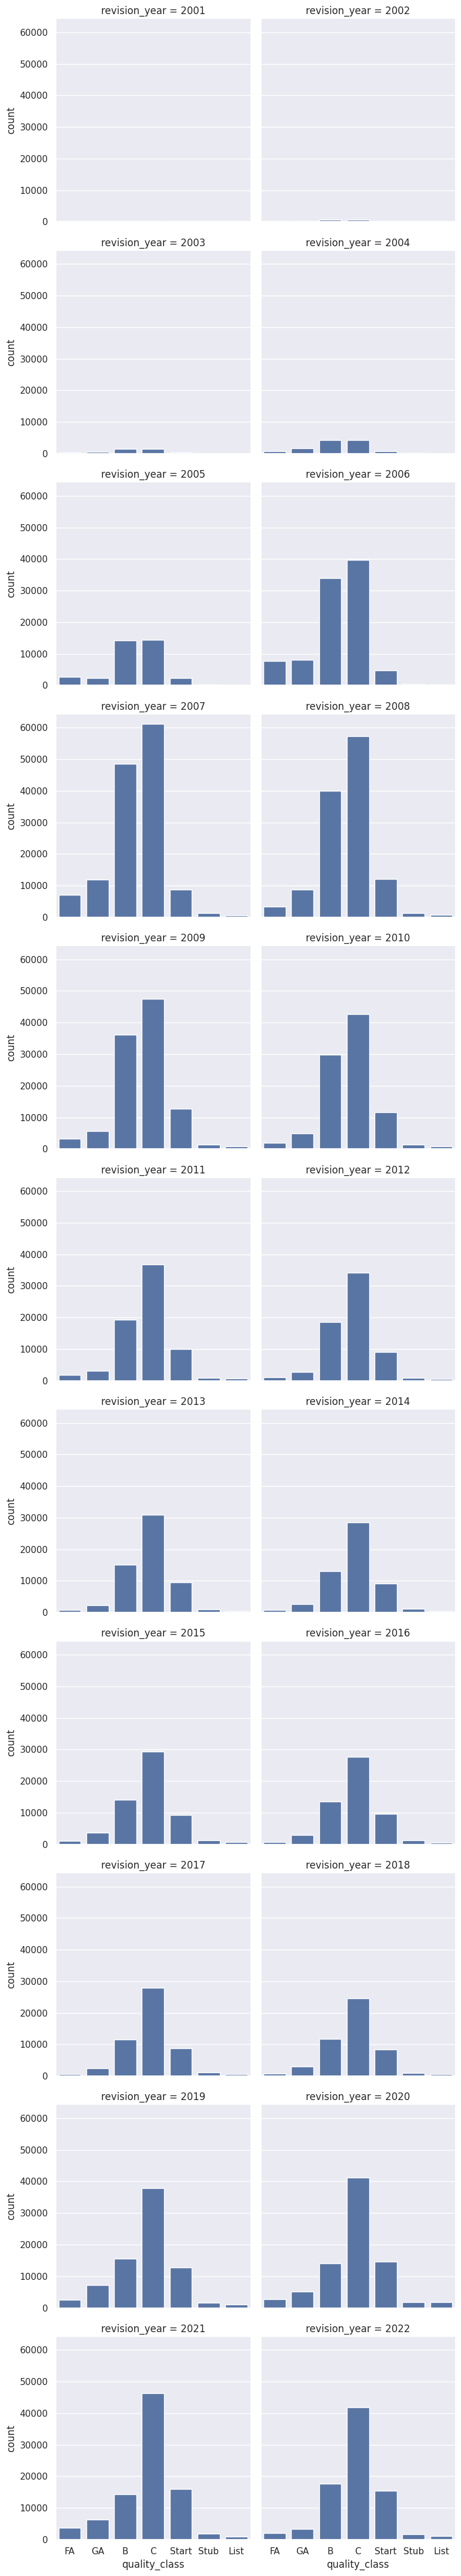

In [ ]:
bar_plot_order_quality_class = ["FA", "GA", "B", "C", "Start", "Stub", "List"]
# creates a facetgrid with the above order
# the gird is a histogram showing the frequency of each quality class per year
g = sns.FacetGrid(data = df_revisions_quality_importance_scores, col = "revision_year", height = 4, aspect = 1, col_wrap = 2,   row_order = bar_plot_order_quality_class)
g.map(sns.countplot, "quality_class", order = bar_plot_order_quality_class)

                    ##### Plot of quality class over a sample year of 2022

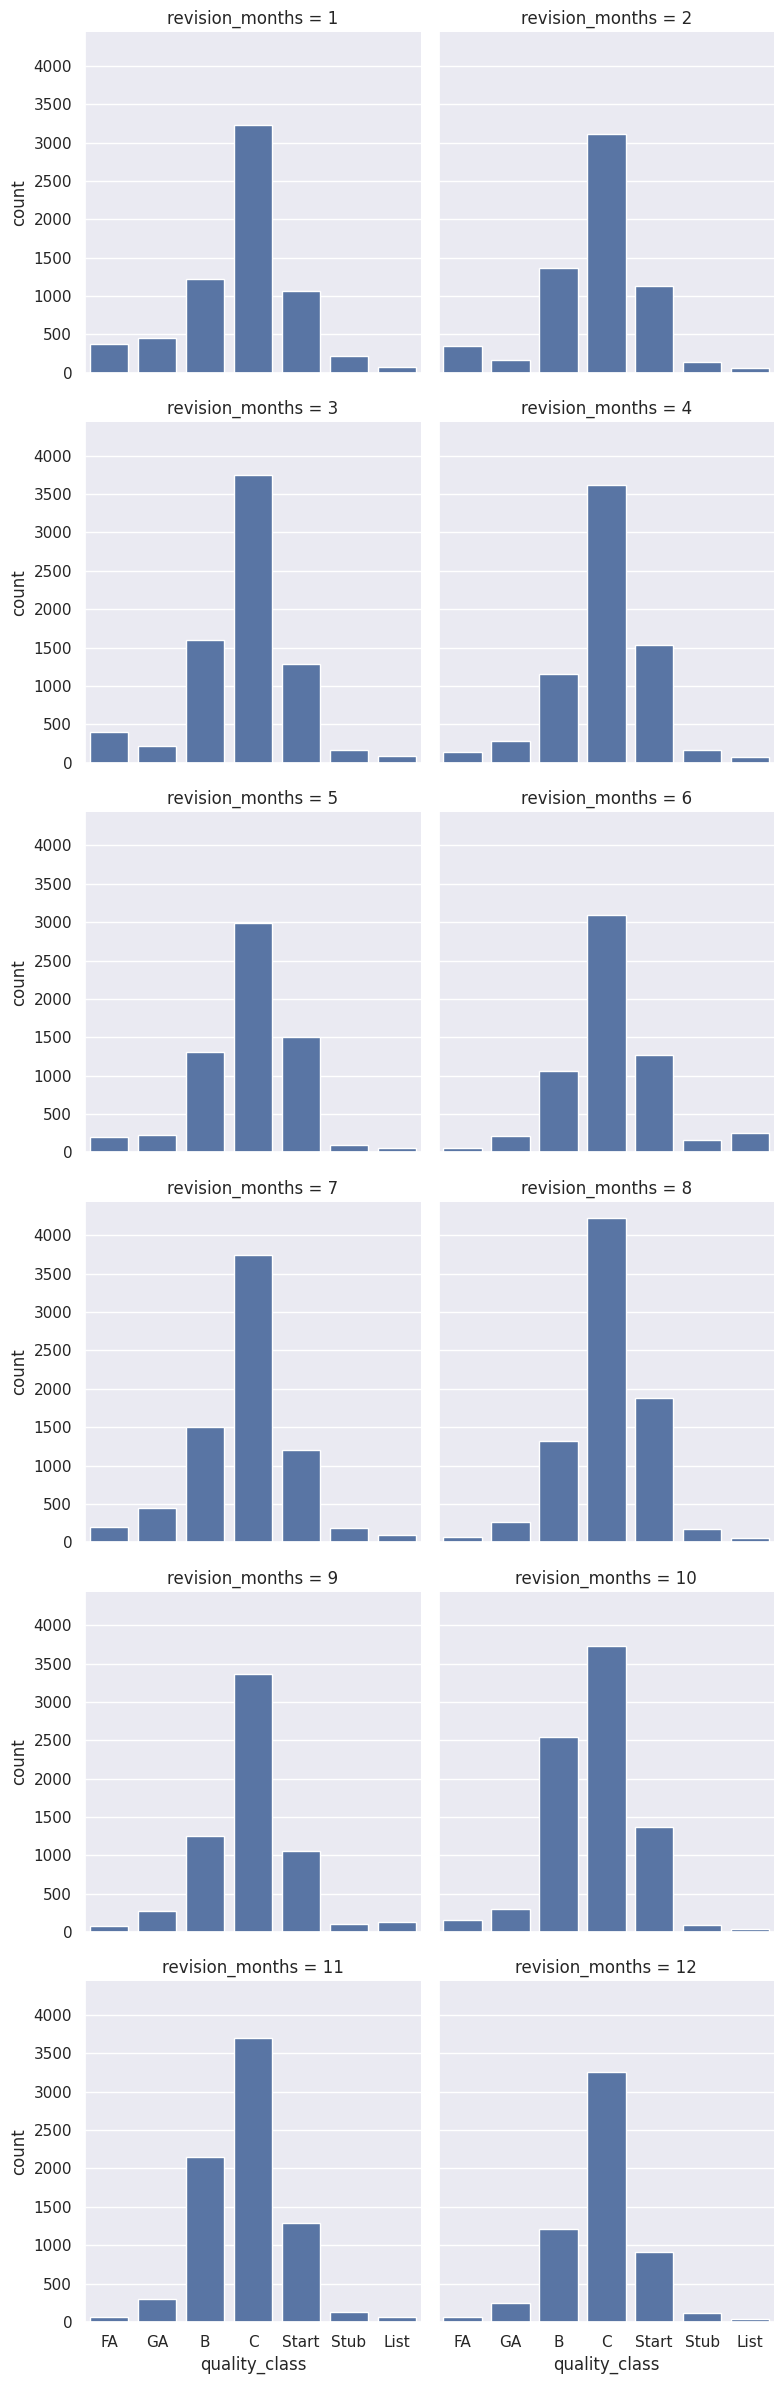

In [ ]:
# takes a sample year of 2022
g = sns.FacetGrid(data =df_revisions_quality_importance_scores.loc[df_revisions_quality_importance_scores.revision_year == 2022], col = "revision_months", height = 4, aspect = 1, col_wrap = 2,   row_order = bar_plot_order_quality_class)
g.map(sns.countplot, "quality_class", order = bar_plot_order_quality_class)

### Tradeoffs between longer and shorter granularities
1. There is not much difference between the plots using different granularities. The frequency of each quality class is almost the same in each of the sets of plots.
2. In the yearly and the months granularity, the frequency of quality scores increases over the years. This trend is not visible in the histogram plotted for the entire revision period.
3. Plots with shorter granularities show some variation in how high the bars are stacked but not in the order of magnitude.

### Filters and aggregations
1. Data was filtered based on the year and month with no aggregation taking place. The frequencies of each quality class was then taken and plotted in ordered histograms to show the distribution of quality class.

## D. Explore the importance_class of articles for different durations and granularities including year and month

                  ##### Plot of importance class over the entire revision period

<Axes: xlabel='importance_class', ylabel='count'>

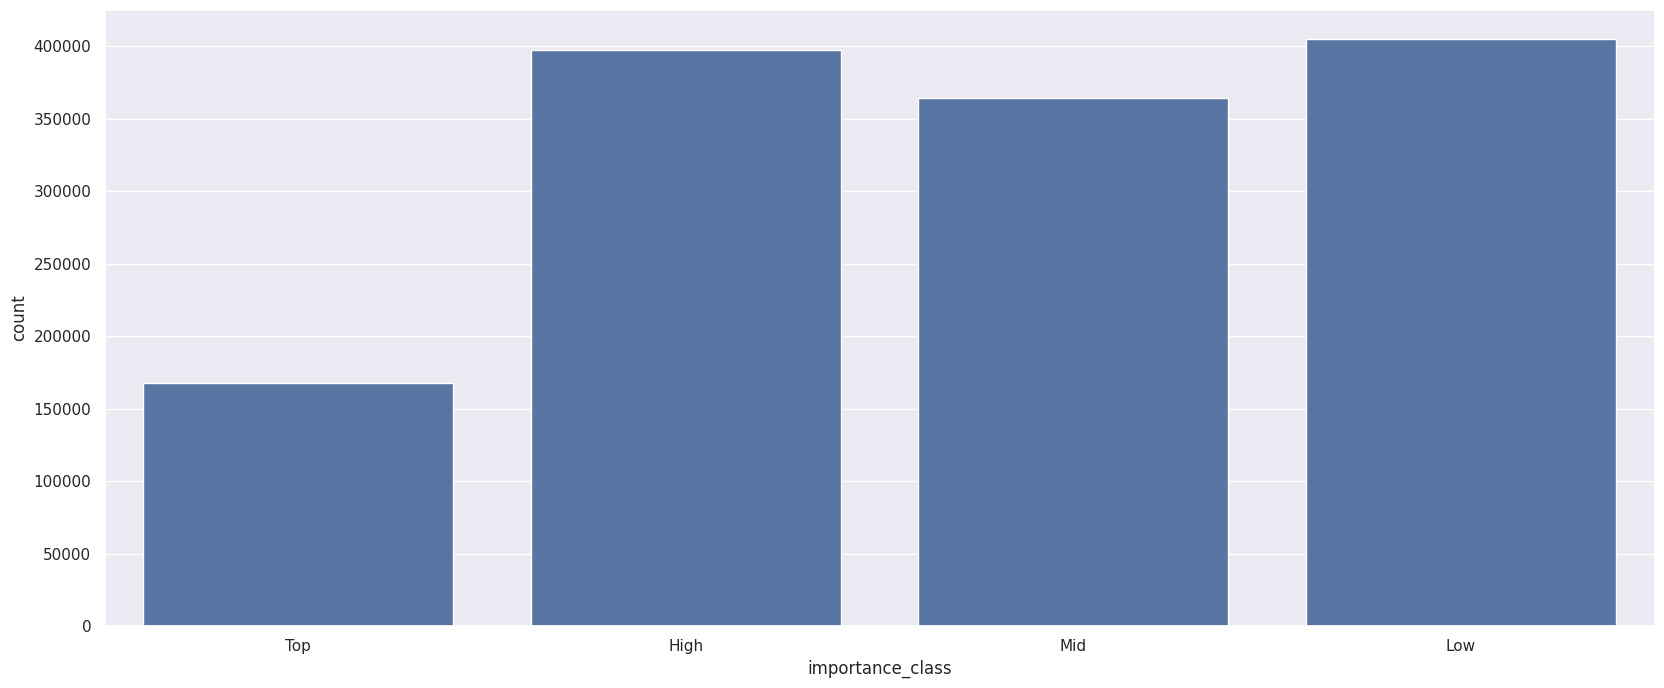

In [ ]:
bar_plot_order_importance_class = ["Top", "High","Mid", "Low"] #has the order of importance classes
sns.countplot(data = df_revisions_quality_importance_scores, x = "importance_class", order = bar_plot_order_importance_class)

          ###### Plot of importance class over a yearly granularity

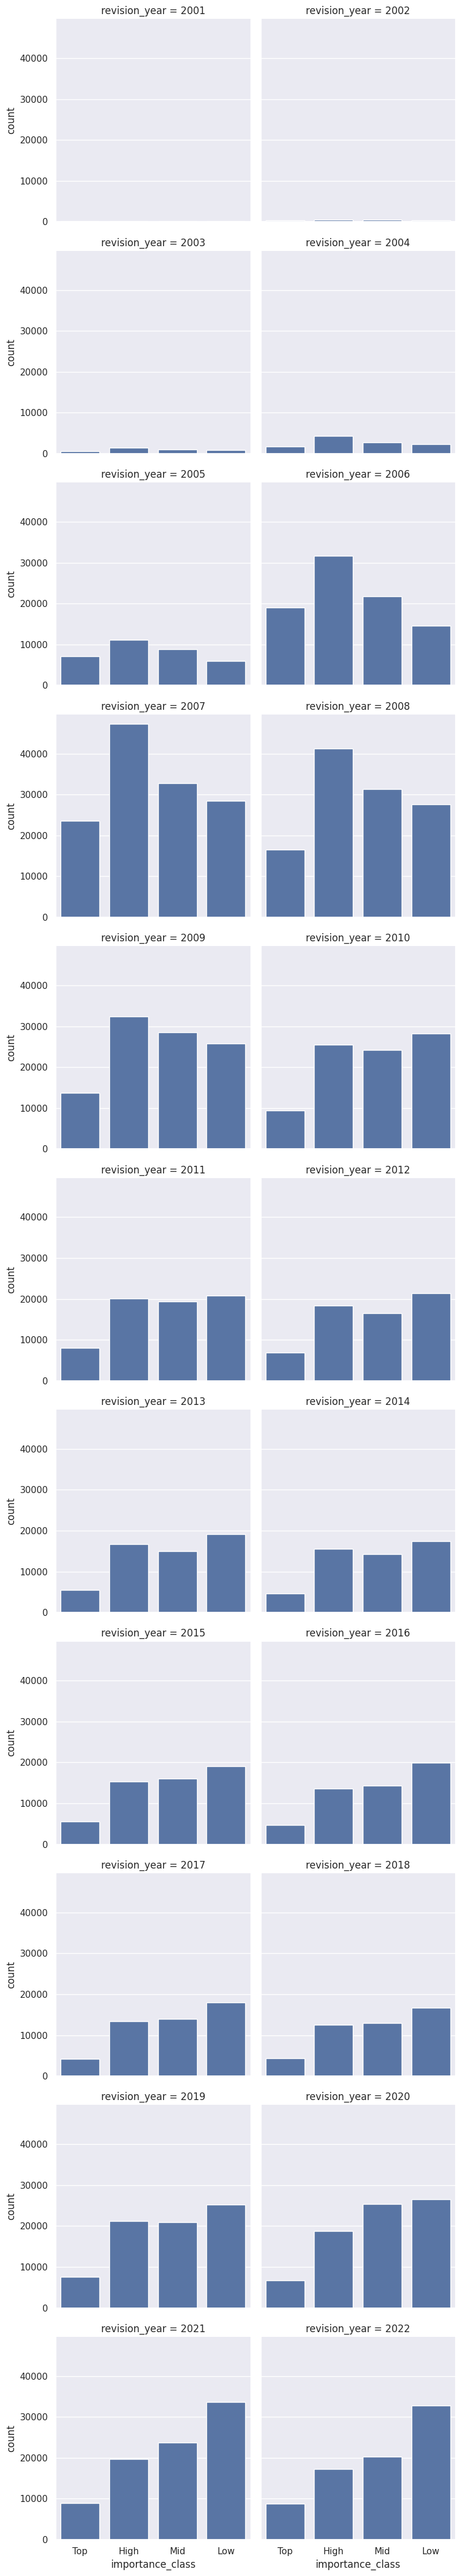

In [ ]:
g = sns.FacetGrid(data = df_revisions_quality_importance_scores, col = "revision_year", height = 4, aspect = 1, col_wrap = 2,   row_order = bar_plot_order_importance_class)
g.map(sns.countplot, "importance_class", order = bar_plot_order_importance_class)

                      #### Plot of importance_class over a granularity of months

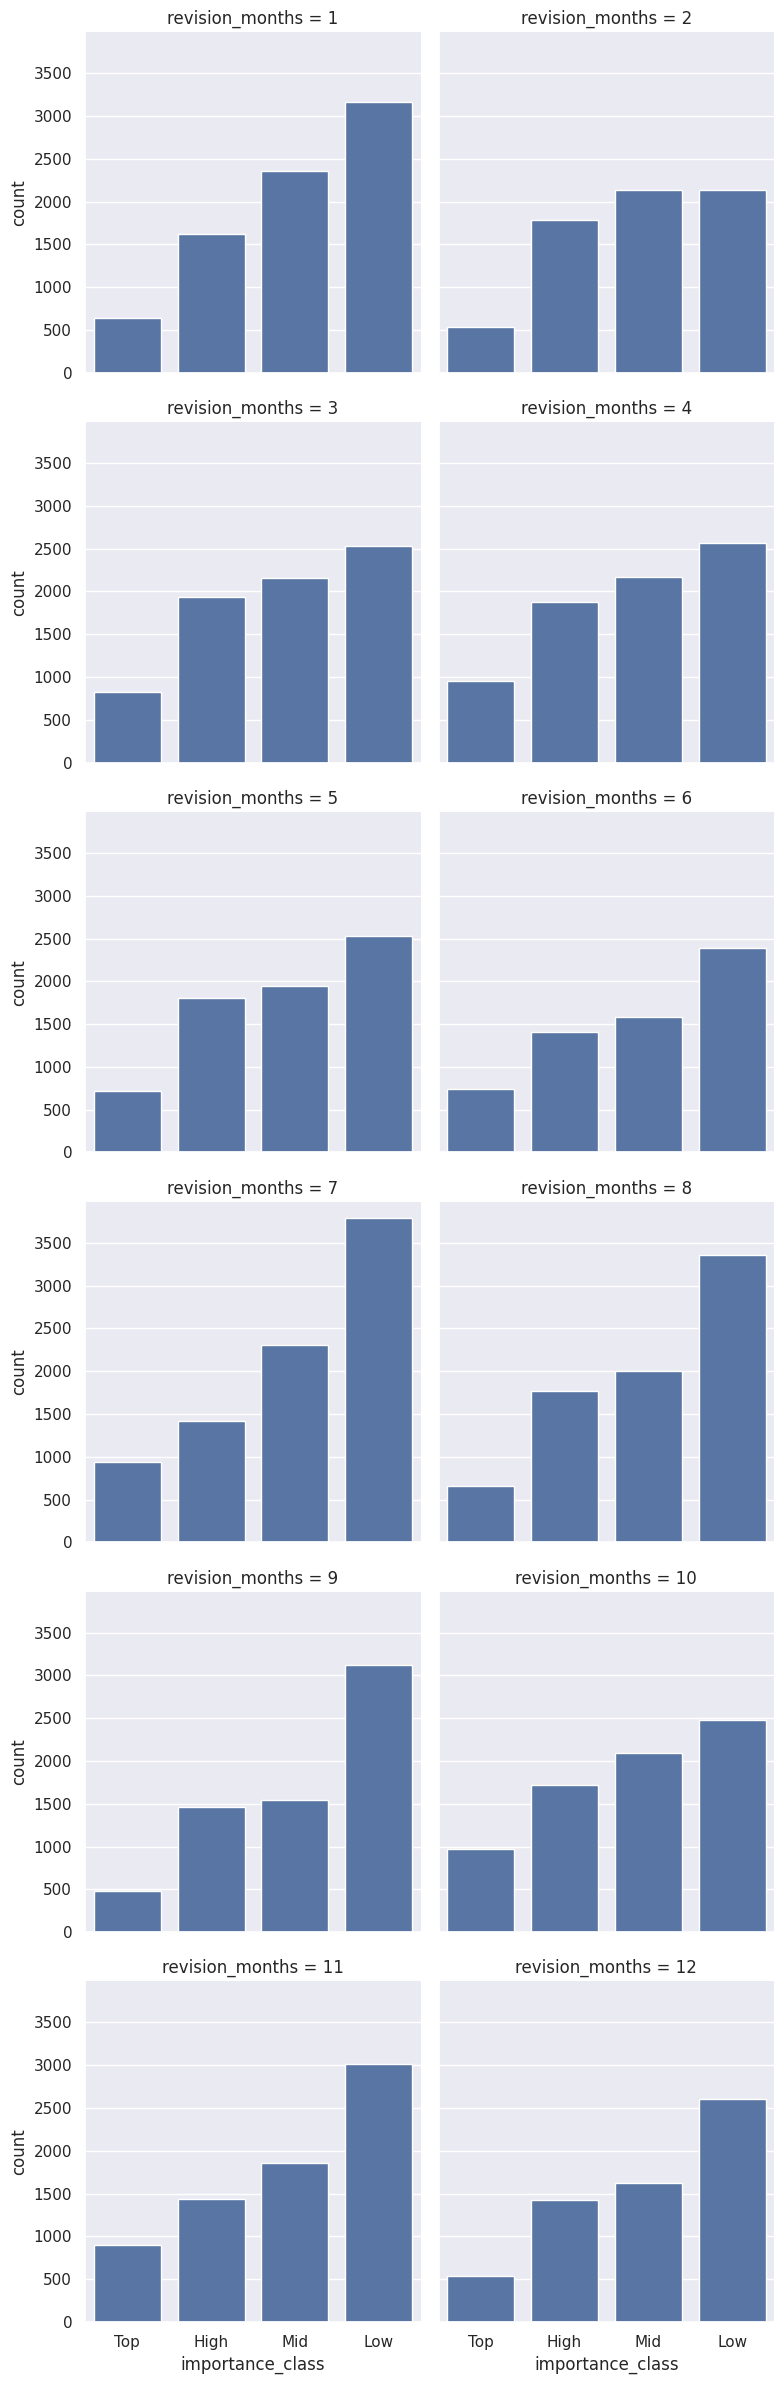

In [ ]:
# months
# pick a sample year, 2021
g = sns.FacetGrid(data =df_revisions_quality_importance_scores.loc[df_revisions_quality_importance_scores.revision_year == 2021], col = "revision_months", height = 4, aspect = 1, col_wrap = 2,   row_order = bar_plot_order_importance_class)
g.map(sns.countplot, "importance_class", order = bar_plot_order_importance_class)

#### Tradeoffs between shorter and longer granularity
1. Shorter granularities such as year and month give more variation to the distribution of importance class compared to the plot of the entire revision period. However, post 2013 there is an increasing agreement with the plot of distribution for the entire revision period.
2. There is however a clear agreement in most plots about the distribution of importance class over different granularities.

#### Aggregations and Filters
1. Data was filtered based on time granularity (year and months) with no aggregation taking place. The frequency of importance classes were plotted on a histogram to show their distribution for the entire revision period, for the sequence of years and for a sample year.

## E. Relationship between (page_length and pred_qual) (page_length and quality_class) (page_length and importance_class)

In [ ]:
# here we get the maximum values of page length for each page_id.
# we do this so that we can create a line plot that shows the relationship between page_length and pred_quality
# the revision_id will be used to merge with the respective pred_qual valies in the original df_revisions
df_page_length_analysis = df_revisions.loc[:, ["page_id", "page_length", "revision_id", "quality_class", "importance_class", "revision_year", "revision_months"]].groupby("page_id").max()
df_page_length_analysis

page_length  revision_id quality_class importance_class  \
page_id                                                             
39              61509   1127470765             B             High   
627            267574   1122142578            GA              Low   
903             19562   1124952523             C              Low   
1365           151410   1130090281             B              Low   
3201           123800   1126273383             B             High   
...               ...          ...           ...              ...   
72569668         7523   1130664066             C              Low   
72596935         5081   1130388362             C              Low   
72598169        11562   1130644028             C              Low   
72613949        10395   1130613139         Start              Low   
72624020         1879   1130730324         Start              Mid   

          revision_year  revision_months  
page_id                                   
39                 2022               12  
627                2022               12  
903                2022               12  
1365               2022               12  
3201               2022               12  
...                 ...              ...  
72569668           2022               12  
72596935           2022               12  
72598169           2022               12  
72613949           2022               12  
72624020           2022               12  

[3642 rows x 6 columns]

In [ ]:
pred_qual_values = df_revisions.loc[:, ["revision_id", "pred_qual"]] # we get the two columns we need from the main dataframe
df_page_length_analysis = df_page_length_analysis.merge(pred_qual_values, left_on = "revision_id", right_on = "revision_id")
#we use the merge function to combine our dataframes thus getting the pred_qual values
df_page_length_analysis

page_length revision_id quality_class importance_class  revision_year  \
0           61509  1127470765             B             High           2022   
1          267574  1122142578            GA              Low           2022   
2           19562  1124952523             C              Low           2022   
3          151410  1130090281             B              Low           2022   
4          123800  1126273383             B             High           2022   
...           ...         ...           ...              ...            ...   
3637         7523  1130664066             C              Low           2022   
3638         5081  1130388362             C              Low           2022   
3639        11562  1130644028             C              Low           2022   
3640        10395  1130613139         Start              Low           2022   
3641         1879  1130730324         Start              Mid           2022   

      revision_months  pred_qual  
0                  12   0.881909  
1                  12   0.854619  
2                  12   0.581719  
3                  12   0.945119  
4                  12   0.806806  
...               ...        ...  
3637               12   0.469029  
3638               12   0.458267  
3639               12   0.458552  
3640               12   0.384134  
3641               12   0.307534  

[3642 rows x 7 columns]

###### Page length and pred quality over different granularities

                ##### Plot of page_length and pred_quality over the entire revision period

In [ ]:
# set default styling for seaborn
width = 20
height = 8
sns.set(rc = {'figure.figsize':(width, height)})

<Axes: xlabel='page_length', ylabel='pred_qual'>

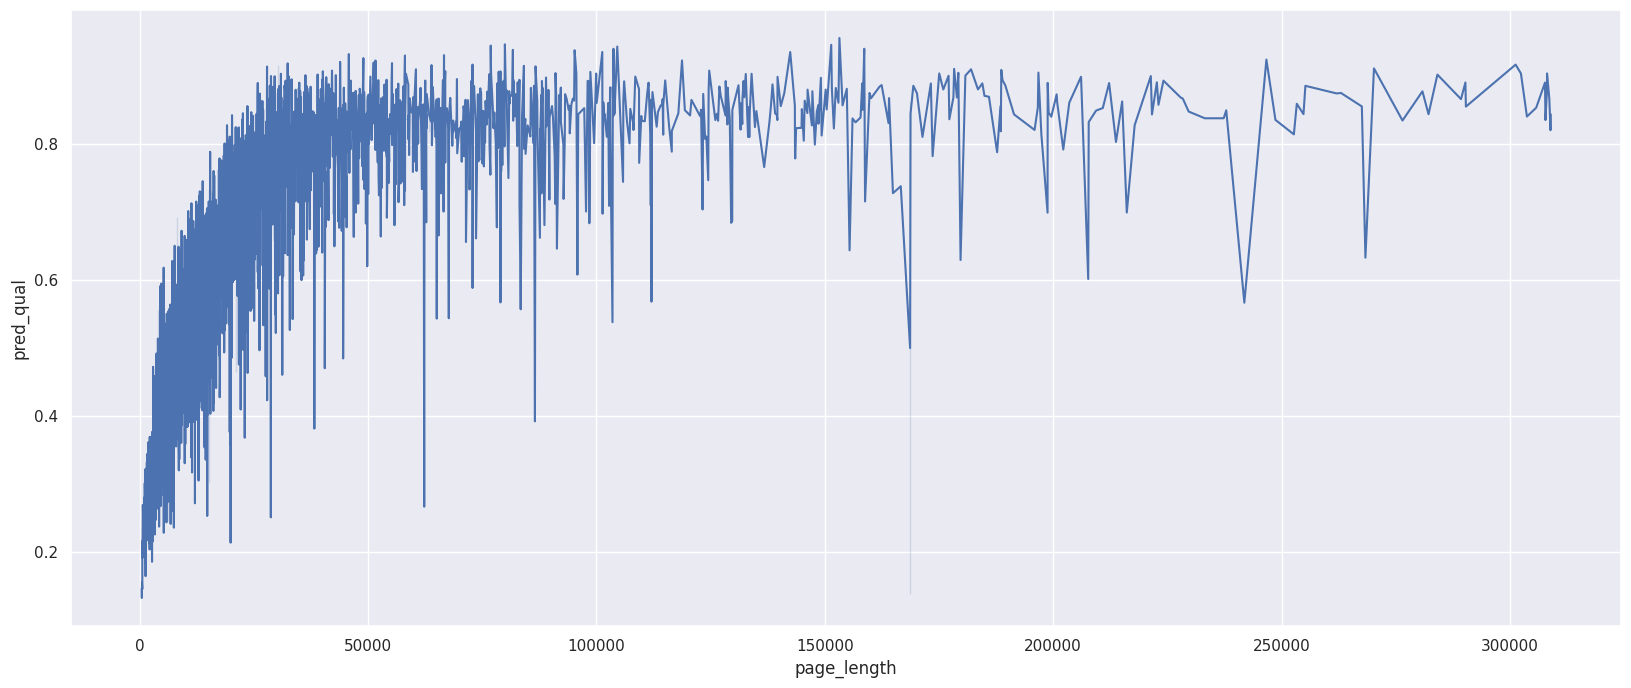

In [ ]:
# a line graph that shows how page_length is related to pred_qual over the entire duration of the revisions
# fig = plt.subplots(figsize=(20, 10))
sns.lineplot(data = df_page_length_analysis, x = "page_length", y = "pred_qual")

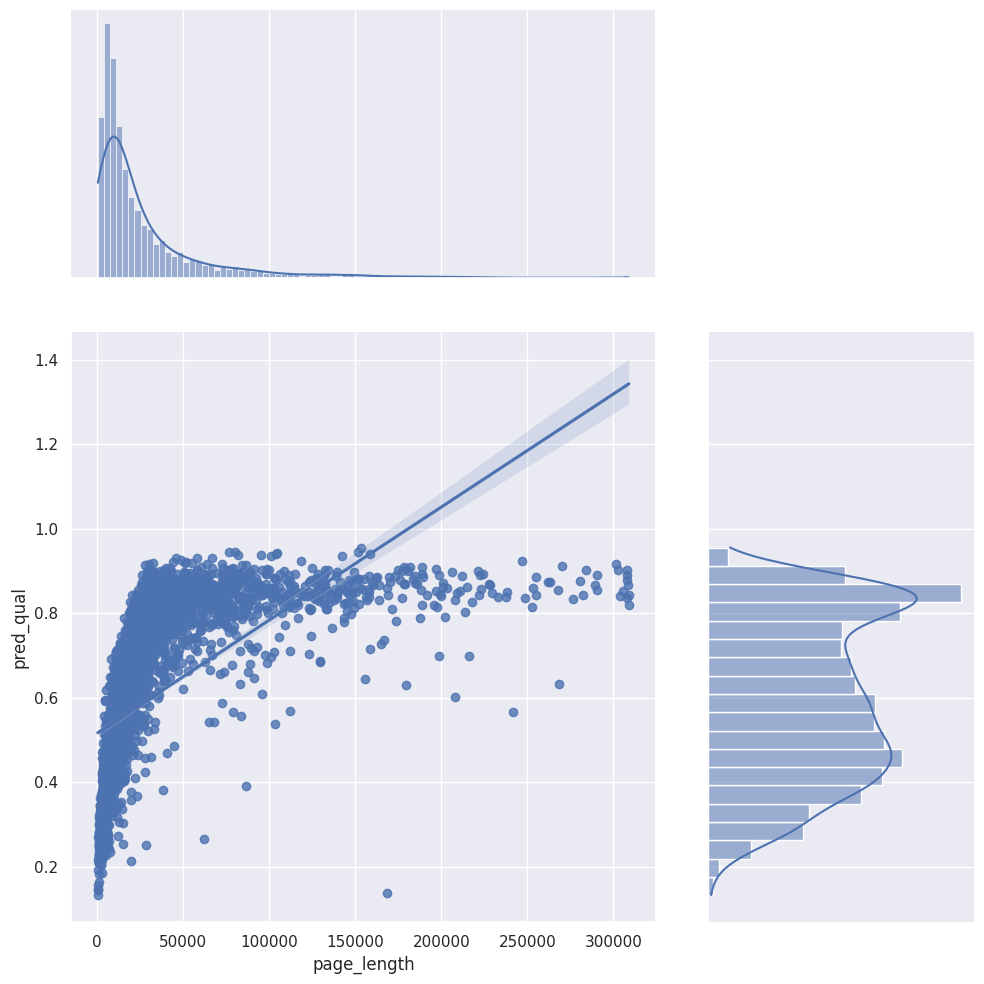

In [ ]:
sns.jointplot(df_page_length_analysis,x = "page_length", y = "pred_qual", kind = "reg", height = 10, ratio = 2)

                  ###### Plot of page_length and pred_qual over a sample year (granularity of months)

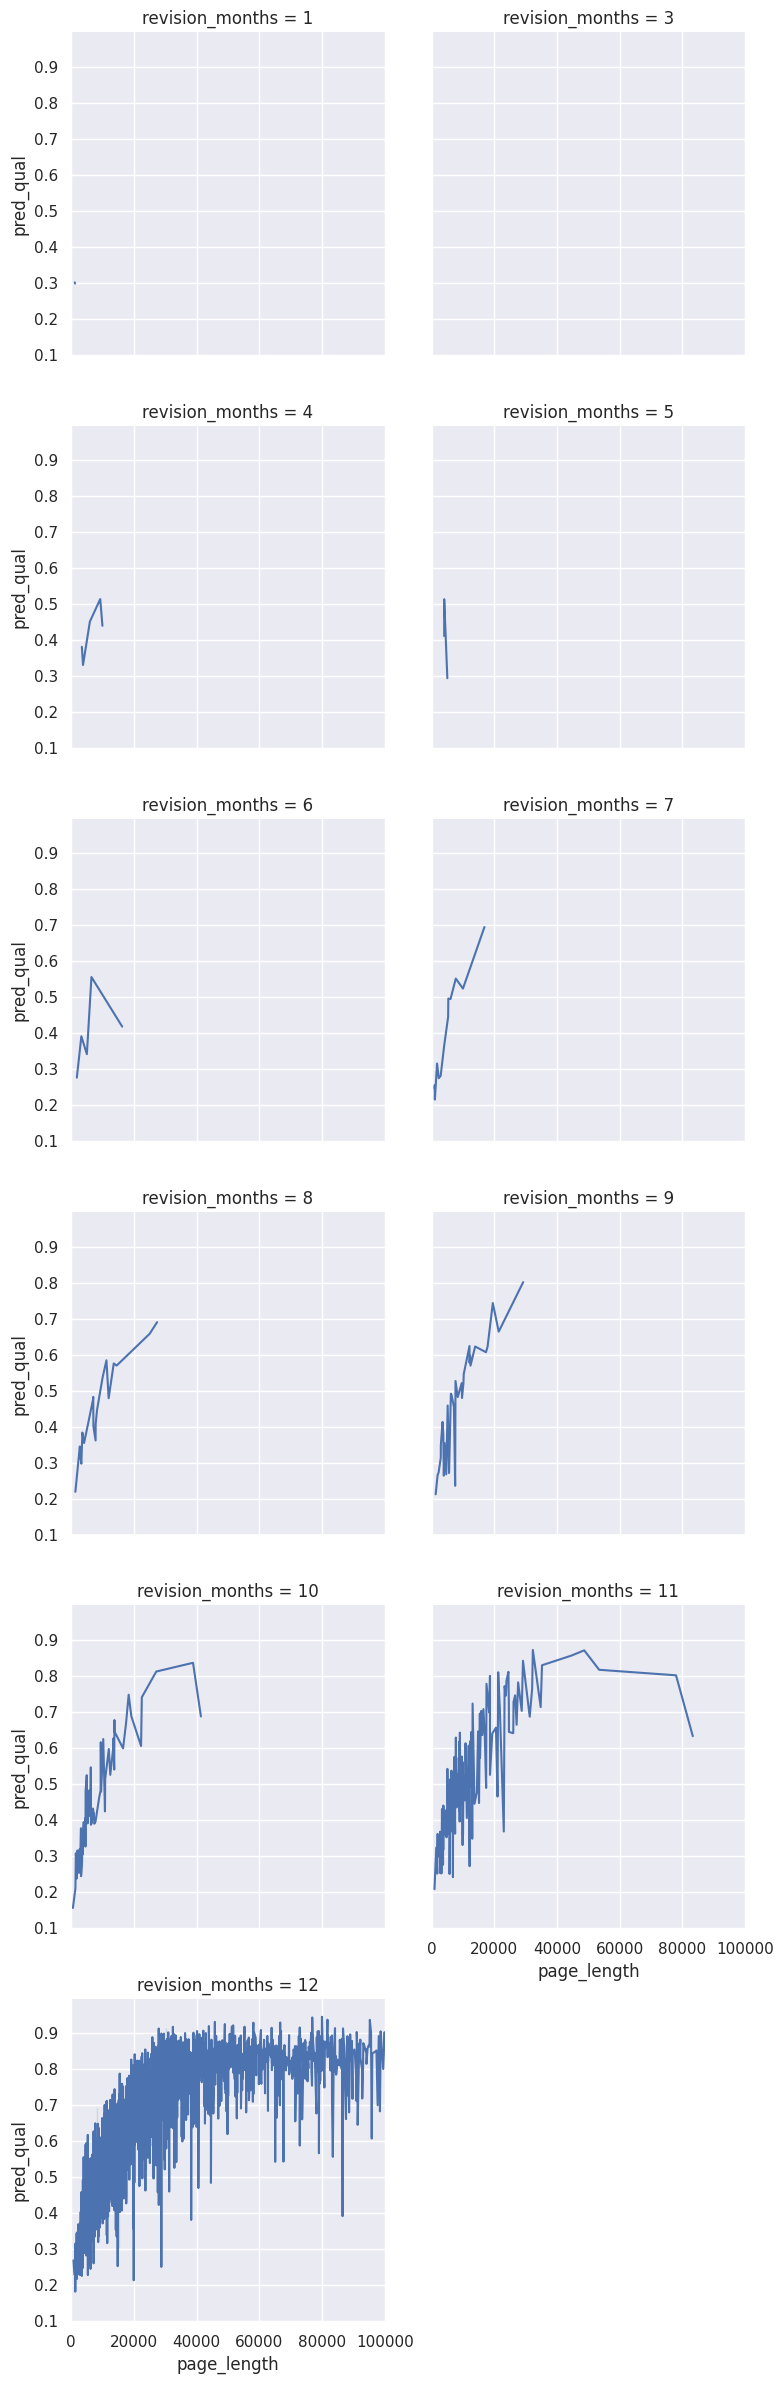

In [ ]:
# plot of page length and pred_qual over a shorter granularity of monthls
# picks a sample year ie 2022 to analyze the months
g = sns.FacetGrid(data =df_page_length_analysis.loc[df_page_length_analysis.revision_year == 2022], col = "revision_months", height = 4, aspect = 1, col_wrap = 2)
g.set(xlim=(0, 100000)) #reduces the value of the x axis to get a better understanding of the linear relationship
g.map(sns.lineplot, "page_length", "pred_qual")


                  ###### Plot of page_length and pred_qual over a sample month (granularity of days)

<Axes: title={'center': 'December, 2022'}, xlabel='page_length', ylabel='pred_qual'>

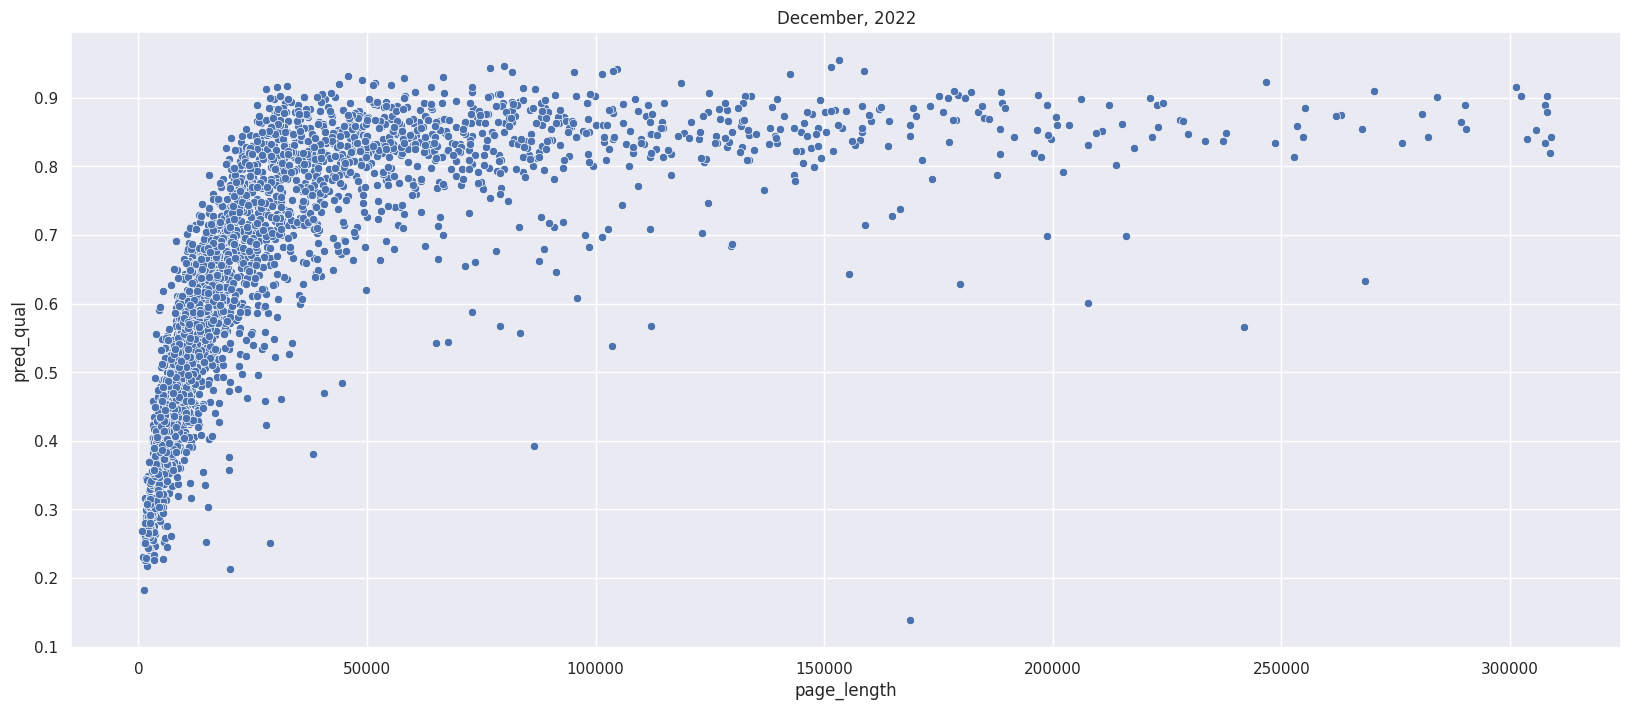

In [ ]:
# isolate one month for further analysis
# pick the last month of 2022 ie December
plt.title("December, 2022")
sns.scatterplot(data = df_page_length_analysis.loc[df_page_length_analysis.revision_year == 2022].loc[df_page_length_analysis.revision_months == 12], x = "page_length", y = "pred_qual")


###### Plots of page_length and quality class over different granularities

              ##### Plot of page_length and quality_class over the entire revision period

<Axes: xlabel='quality_class', ylabel='page_length'>

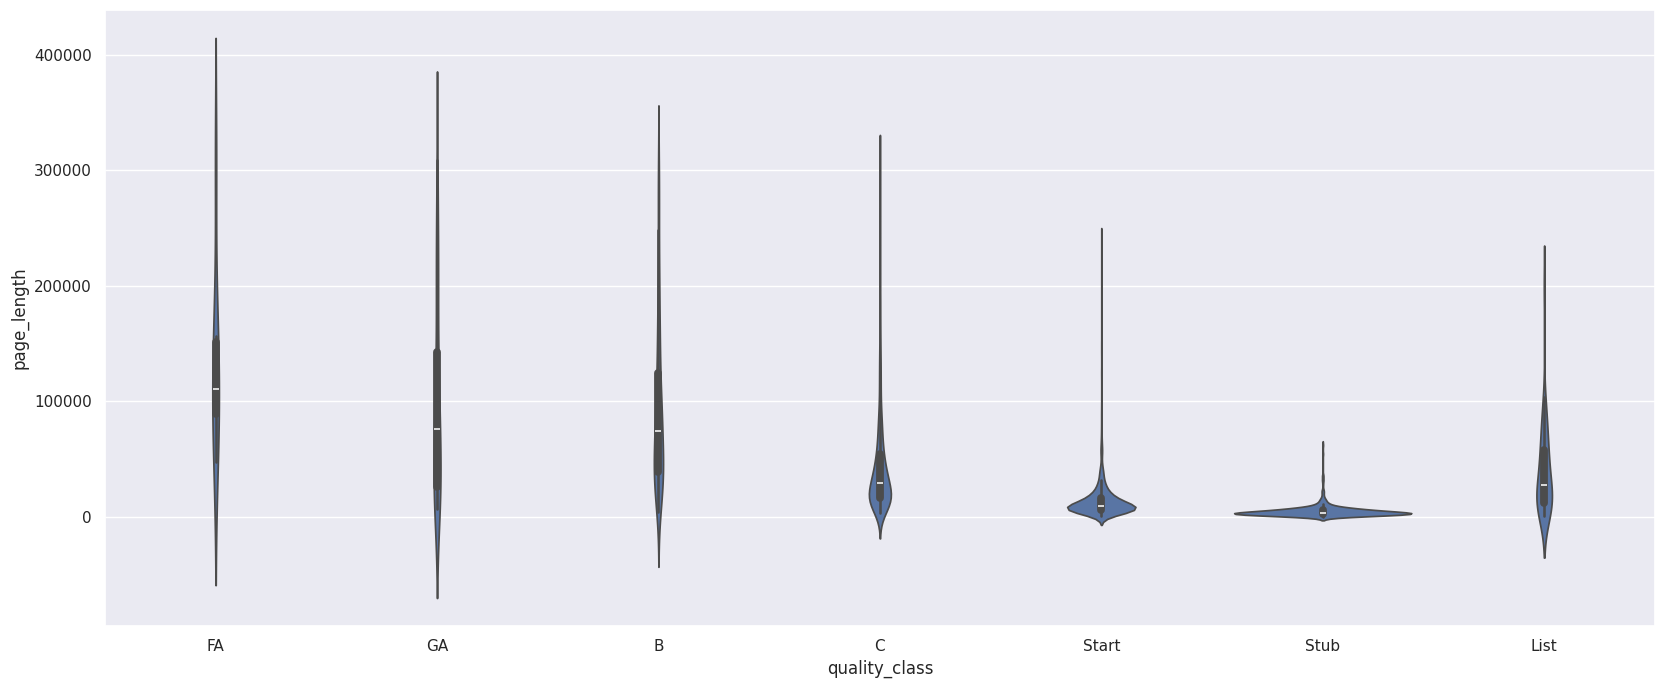

In [ ]:
# a violin plot that finds out the relationship between quality class and the page_length over the entire duration of the revisions
bar_plot_order_quality_class = ["FA", "GA", "B", "C", "Start", "Stub", "List"]
sns.violinplot(data = df_page_length_analysis, x = "quality_class", y = "page_length", order = bar_plot_order_quality_class)

<Axes: xlabel='quality_class', ylabel='page_length'>

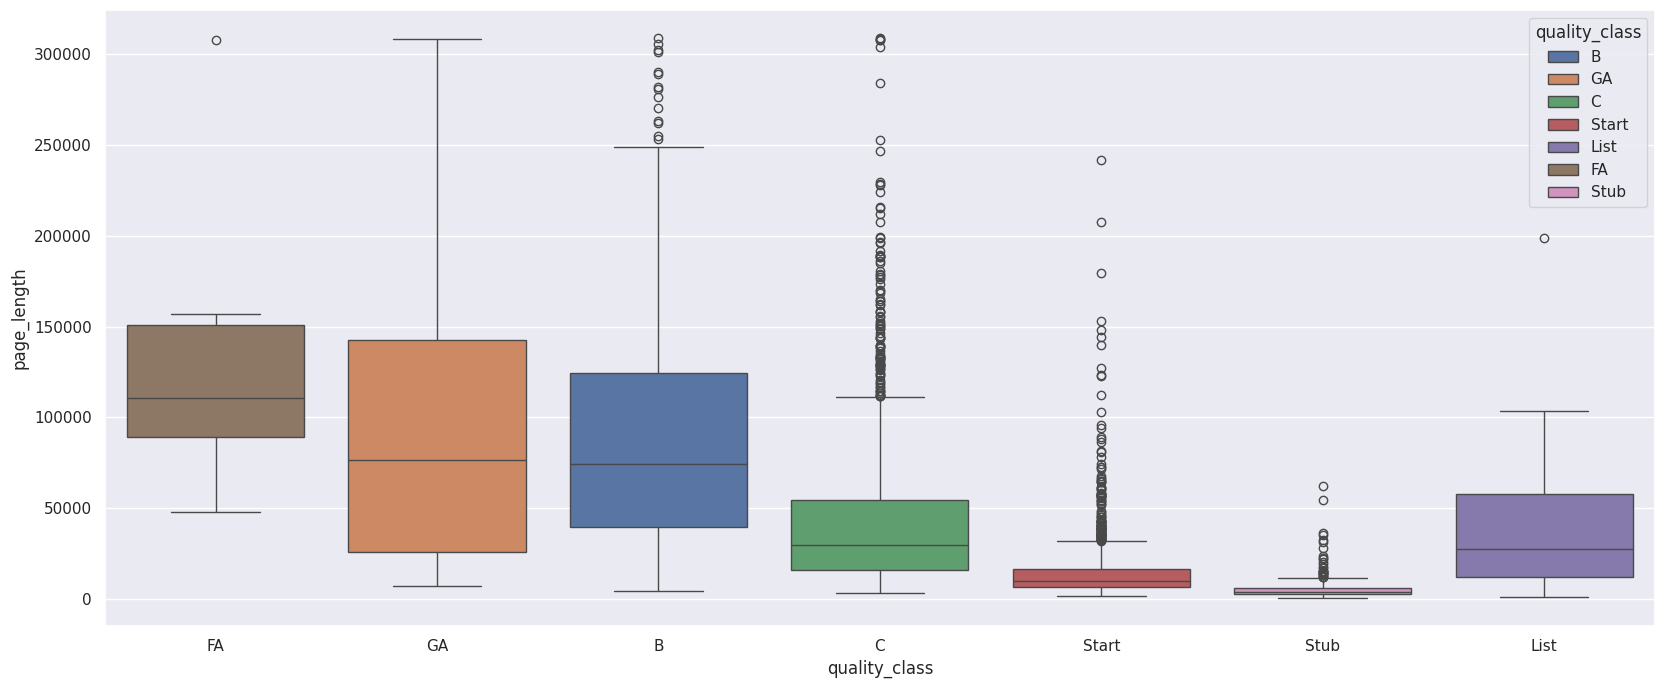

In [ ]:
sns.boxplot(data = df_page_length_analysis, x = "quality_class", y = "page_length", order = bar_plot_order_quality_class, hue = "quality_class")

                    ###### Plot of page_length and quality_class over a sample year (granularity of months)

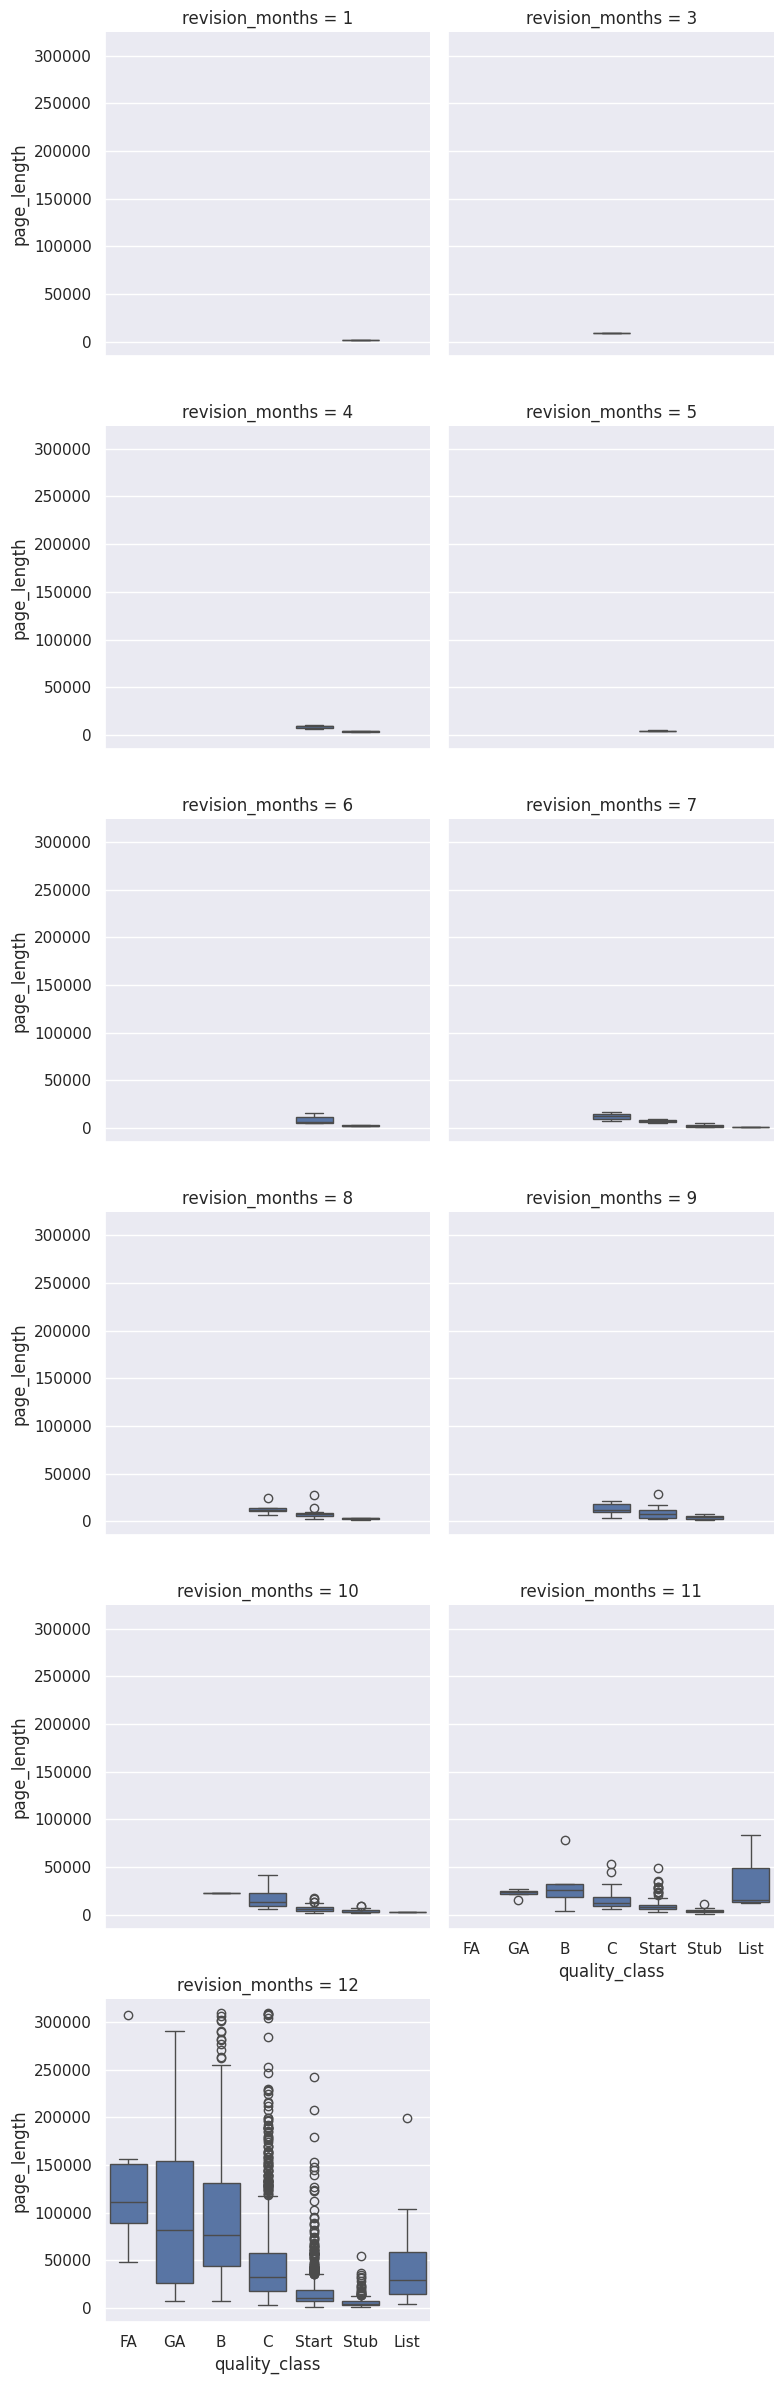

In [ ]:
# violin plot of qualty class and page length over a monthly granularity
# take a smaple year  = 2022
g = sns.FacetGrid(data =df_page_length_analysis.loc[df_page_length_analysis.revision_year == 2022], col = "revision_months", height = 4, aspect = 1, col_wrap = 2, row_order = bar_plot_order_quality_class)
g.map(sns.boxplot, "quality_class", "page_length", order = bar_plot_order_quality_class)

###### Plots of page length and importance class over different granularities

                ##### Plot of page_length and importance_class over the entire revision period

<Axes: xlabel='importance_class', ylabel='page_length'>

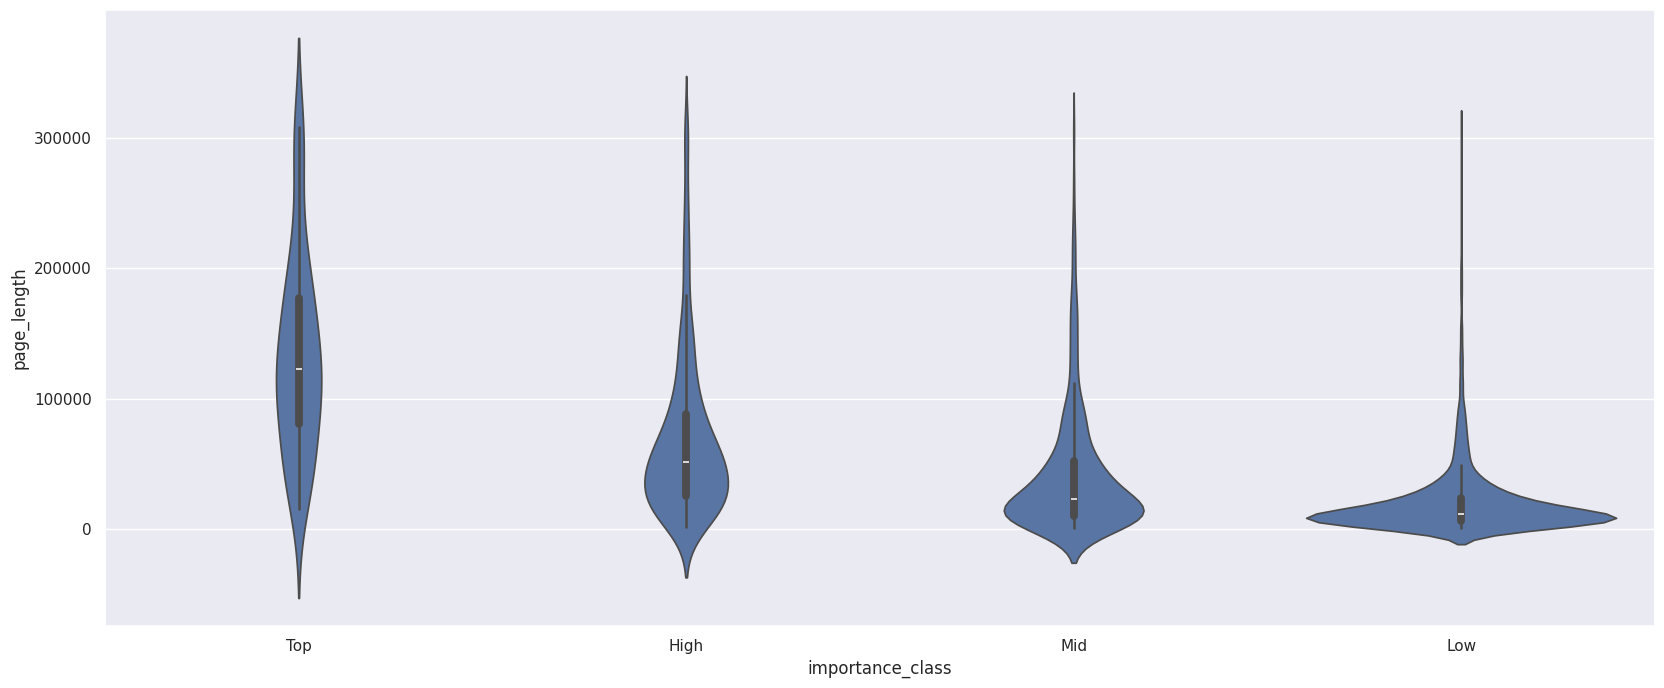

In [ ]:
# this plot shows the relationship between page_length and importance _class
bar_plot_order_importance_class = ["Top", "High","Mid", "Low"]
sns.violinplot(data = df_page_length_analysis, x = "importance_class", y = "page_length", order = bar_plot_order_importance_class)

<Axes: xlabel='importance_class', ylabel='page_length'>

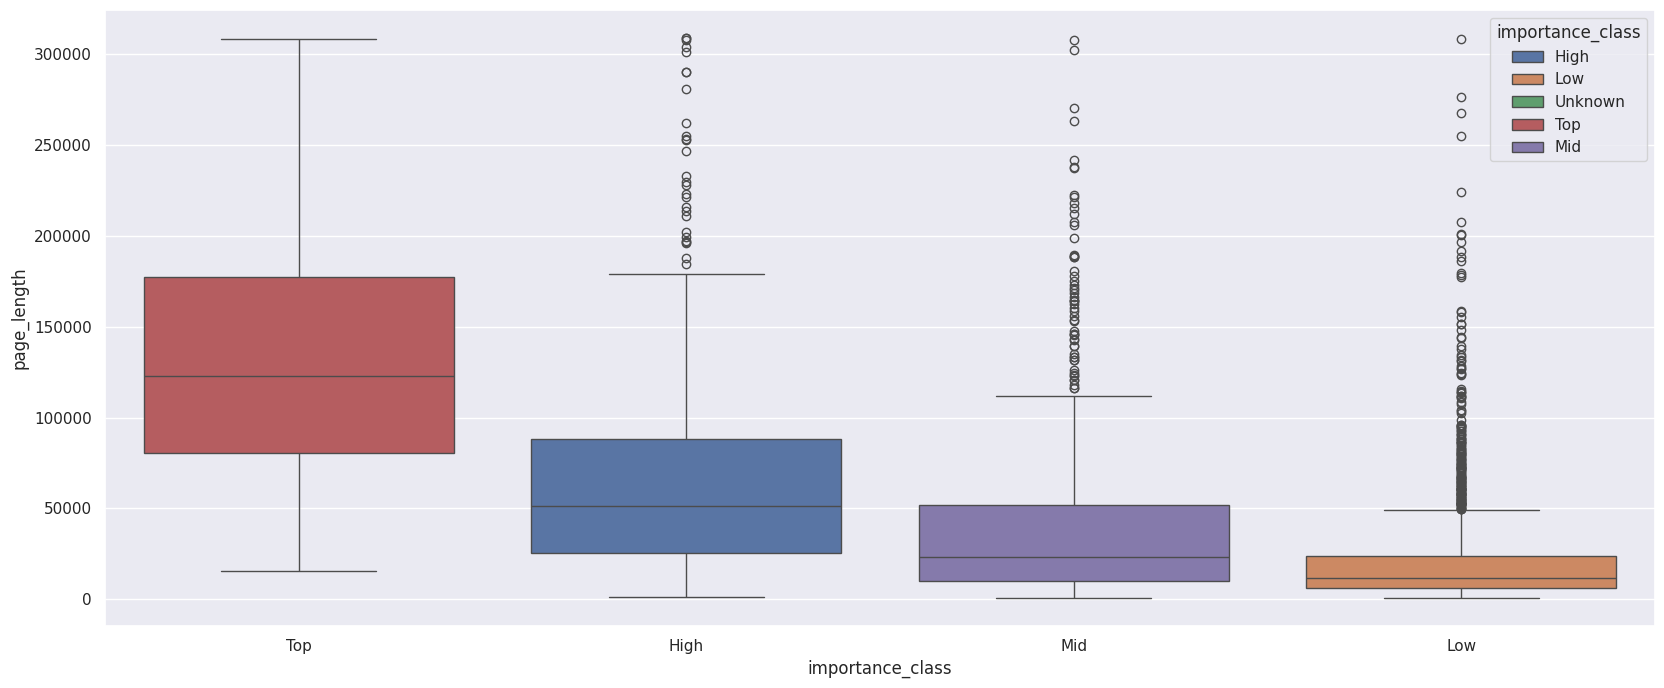

In [ ]:
# boxplot of distribution of importance class
sns.boxplot(data = df_page_length_analysis, x = "importance_class", y = "page_length", order = bar_plot_order_importance_class, hue = "importance_class")

                    ##### Plot of page_length and importance_class over a sample year (granularity of months)

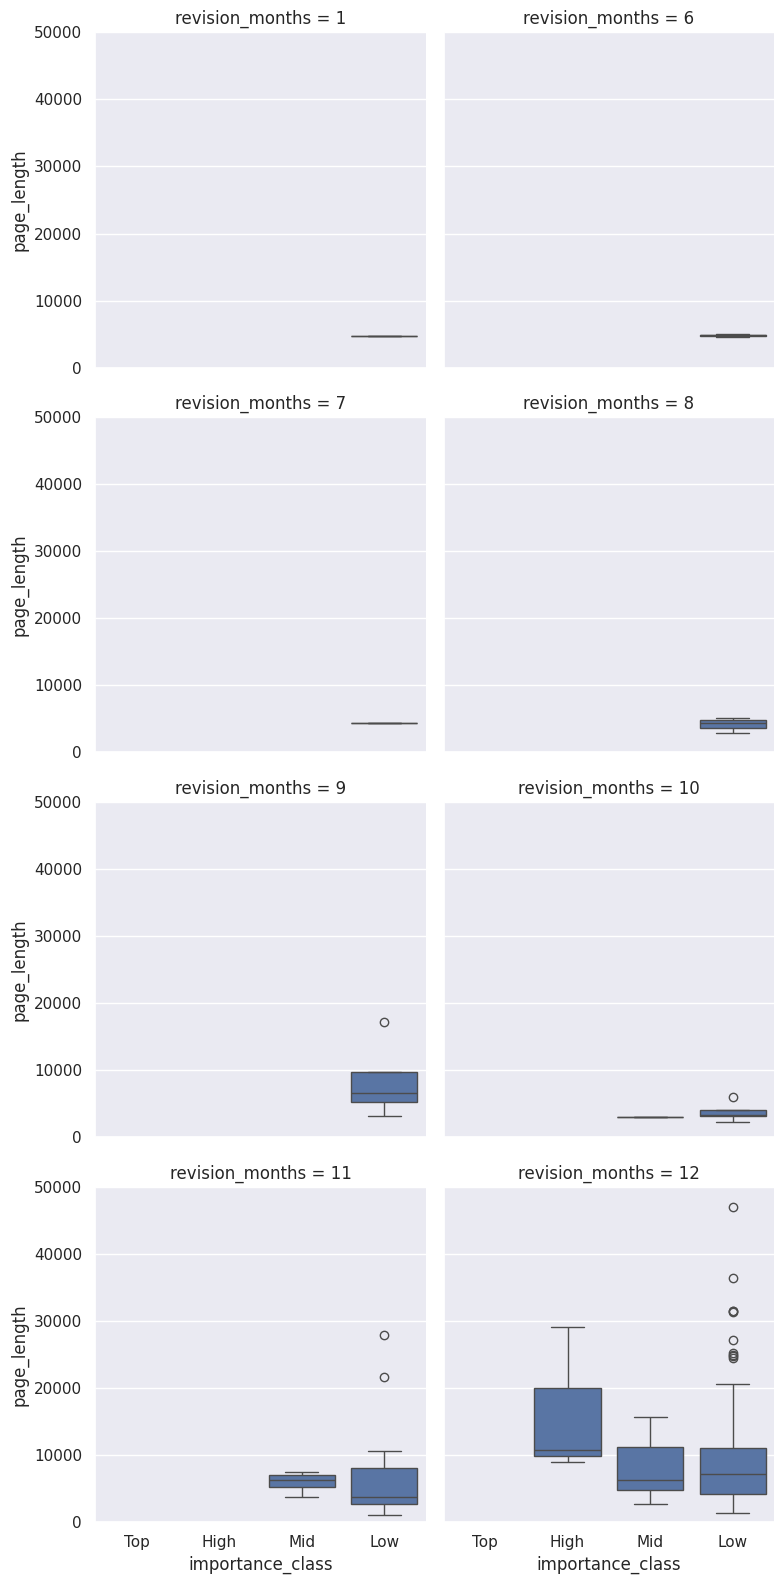

In [ ]:
# bar plot of importance class and page length over a monthly granularity
# take a smaple year  = 2021
g = sns.FacetGrid(data =df_page_length_analysis.loc[df_page_length_analysis.revision_year == 2021], col = "revision_months", height = 4, aspect = 1, col_wrap = 2, row_order = bar_plot_order_importance_class)
plt.ylim(0, 50000)
g.map(sns.boxplot, "importance_class", "page_length", order = bar_plot_order_importance_class)

###### Observations
1. The higher the page_length the greater the predicted quality of the article.
2. Articles which are of the least quality (Stubs) have a page_length of less than 10,000
3. Articles with a higher quality class and importance class have a greater median value of page_length

###### Tradeoffs between shorter and longer granularities
1. Scatter Plot (page_length and pred_qual)
 - Shorter granularities confirmed the type of relationship between page_length and pred_qual. There is much variation in plots of all granularities but generally articles with a higher page_length have a higher pred_qual.
2. Boxplot and Violin plot (quality_class and page_length)
- Shorter granularities showed a much greater variation than seen in plots of longer granularities. In plots of longer granularities, the trend is that a higher page_length correlates with a higher quality_class.
- This variation can be explained by the violinplot which shows that even though articles with a higher quality score have a greater median page_length, the class size of such articles is small while the class size of articles in lower quality classes, and more so,  the two lowest classes are much larger. Indeed, in the violin plots covering the entire revision period, the class size of articles with high quality classes were very small.
3. Boxplot and Violin plot (importance class and page_length)
 - Shorter granularities also had more variation compared to longer granularity plots. This variation occurred despite having enough articles categorized under each importance class. Thus, the issue was probably with the sample selected which had an inadequate number of articles from higher importance classes.

###### Agregation and Filtering Choices
- A smaller dataframe was generated that contained the variables that were the subject of analyses.
- Violin and boxplot graphs were used for variable pairs that had at least one qualitative variable while a line plot was used for variable pairs that were both quantitative.
- The maximum page_length was taken for each article to prove the hypothesis that the higher the page_length the higher the quality score

### F. Relationship between (num_refs and pred_qual) (num_refs and quality class) (num_refs and importance class)

In [ ]:
# here we get the maximum num_refs per article id irrespective of the revision date it was made
df_num_refs_analysis = df_revisions.loc[:, ["page_id", "num_refs", "revision_id", "quality_class", "importance_class", "revision_year", "revision_months"]].groupby("page_id").max()
df_num_refs_analysis

num_refs  revision_id quality_class importance_class  revision_year  \
page_id                                                                         
39             120   1127470765             B             High           2022   
627            477   1122142578            GA              Low           2022   
903             13   1124952523             C              Low           2022   
1365           219   1130090281             B              Low           2022   
3201           213   1126273383             B             High           2022   
...            ...          ...           ...              ...            ...   
72569668        17   1130664066             C              Low           2022   
72596935        10   1130388362             C              Low           2022   
72598169        17   1130644028             C              Low           2022   
72613949        32   1130613139         Start              Low           2022   
72624020         2   1130730324         Start              Mid           2022   

          revision_months  
page_id                    
39                     12  
627                    12  
903                    12  
1365                   12  
3201                   12  
...                   ...  
72569668               12  
72596935               12  
72598169               12  
72613949               12  
72624020               12  

[3642 rows x 6 columns]

In [ ]:
# pred_qual_values - a variable created in the first analysis that holds the revision id and pred qual of all articles
df_num_refs_analysis = df_num_refs_analysis.merge(pred_qual_values, left_on = "revision_id", right_on = "revision_id")
#we use the merge function to combine our dataframes thus getting the pred_qual values
df_num_refs_analysis

num_refs revision_id quality_class importance_class  revision_year  \
0          120  1127470765             B             High           2022   
1          477  1122142578            GA              Low           2022   
2           13  1124952523             C              Low           2022   
3          219  1130090281             B              Low           2022   
4          213  1126273383             B             High           2022   
...        ...         ...           ...              ...            ...   
3637        17  1130664066             C              Low           2022   
3638        10  1130388362             C              Low           2022   
3639        17  1130644028             C              Low           2022   
3640        32  1130613139         Start              Low           2022   
3641         2  1130730324         Start              Mid           2022   

      revision_months  pred_qual  
0                  12   0.881909  
1                  12   0.854619  
2                  12   0.581719  
3                  12   0.945119  
4                  12   0.806806  
...               ...        ...  
3637               12   0.469029  
3638               12   0.458267  
3639               12   0.458552  
3640               12   0.384134  
3641               12   0.307534  

[3642 rows x 7 columns]

                  ####### Plot of num_refs and pred_qual over a granularity of years

<Axes: xlabel='num_refs', ylabel='pred_qual'>

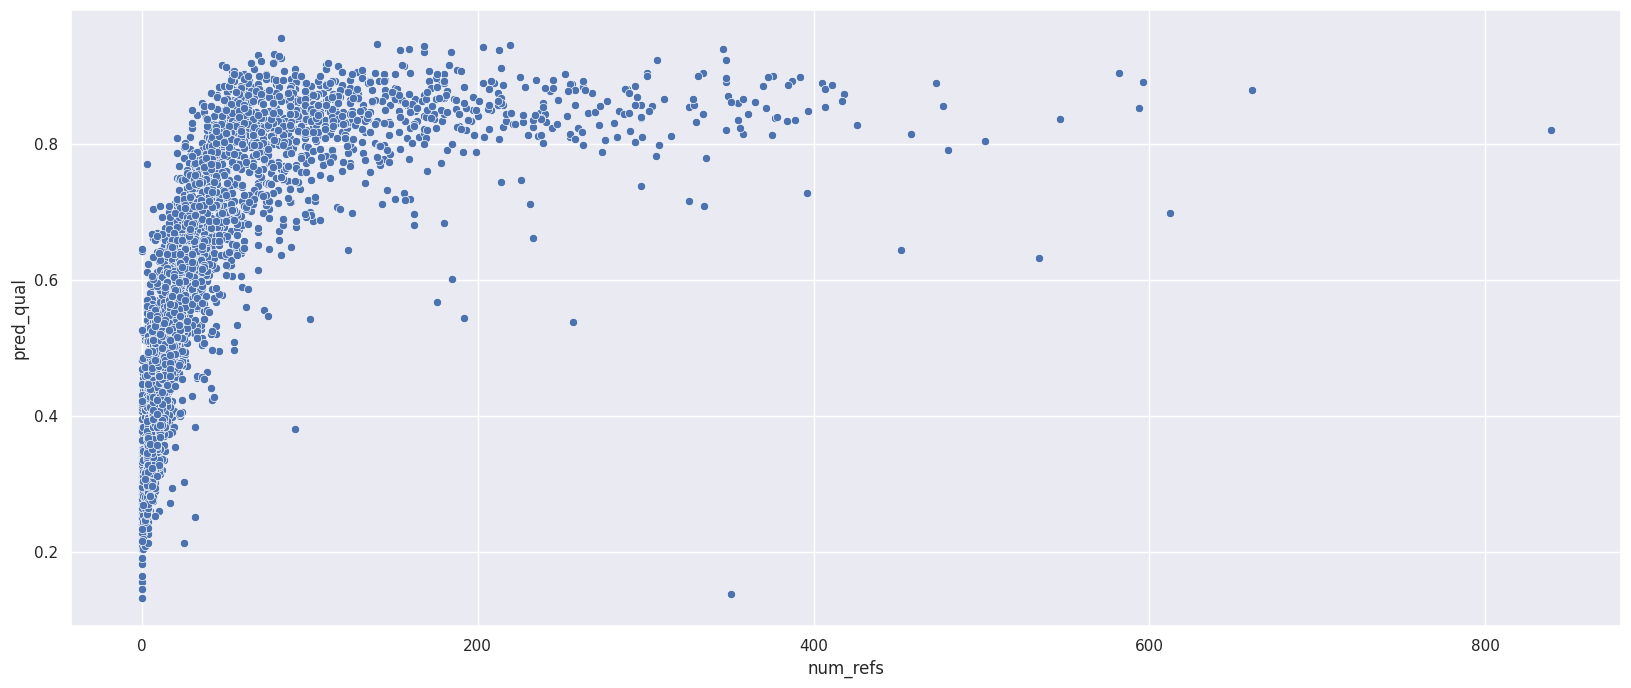

In [ ]:
# a scatter plot showing the relationship between num_refs and pred_qual
sns.scatterplot(data = df_num_refs_analysis, x = "num_refs", y = "pred_qual")

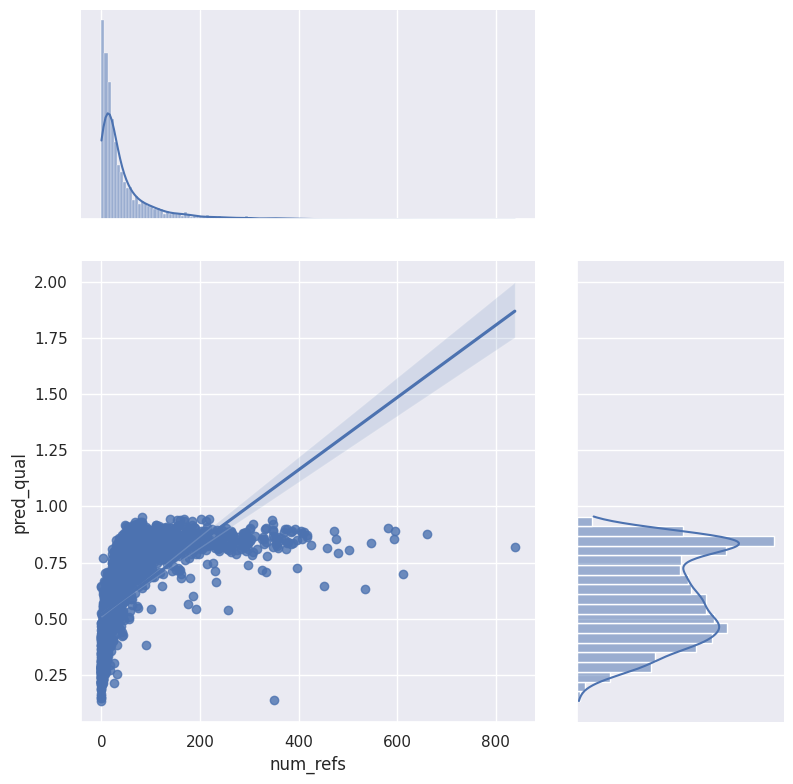

In [ ]:
sns.jointplot(data = df_num_refs_analysis, x = "num_refs", y = "pred_qual", kind = "reg", height = 8, ratio = 2)

<Axes: xlabel='num_refs', ylabel='pred_qual'>

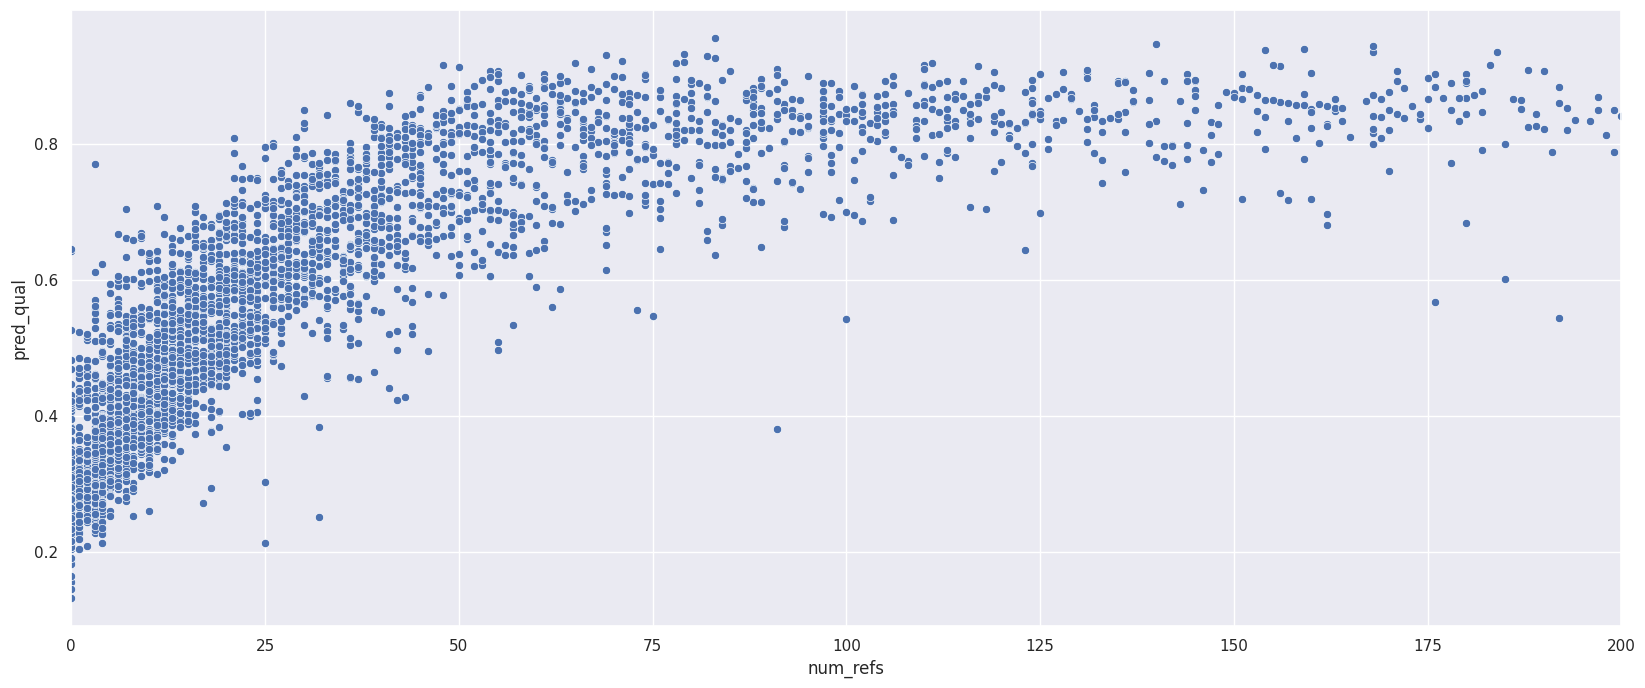

In [ ]:
# granularity  = years
# a scatter plot showing the relationship between pred_qual and num_refs with an xlim of (0, 200) for better
# visualization
plt.xlim(0, 200)
sns.scatterplot(data = df_num_refs_analysis, x = "num_refs", y = "pred_qual")

                  ###### Plot of num_refs and pred_qual over a granularity of months

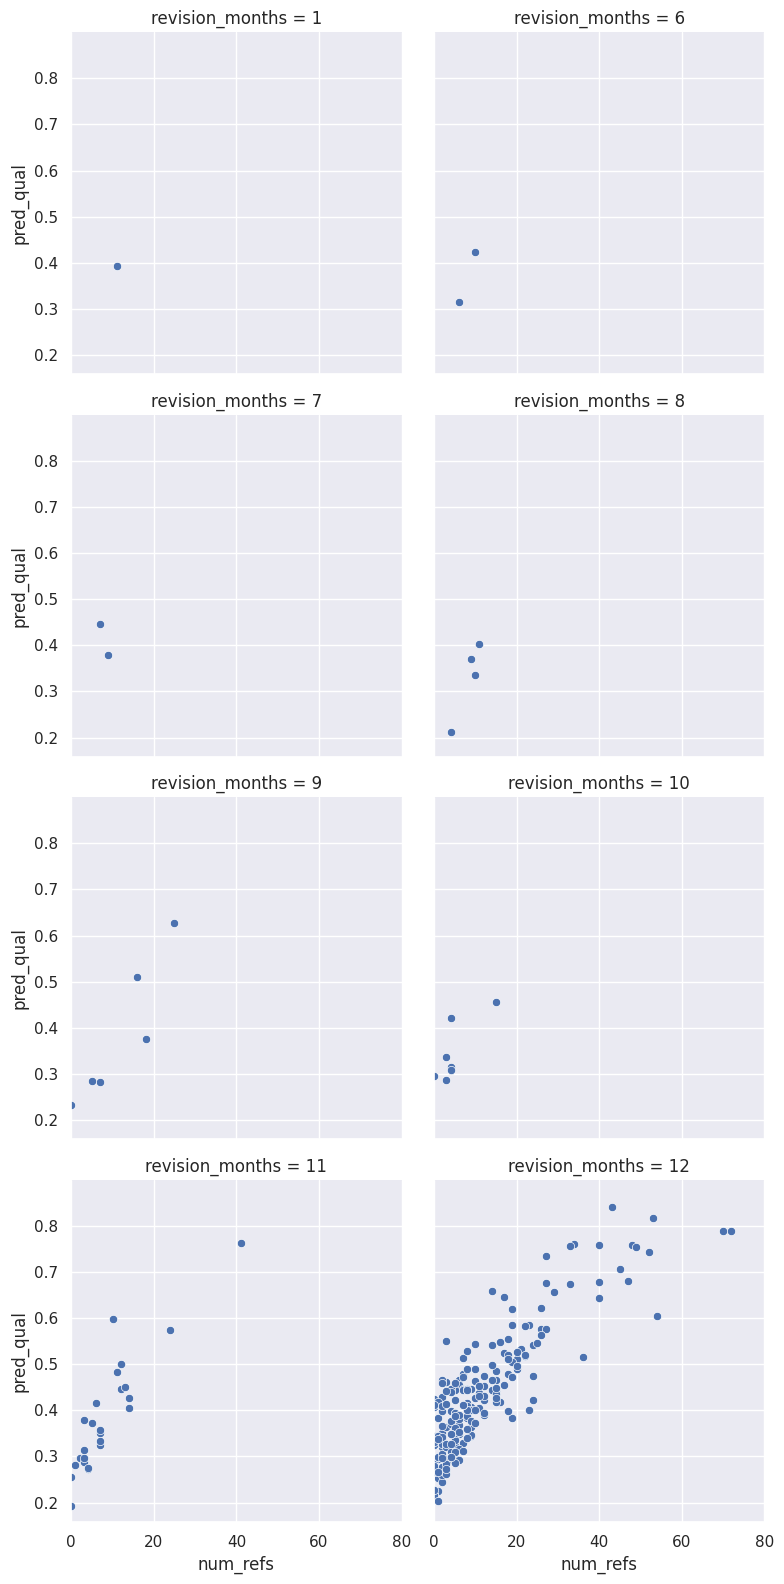

In [ ]:
# scatter plots of num_refs and pred_qual on a monthly granularity
# take a smaple year  = 2021
g = sns.FacetGrid(data =df_num_refs_analysis.loc[df_num_refs_analysis.revision_year == 2021], col = "revision_months", height = 4, aspect = 1, col_wrap = 2)
g.set(xlim = (0, 80)) #sets an xlim to get better visualization
g.map(sns.scatterplot, "num_refs", "pred_qual")

###### Plots of max num_refs and quality class over a yearly granularity

<Axes: xlabel='quality_class', ylabel='num_refs'>

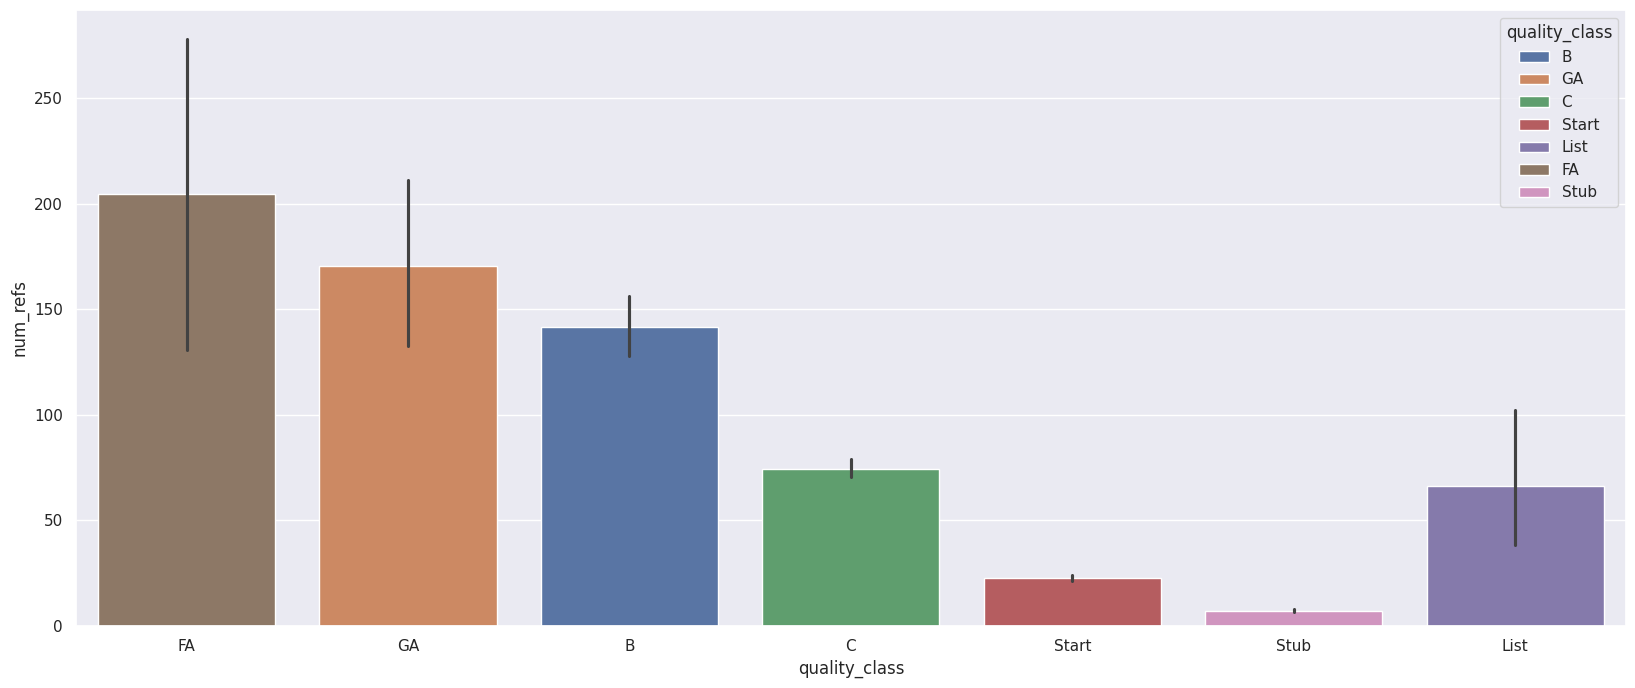

In [ ]:
# a barplot of quality class and num_refs
# uses an estimator of mean
sns.barplot(data = df_num_refs_analysis, x = "quality_class", y = "num_refs", order = bar_plot_order_quality_class, hue = "quality_class")

<Axes: xlabel='quality_class', ylabel='num_refs'>

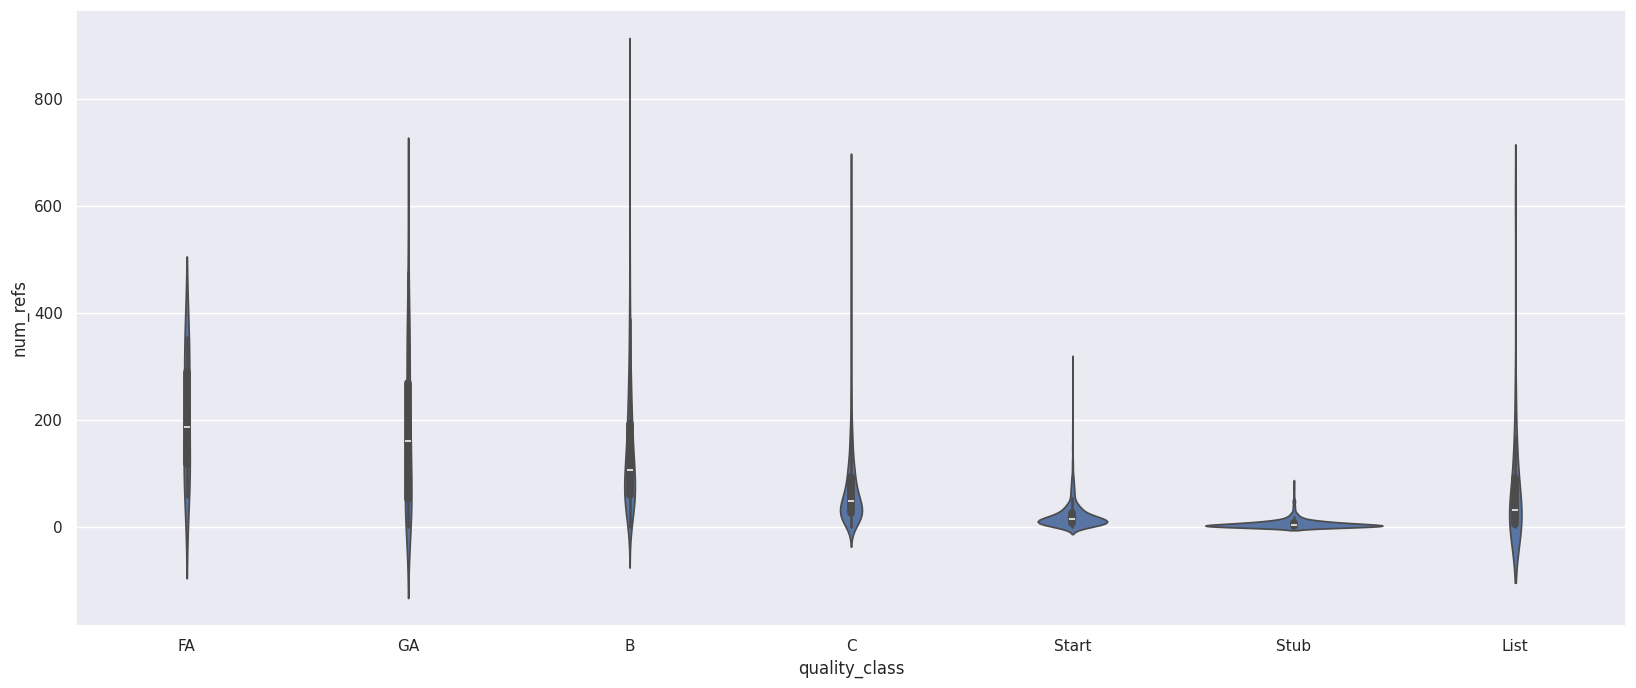

In [ ]:
sns.violinplot(data = df_num_refs_analysis, x = "quality_class", y = "num_refs", order = bar_plot_order_quality_class)

<Axes: xlabel='quality_class', ylabel='num_refs'>

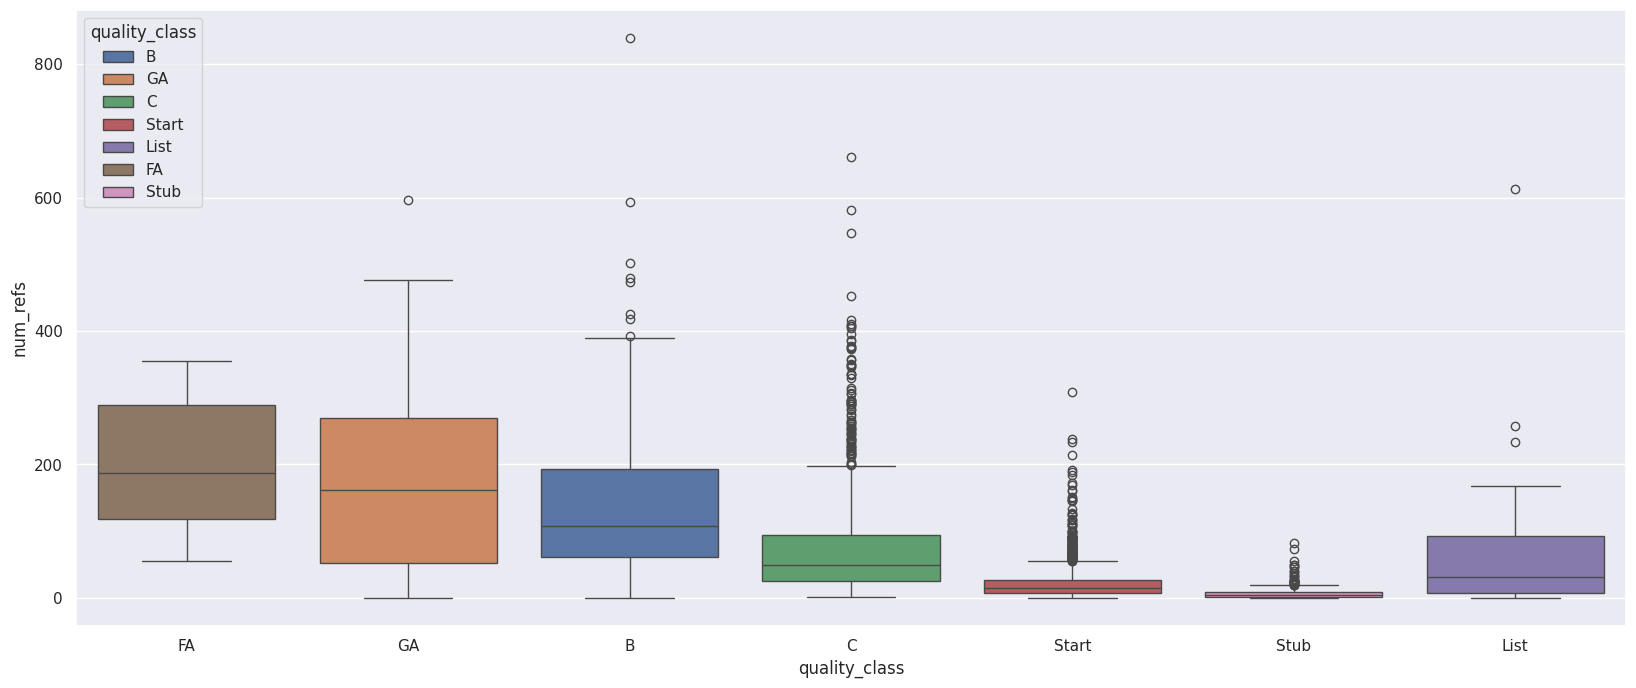

In [ ]:
# boxplot of num_refs and quality class over a granularity of years
sns.boxplot(data = df_num_refs_analysis, x = "quality_class", y = "num_refs", order = bar_plot_order_quality_class, hue = "quality_class")

###### Plots of max num_refs and quality class over a granularity of months

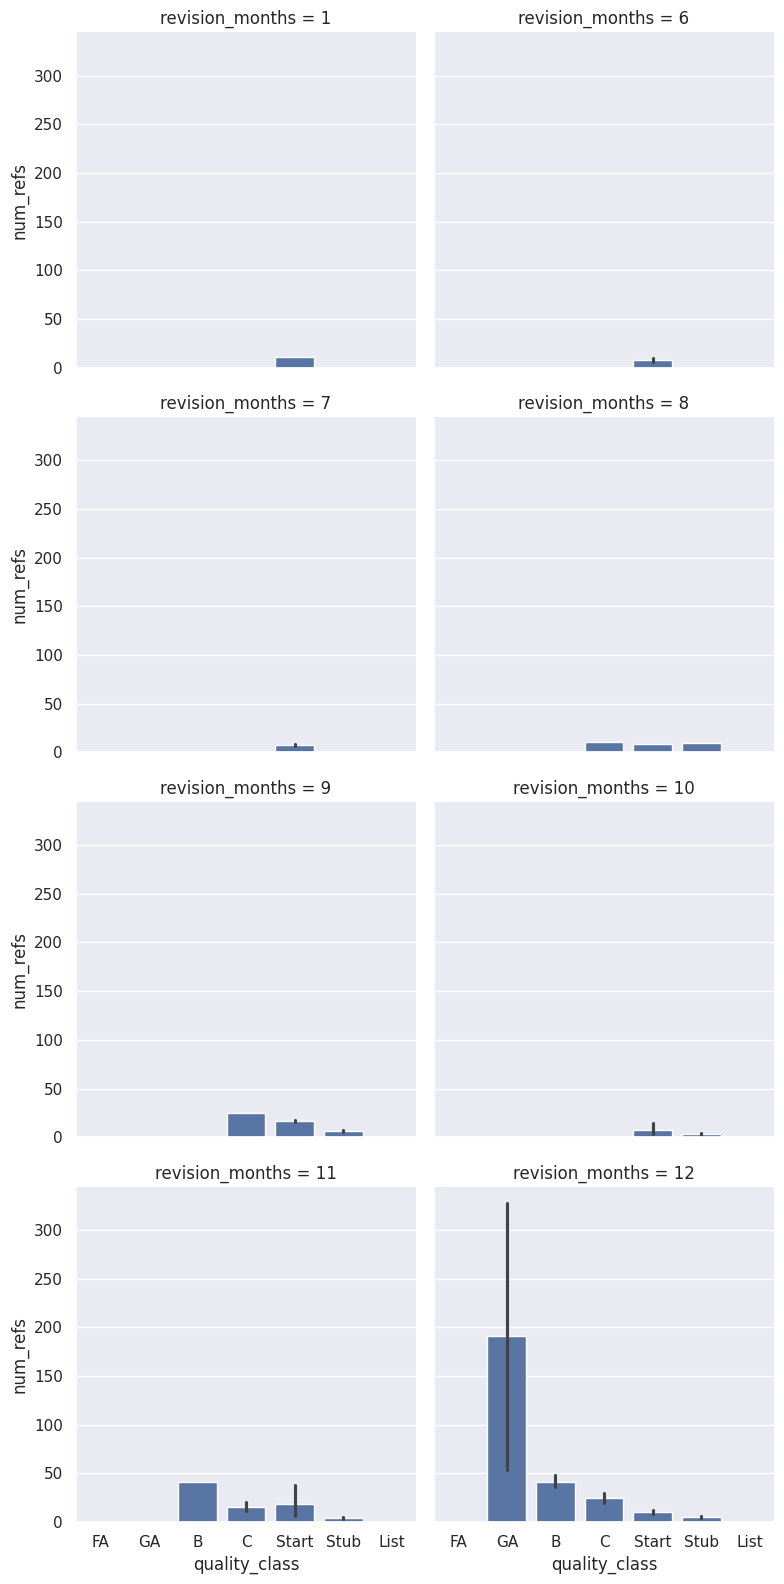

In [ ]:
# quality class and num_refs over a granularity of monthly
# pick a sample year of 2021
g = sns.FacetGrid(data =df_num_refs_analysis.loc[df_num_refs_analysis.revision_year == 2021], col = "revision_months", height = 4, aspect = 1, col_wrap = 2)
g.map(sns.barplot, "quality_class", "num_refs", order = bar_plot_order_quality_class)

##### Plots of max num_refs and importance class over a granularity of yearly

<Axes: xlabel='importance_class', ylabel='num_refs'>

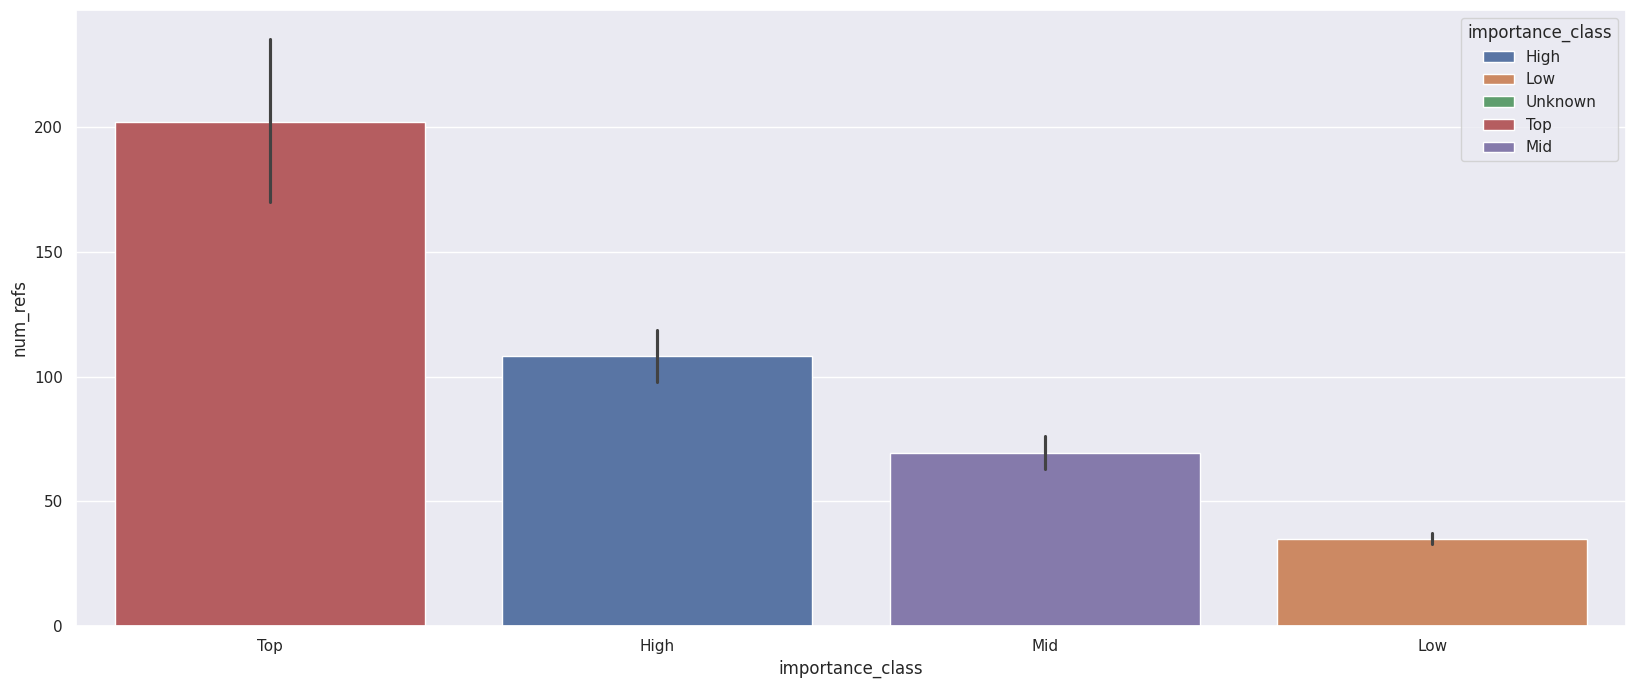

In [ ]:
# bar plot showing relationship between pred_qual and importance_class
sns.barplot(data = df_num_refs_analysis, x = "importance_class", y = "num_refs", order = bar_plot_order_importance_class, hue = "importance_class")

<Axes: xlabel='importance_class', ylabel='num_refs'>

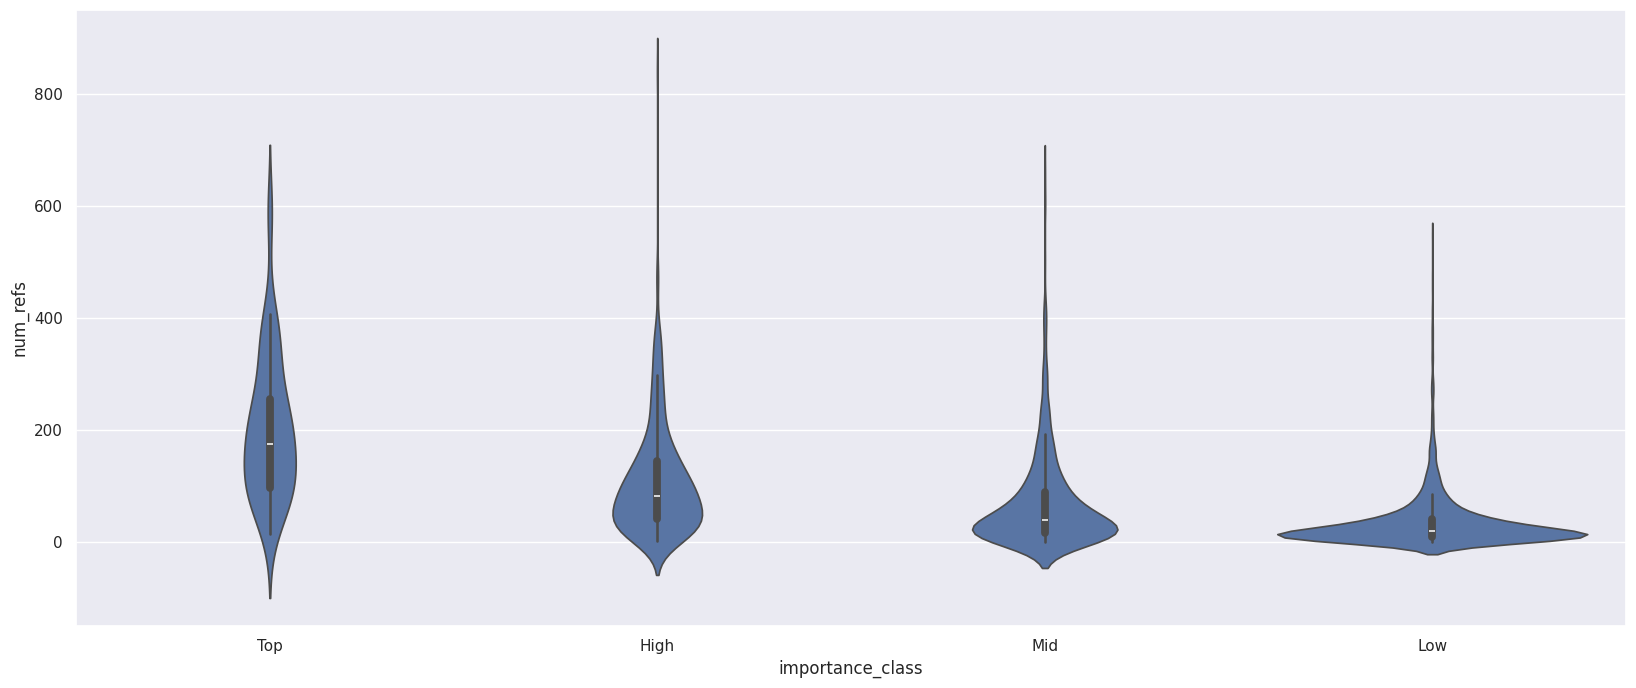

In [ ]:
# box plot over a granularity of years
sns.violinplot(data = df_num_refs_analysis, x = "importance_class", y = "num_refs", order = bar_plot_order_importance_class)

###### Plots of num_refs and importance class over a granularity of months

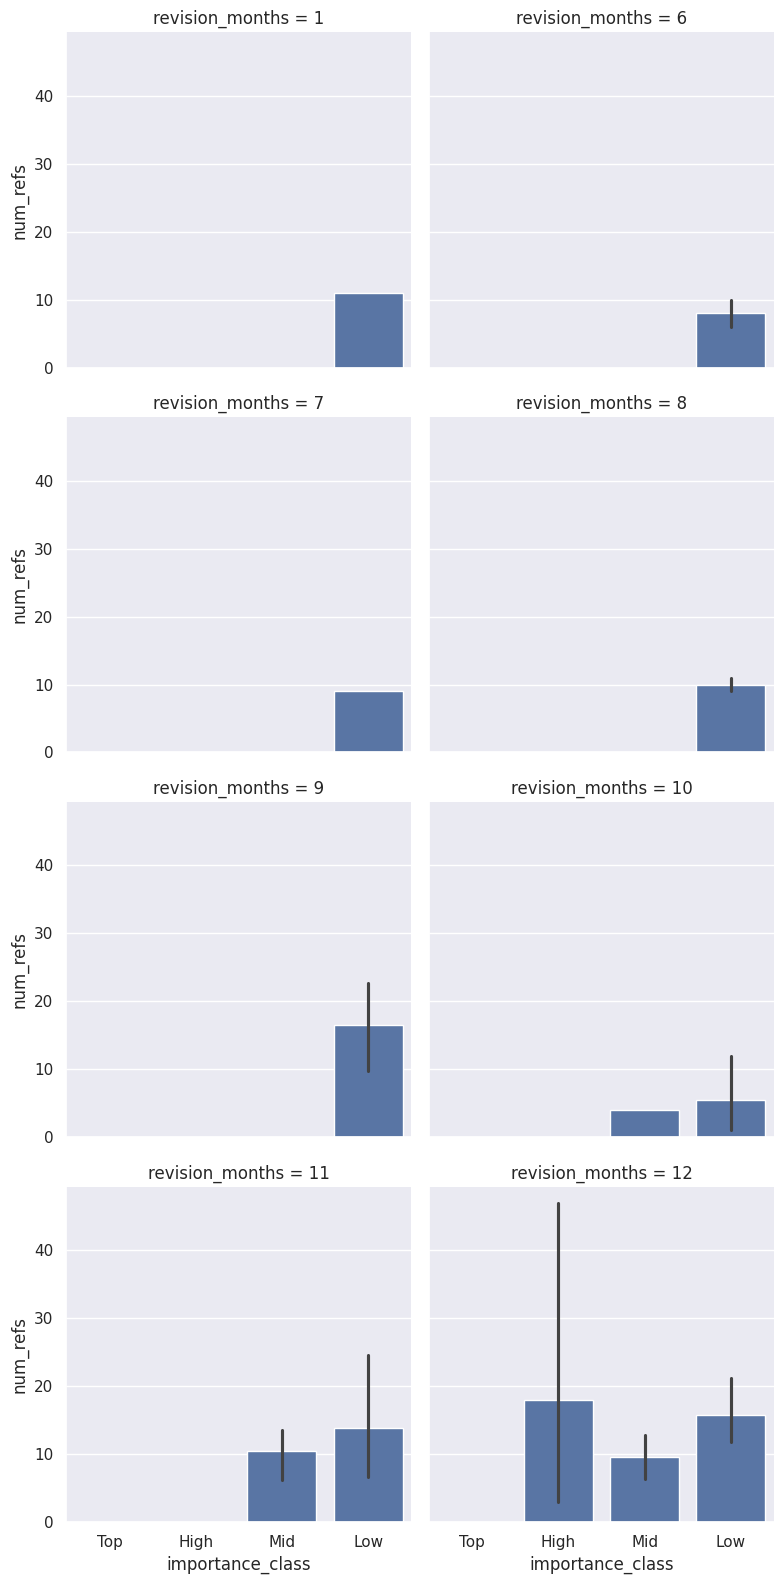

In [ ]:
# importance and num_refs over a granularity of monthly
# pick a sample year of 2021
g = sns.FacetGrid(data =df_num_refs_analysis.loc[df_num_refs_analysis.revision_year == 2021], col = "revision_months", height = 4, aspect = 1, col_wrap = 2)
g.map(sns.barplot, "importance_class", "num_refs", order = bar_plot_order_importance_class)

###### Observations
1. The higher the num_refs the greater the predicted quality of the article.
2. Articles which are of the least quality (Stubs) have num_refs of less than or equal to 10.
3. Articles with higher quality class and importance class have a greater median value of num_refs.

###### Tradeoffs between shorter and longer granularities
1. Scatter Plot (num_refs and pred_qual)
 - Shorter granularity plots have less variation compared to longer granularity plots. Both sets of plots are steep and show that an inrease in num_refs leads to an increase in pred_qual.
2. Barplot and ViolinPlot (num_refs and quality_class)
 - Shorter granularities show more variation compared to longer granularities. This is mainly because certain quality classes and more so the top classes (FA, GA, and B) are underepresented in shorter periods. In the barplots where there is an almost sufficient amount of data, the plots begin to look like the plot showing distribution of quality class for the entire revision period.
3. Barplot and Boxplot (num_refs and importance_class)
- Shorter granularities also show more variation compared to longer granularities. This is mainly because there is underepresentation of certain importance classes and more so the highest classes such as Top and High.

###### Aggregation and Filtering
- The max value of num_refs per article was selected for this analysis because it is a single point that can give the best insight into the relationships being investigated.
- A scatter plot and two bar plots were used because of the qualitative and quantitative variable pair relationships observed.

## G. Relationship between (pred_qual and num_wikilinks) (quality_score and num_wikilinks) (importance class and num_wikilinks)

In [ ]:
# here we get the maximum num_refs per article id irrespective of the revision date it was made
df_num_wikilinks_analysis = df_revisions.loc[:, ["page_id", "num_wikilinks", "revision_id", "quality_class", "importance_class", "revision_year", "revision_months"]].groupby("page_id").max()
df_num_wikilinks_analysis

num_wikilinks  revision_id quality_class importance_class  \
page_id                                                               
39                  143   1127470765             B             High   
627                3188   1122142578            GA              Low   
903                  77   1124952523             C              Low   
1365                689   1130090281             B              Low   
3201                278   1126273383             B             High   
...                 ...          ...           ...              ...   
72569668             21   1130664066             C              Low   
72596935              5   1130388362             C              Low   
72598169             16   1130644028             C              Low   
72613949             36   1130613139         Start              Low   
72624020             11   1130730324         Start              Mid   

          revision_year  revision_months  
page_id                                   
39                 2022               12  
627                2022               12  
903                2022               12  
1365               2022               12  
3201               2022               12  
...                 ...              ...  
72569668           2022               12  
72596935           2022               12  
72598169           2022               12  
72613949           2022               12  
72624020           2022               12  

[3642 rows x 6 columns]

In [ ]:
# pred_qual_values - a variable created in the first analysis that holds the revision id and pred qual of all articles
df_num_wikilinks_analysis = df_num_wikilinks_analysis.merge(pred_qual_values, left_on = "revision_id", right_on = "revision_id")
#we use the merge function to combine our dataframes thus getting the pred_qual values
df_num_wikilinks_analysis

num_wikilinks revision_id quality_class importance_class  revision_year  \
0               143  1127470765             B             High           2022   
1              3188  1122142578            GA              Low           2022   
2                77  1124952523             C              Low           2022   
3               689  1130090281             B              Low           2022   
4               278  1126273383             B             High           2022   
...             ...         ...           ...              ...            ...   
3637             21  1130664066             C              Low           2022   
3638              5  1130388362             C              Low           2022   
3639             16  1130644028             C              Low           2022   
3640             36  1130613139         Start              Low           2022   
3641             11  1130730324         Start              Mid           2022   

      revision_months  pred_qual  
0                  12   0.881909  
1                  12   0.854619  
2                  12   0.581719  
3                  12   0.945119  
4                  12   0.806806  
...               ...        ...  
3637               12   0.469029  
3638               12   0.458267  
3639               12   0.458552  
3640               12   0.384134  
3641               12   0.307534  

[3642 rows x 7 columns]

###### Plots of max num_wikilinks and pred_qual over a yearly granularity

<Axes: xlabel='num_wikilinks', ylabel='pred_qual'>

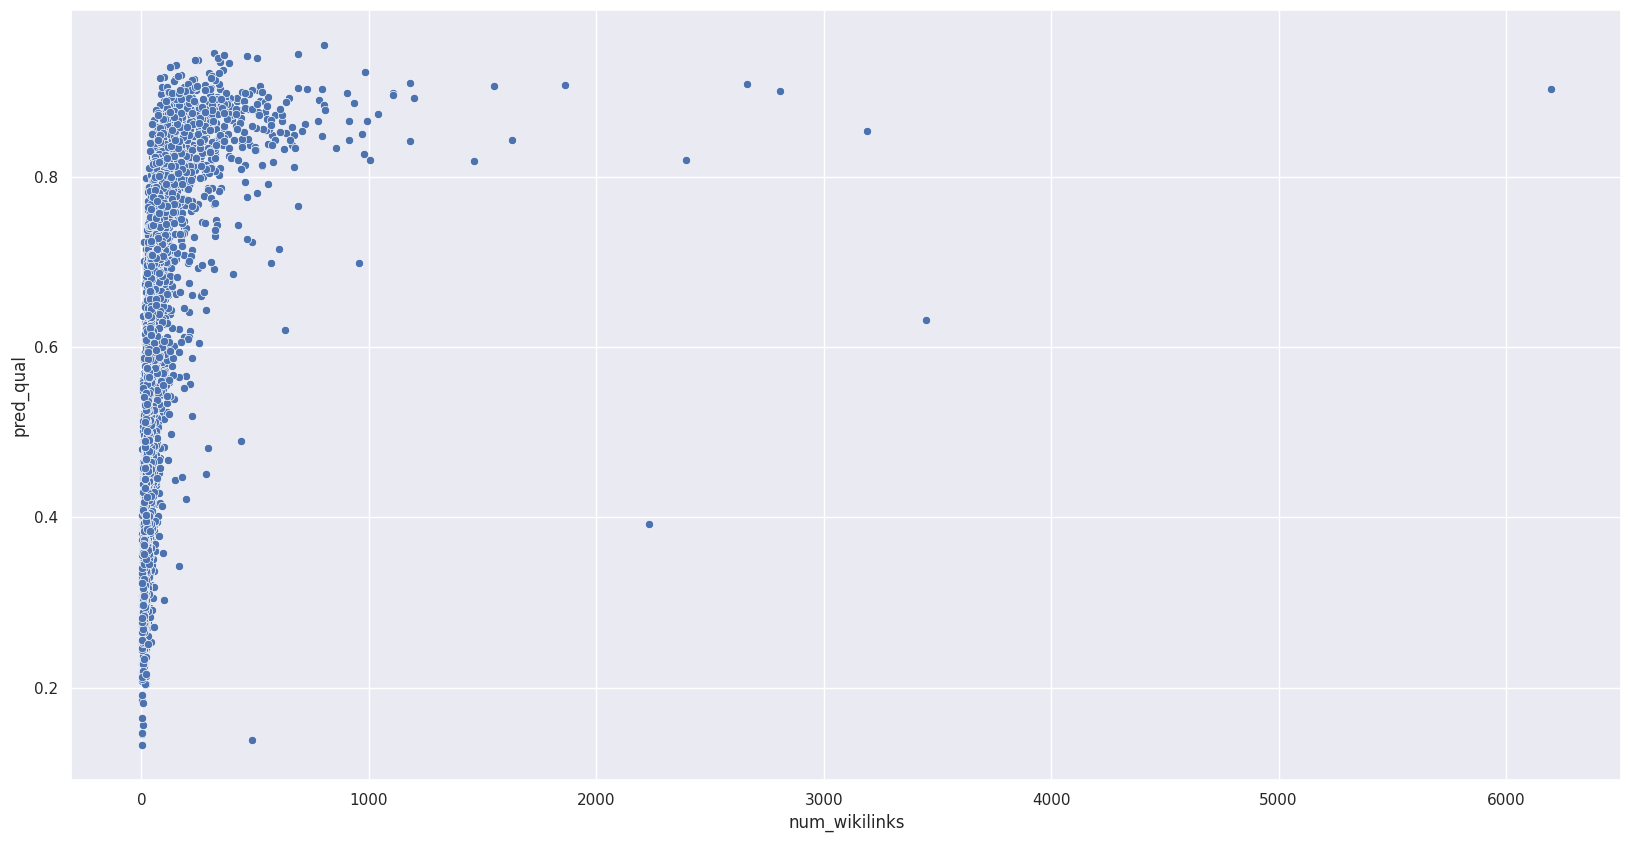

In [ ]:
# a scatter plot of num_wikilinks and pred_qual
fig = plt.subplots(figsize=(20, 10))
sns.scatterplot(data = df_num_wikilinks_analysis, x = "num_wikilinks", y = "pred_qual")

<Axes: xlabel='num_wikilinks', ylabel='pred_qual'>

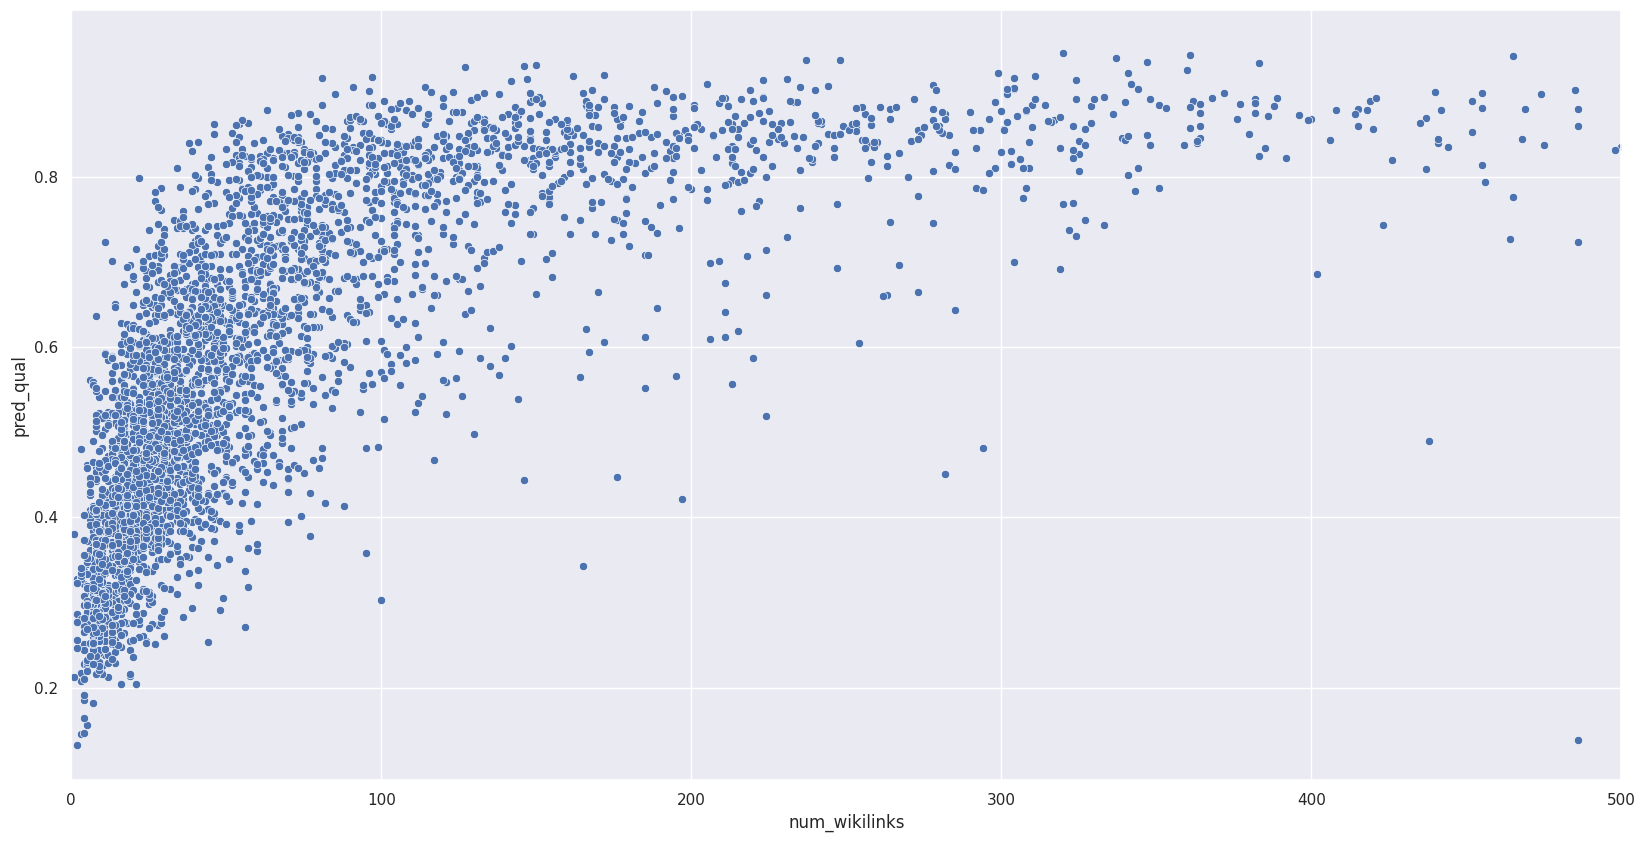

In [ ]:
# a scatter plot of num_wikilinks and pred_qual with an xlim applied for better visualization
fig = plt.subplots(figsize=(20, 10))
plt.xlim(0, 500)
sns.scatterplot(data = df_num_wikilinks_analysis, x = "num_wikilinks", y = "pred_qual")

###### Plots of num_wikilinks and pred_qual over a monthly granularity

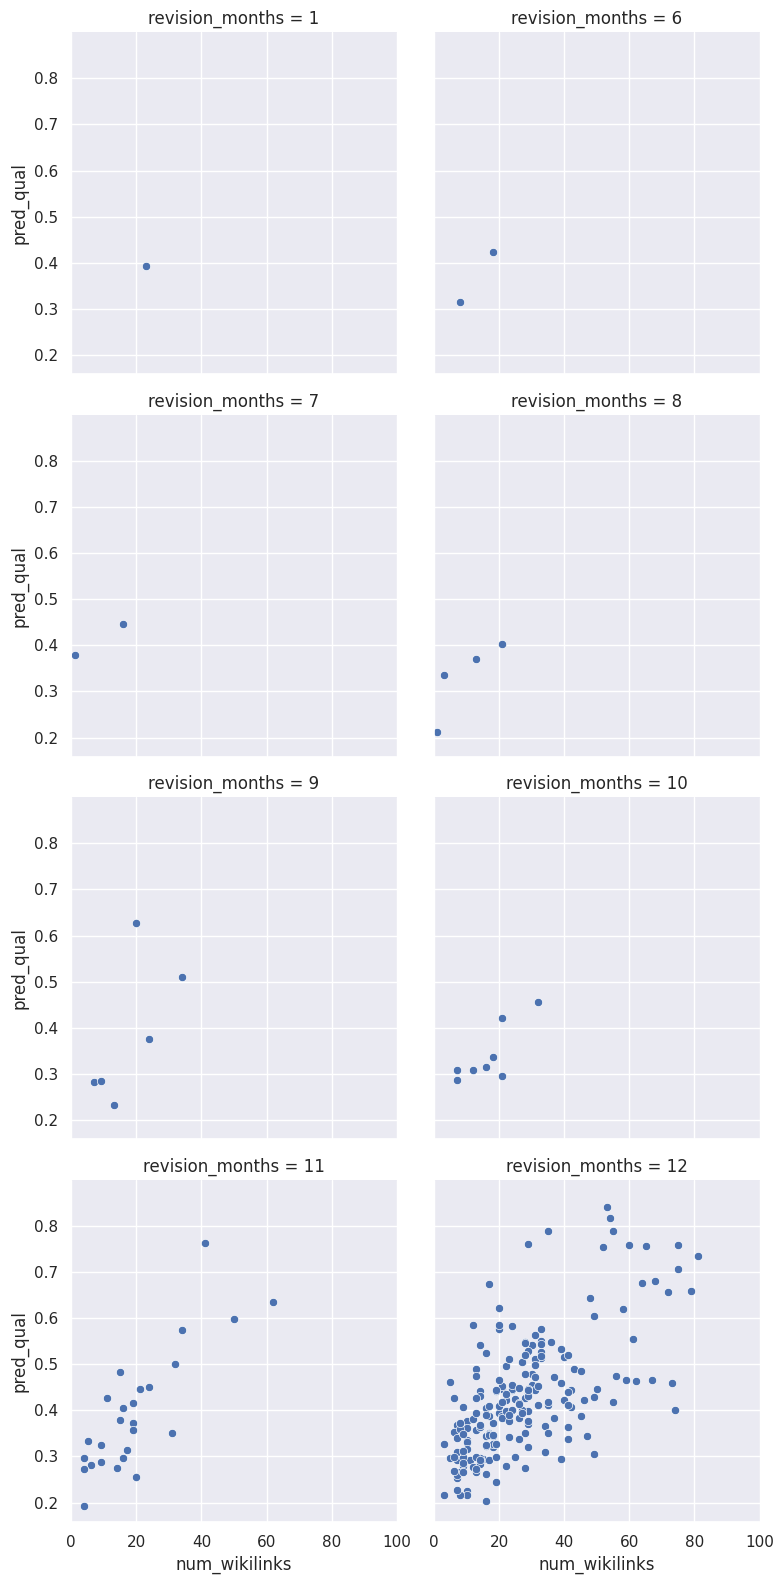

In [ ]:
# num_wikilinks and pred_qual over a granularity of monthly
# pick a sample year of 2021
g = sns.FacetGrid(data = df_num_wikilinks_analysis.loc[df_num_wikilinks_analysis.revision_year == 2021], col = "revision_months", height = 4, aspect = 1, col_wrap = 2)
g.set(xlim = (0, 100))
g.map(sns.scatterplot, "num_wikilinks", "pred_qual")

###### Plots of quality_class and num_wikilinks over a yearly granularity

<Axes: xlabel='quality_class', ylabel='num_wikilinks'>

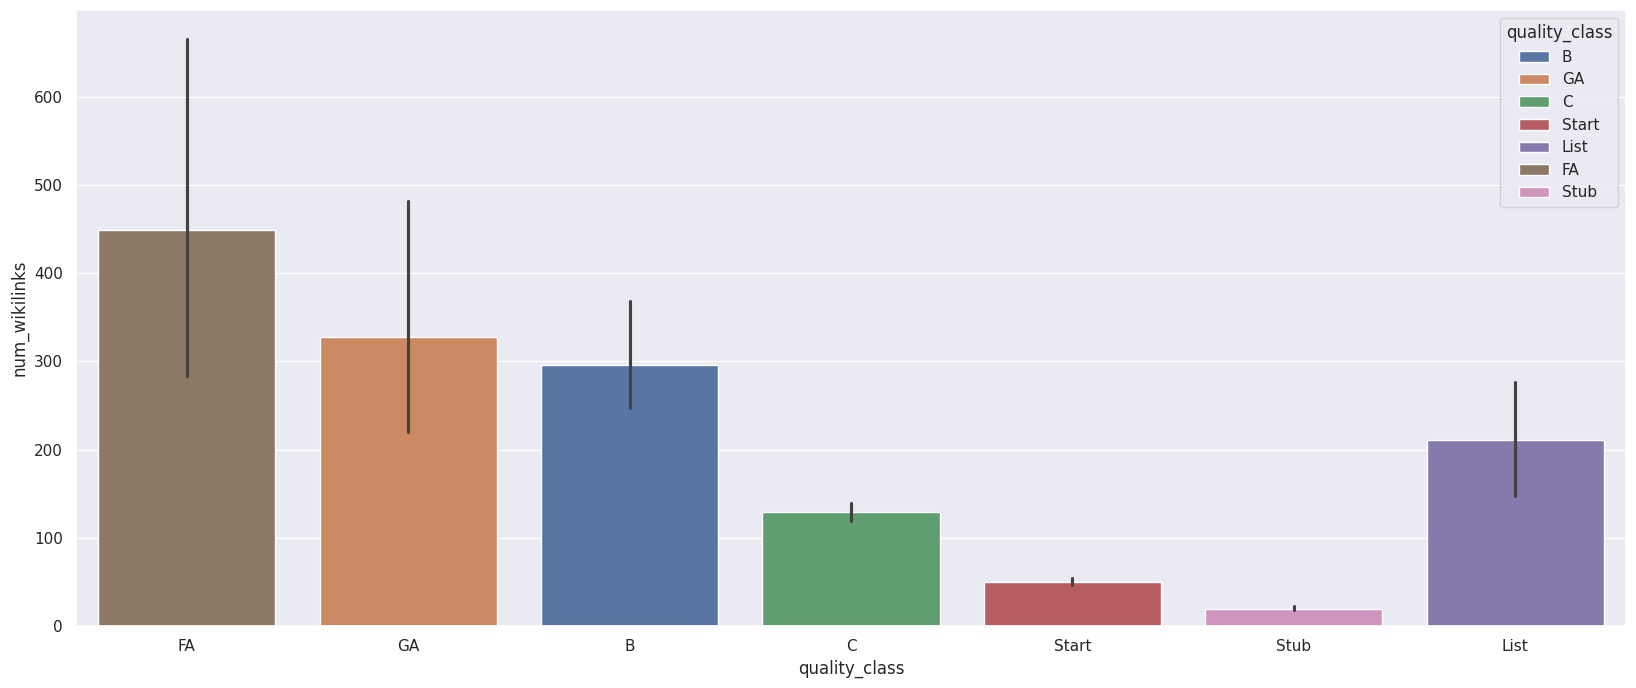

In [ ]:
# a bar plot of num_wikilinks and quality_class
sns.barplot(data = df_num_wikilinks_analysis, x = "quality_class", y = "num_wikilinks", order = bar_plot_order_quality_class, hue = "quality_class")

(0.0, 1000.0)

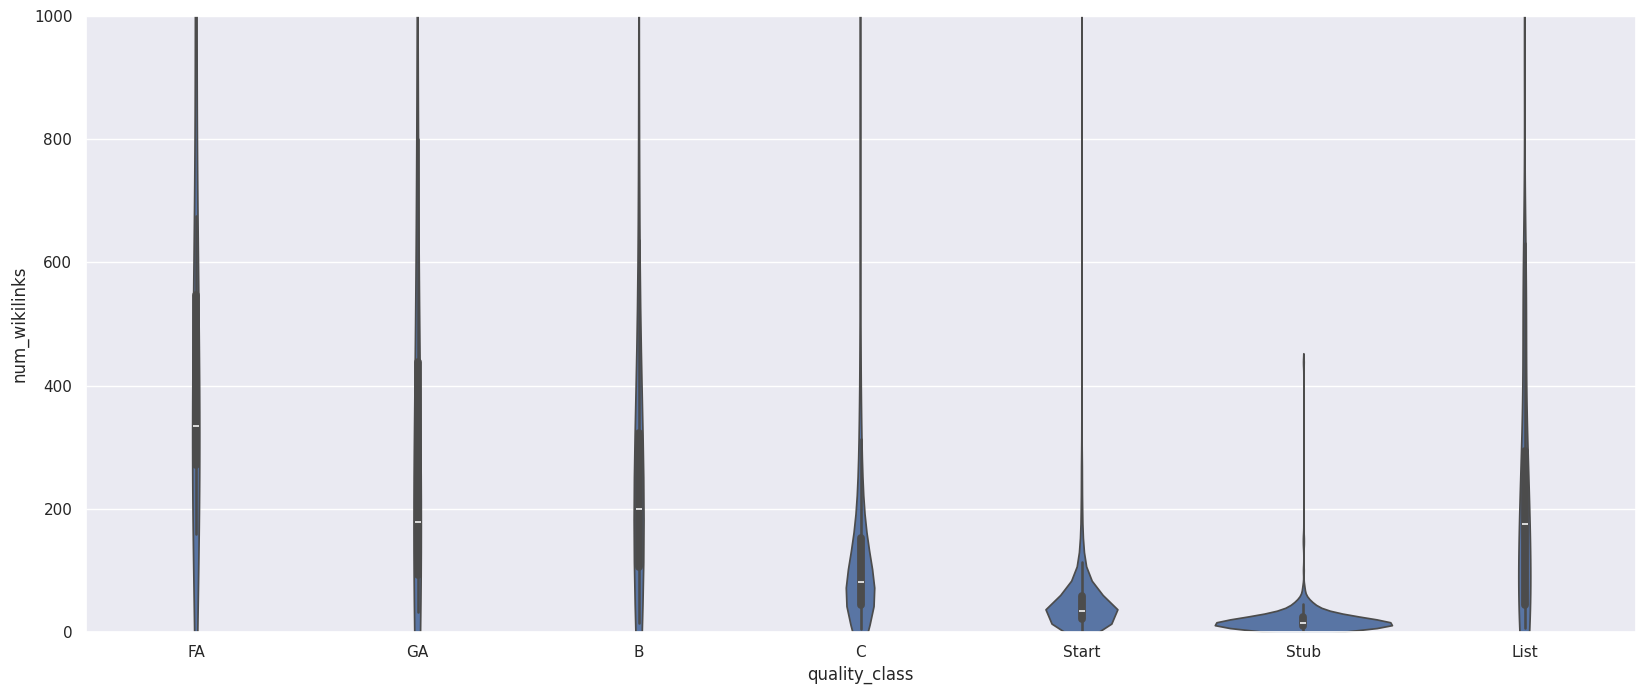

In [ ]:
# boxplot of quality class and num_wikilinks over a yearly granularity
sns.violinplot(data = df_num_wikilinks_analysis, x = "quality_class", y = "num_wikilinks", order = bar_plot_order_quality_class)
plt.ylim(0, 1000) #sets ylim because the upper tails of all classes are below 1000. Gives better visualization

(0.0, 1000.0)

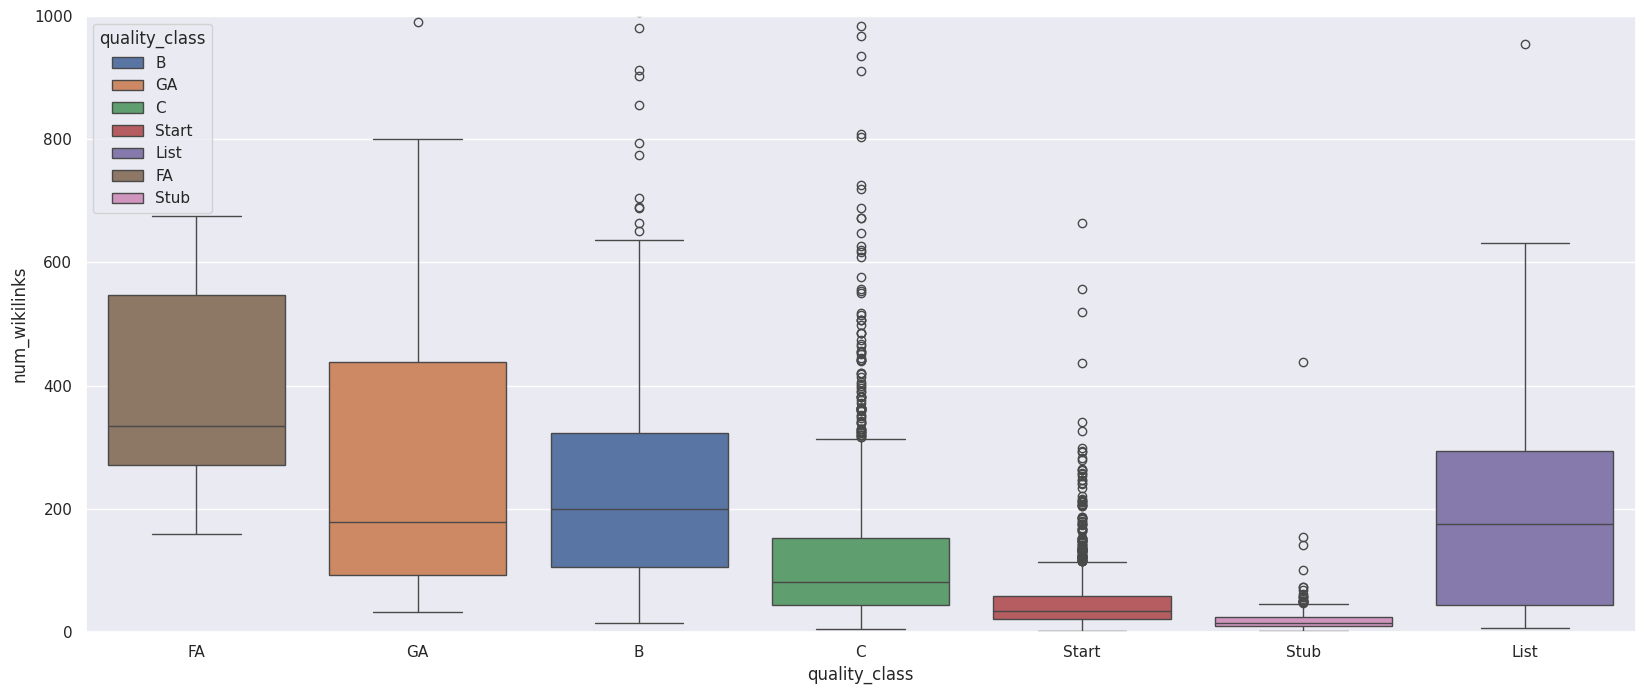

In [ ]:
sns.boxplot(data = df_num_wikilinks_analysis, x = "quality_class", y = "num_wikilinks", order = bar_plot_order_quality_class, hue = "quality_class")
plt.ylim(0, 1000) # sets ylim since the upper tails of all classes are below 1000

###### Plots of num_wikilinks and quality class over a granularity of months

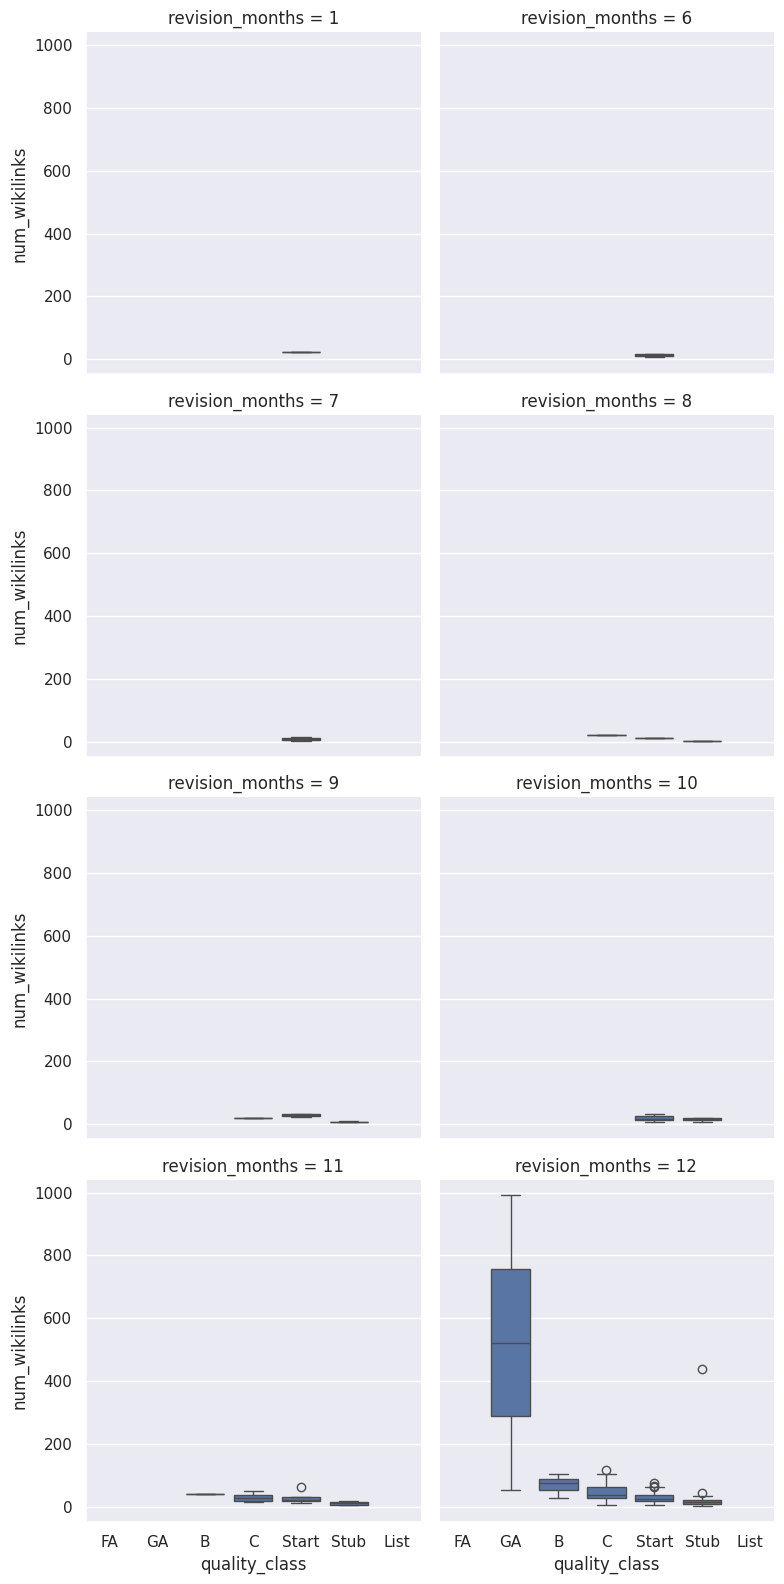

In [ ]:
# quality_class and num_wikilinks over a granularity of monthly
# pick a sample year of 2021
g = sns.FacetGrid(data =df_num_wikilinks_analysis.loc[df_num_wikilinks_analysis.revision_year == 2021], col = "revision_months", height = 4, aspect = 1, col_wrap = 2)
g.map(sns.boxplot, "quality_class", "num_wikilinks", order = bar_plot_order_quality_class)

###### Plots of num_wikilinks and importance class over yearly granularity

<Axes: xlabel='importance_class', ylabel='num_wikilinks'>

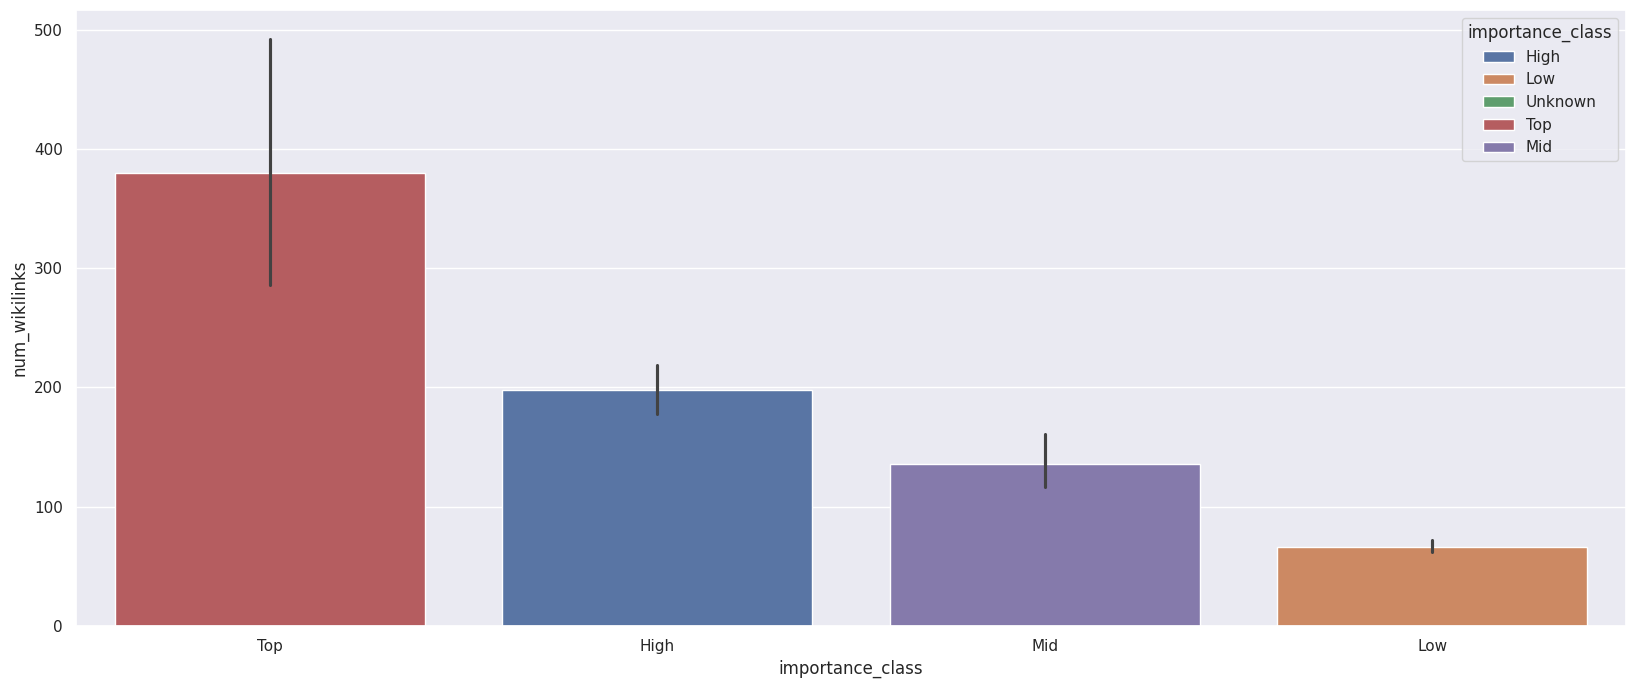

In [ ]:
# a barplot plot of num_wikilinks and importance_class
# fig = plt.subplots(figsize=(20, 10))
sns.barplot(data = df_num_wikilinks_analysis, y = "num_wikilinks", x = "importance_class", order = bar_plot_order_importance_class, hue = "importance_class")

<Axes: xlabel='importance_class', ylabel='num_wikilinks'>

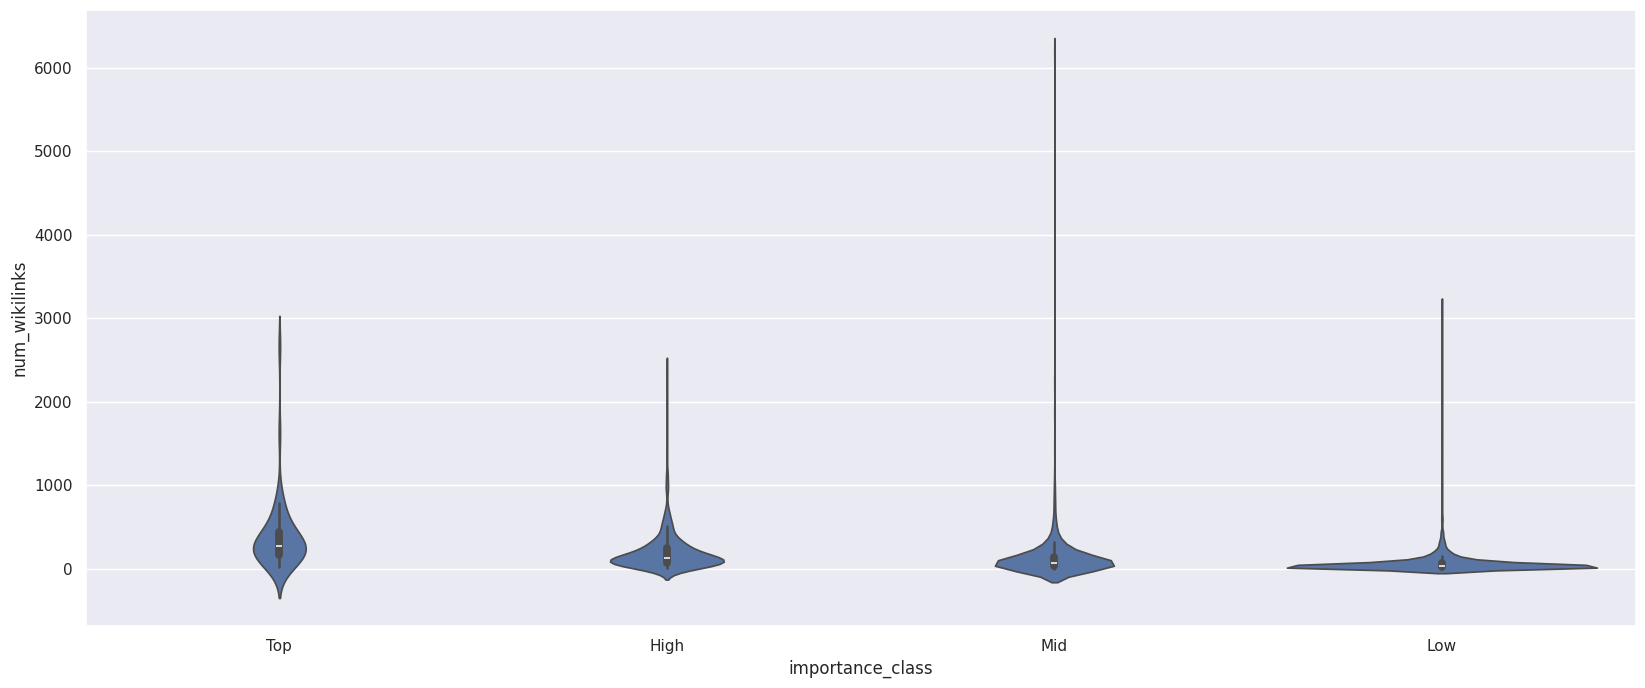

In [ ]:
sns.violinplot(data = df_num_wikilinks_analysis, x = "importance_class", y = "num_wikilinks", order = bar_plot_order_importance_class)

(0.0, 1000.0)

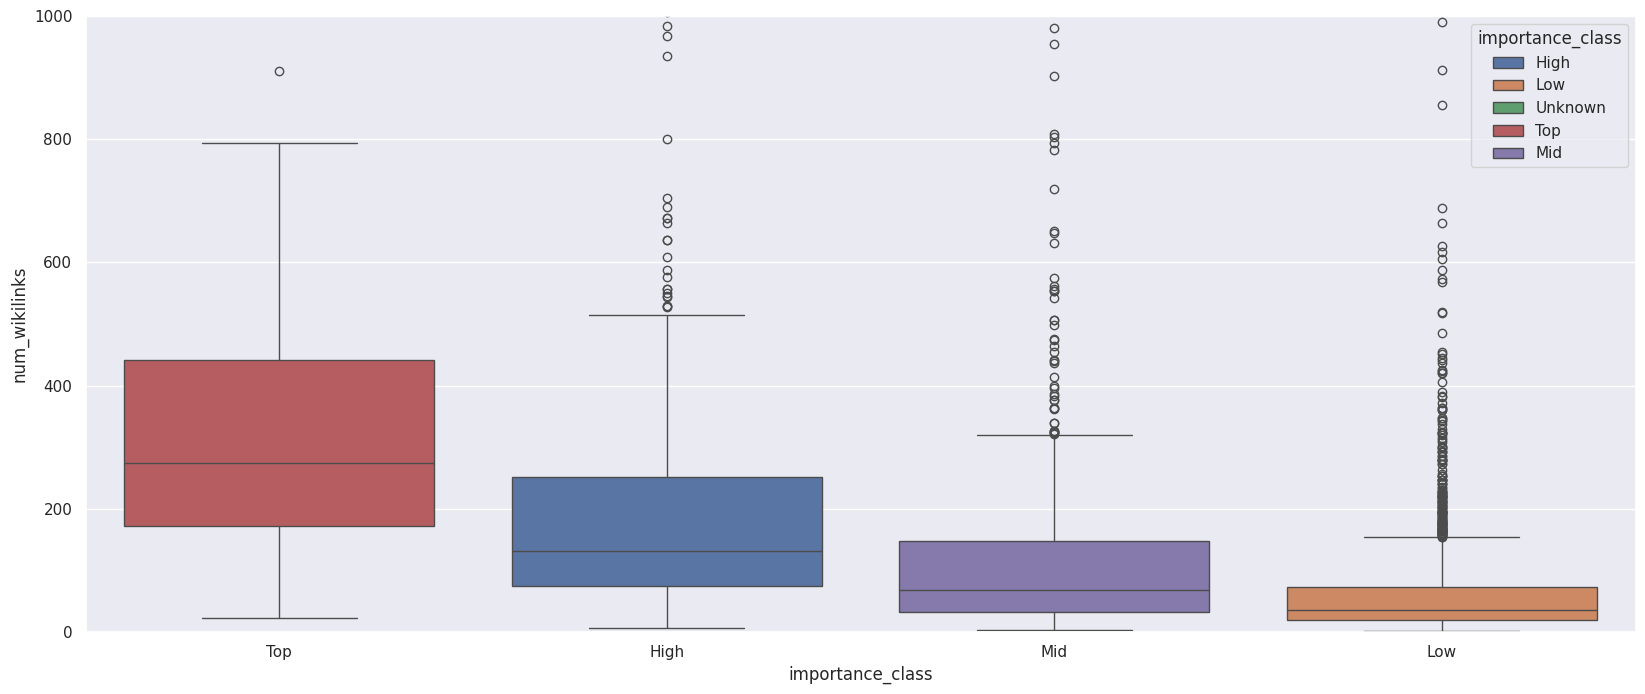

In [ ]:
sns.boxplot(data = df_num_wikilinks_analysis, x = "importance_class", y = "num_wikilinks", order = bar_plot_order_importance_class, hue = "importance_class")
plt.ylim(0, 1000) #sets y lim because the upper tails of boxplots are all below 1000

###### Plot of importance class and num_wikilinks over a monthly granularity

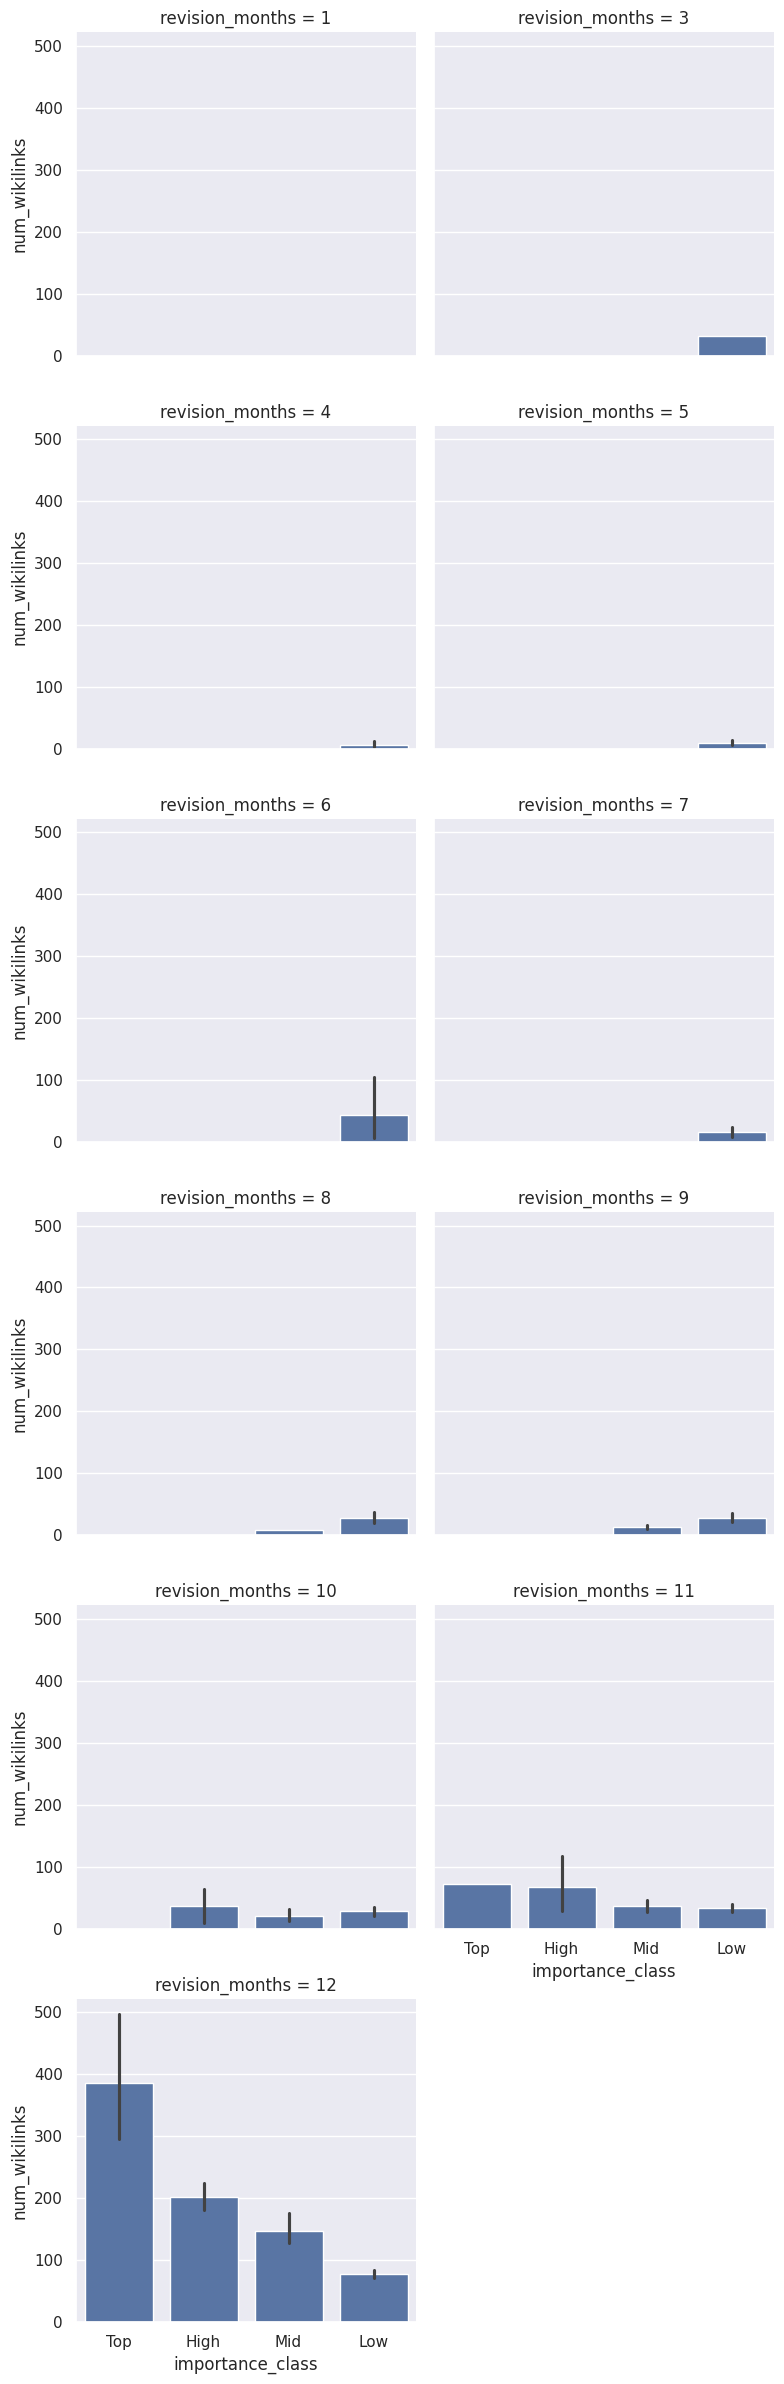

In [ ]:
# importance_class and num_wikilinks over a granularity of monthly
# pick a sample year of 2021
g = sns.FacetGrid(data =df_num_wikilinks_analysis.loc[df_num_wikilinks_analysis.revision_year == 2022], col = "revision_months", height = 4, aspect = 1, col_wrap = 2)
g.map(sns.barplot, "importance_class", "num_wikilinks", order = bar_plot_order_importance_class)

###### Observations
1. The greater the number of num_wikilinks the greater the value of pred_qual up to a certain point.
2. Articles which are of the least quality (Stubs) have num_wikilinks of less than or equal to 10.
3. Articles with a a higher quality and importance class have a greater median value of num_wikilinks.

###### Tradeoffs between shorter and longer granularities
1. Scatter plot (num_wikilinks and pred_qual)
- There is little variation between the scatter plot with a longer granularity and the one with a shorter granularity. Both scatter plots support the relationship that an increase in num_wikilinks is correlated with an increase in pred_qual up to a certain point.
2. Boxplot and Barplot (num_wikilinks and quality_class)
- There is variation in shorter granularity plots because of the inadequacy of data. For certain classes and more so the top classes there is no representation in the monthtly granularity plots.
- For sample periods where there is enough data, the plots begin to resemble the plots from longer granularities.
3. Boxplot and Barplot (num_wikilinks and importance_class)
- There is also variation in shorter granularity plots because of the inadequacy of data. For certain importance classes and more so the top classes there is no representation in the monthtly granularity plots.
- For sample periods where there is enough data, the plots begin to resemble the plots from longer granularities.

###### Filters and Aggregation
- The max number of wikilinks was selected from every article to carry out this analysis. This is because the hypothesis being tested is that the more num_wikilinks the higher the quality scores (pred qual, importance class and quality class)
- Due to the qualitative and quantitative nature of variable pairs, either a scatter plot or a barplot was used

## H. Relationship between (num_media and pred_qual) (num_media and quality_class) (num_media and importance_class) over different granularities

In [ ]:
# here we get the maximum values of num_media for each page_id.
# the revision_id will be used to merge with the respective pred_qual valies in the original df_revisions
df_num_media_analysis = df_revisions.loc[:, ["page_id", "num_media", "revision_id", "quality_class", "importance_class", "revision_months", "revision_year"]].groupby("page_id").max()
df_num_media_analysis

num_media  revision_id quality_class importance_class  \
page_id                                                           
39                6   1127470765             B             High   
627              29   1122142578            GA              Low   
903               8   1124952523             C              Low   
1365             21   1130090281             B              Low   
3201             27   1126273383             B             High   
...             ...          ...           ...              ...   
72569668          0   1130664066             C              Low   
72596935          2   1130388362             C              Low   
72598169          0   1130644028             C              Low   
72613949          0   1130613139         Start              Low   
72624020          0   1130730324         Start              Mid   

          revision_months  revision_year  
page_id                                   
39                     12           2022  
627                    12           2022  
903                    12           2022  
1365                   12           2022  
3201                   12           2022  
...                   ...            ...  
72569668               12           2022  
72596935               12           2022  
72598169               12           2022  
72613949               12           2022  
72624020               12           2022  

[3642 rows x 6 columns]

In [ ]:
# pred_qual_values - a variable created in the first analysis that holds the revision id and pred qual of all articles
df_num_media_analysis = df_num_media_analysis.merge(pred_qual_values, left_on = "revision_id", right_on = "revision_id")
#we use the merge function to combine our dataframes thus getting the pred_qual values
df_num_media_analysis

num_media revision_id quality_class importance_class  revision_months  \
0             6  1127470765             B             High               12   
1            29  1122142578            GA              Low               12   
2             8  1124952523             C              Low               12   
3            21  1130090281             B              Low               12   
4            27  1126273383             B             High               12   
...         ...         ...           ...              ...              ...   
3637          0  1130664066             C              Low               12   
3638          2  1130388362             C              Low               12   
3639          0  1130644028             C              Low               12   
3640          0  1130613139         Start              Low               12   
3641          0  1130730324         Start              Mid               12   

      revision_year  pred_qual  
0              2022   0.881909  
1              2022   0.854619  
2              2022   0.581719  
3              2022   0.945119  
4              2022   0.806806  
...             ...        ...  
3637           2022   0.469029  
3638           2022   0.458267  
3639           2022   0.458552  
3640           2022   0.384134  
3641           2022   0.307534  

[3642 rows x 7 columns]

###### Plots of num_media and pred_qual over a yearly granularity

<Axes: xlabel='num_media', ylabel='pred_qual'>

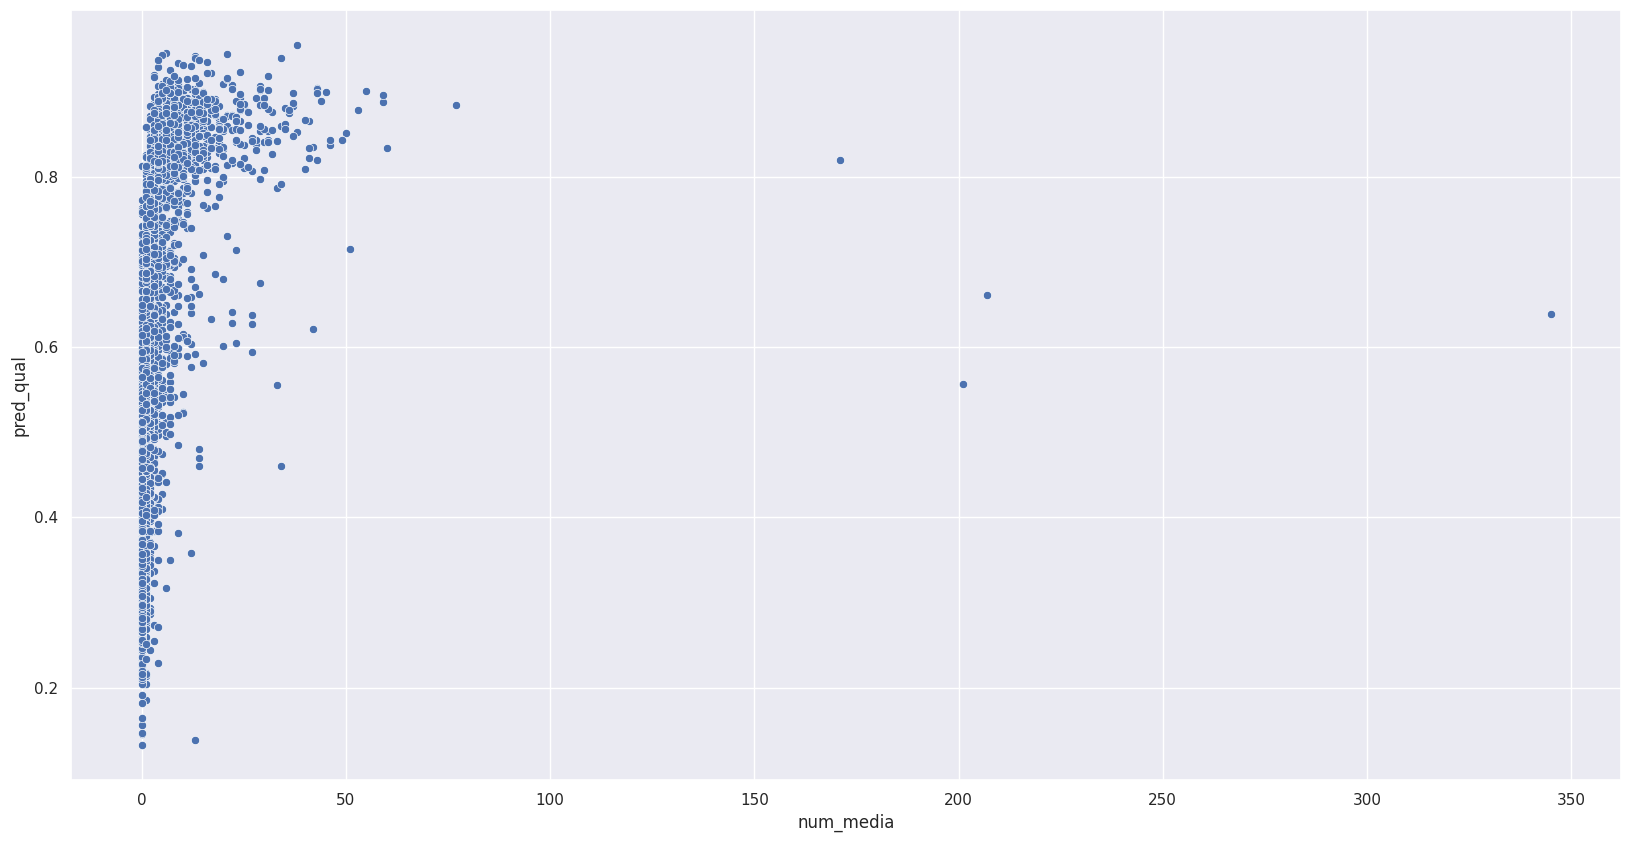

In [ ]:
# a scatterplot for num_media and pred_qual
fig = plt.subplots(figsize=(20, 10))
sns.scatterplot(data = df_num_media_analysis, x = "num_media", y = "pred_qual")

<Axes: xlabel='num_media', ylabel='pred_qual'>

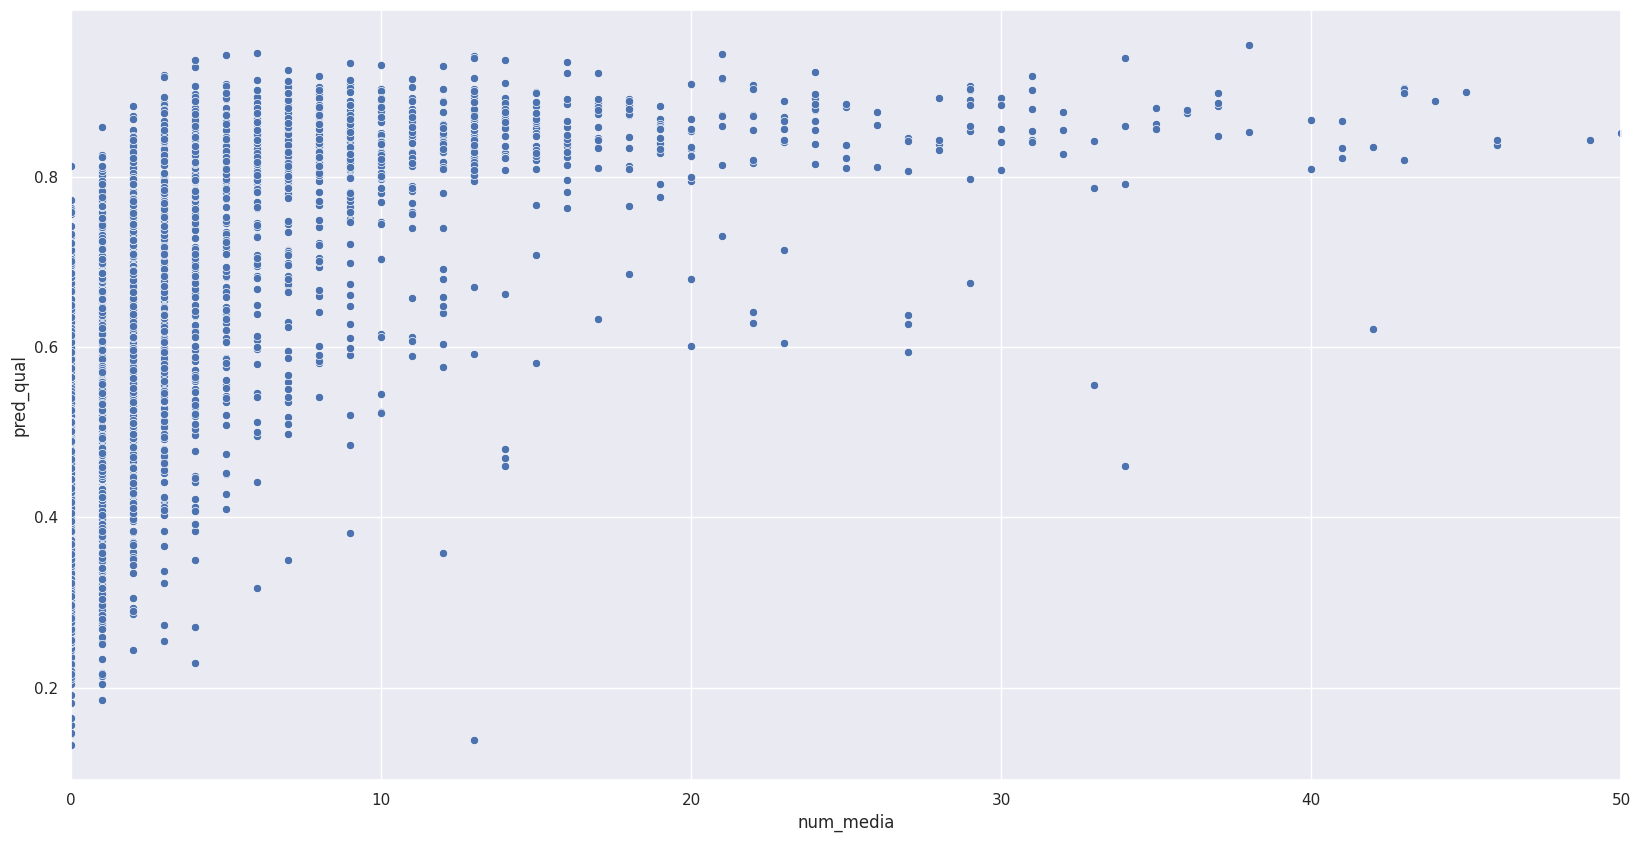

In [ ]:
# a scatterplot for num_media and pred_qual with an xlim for better analyis
fig = plt.subplots(figsize=(20, 10))
plt.xlim(0, 50)
sns.scatterplot(data = df_num_media_analysis, x = "num_media", y = "pred_qual")

##### Plots of num_media and pred_qual over a monthly granularity

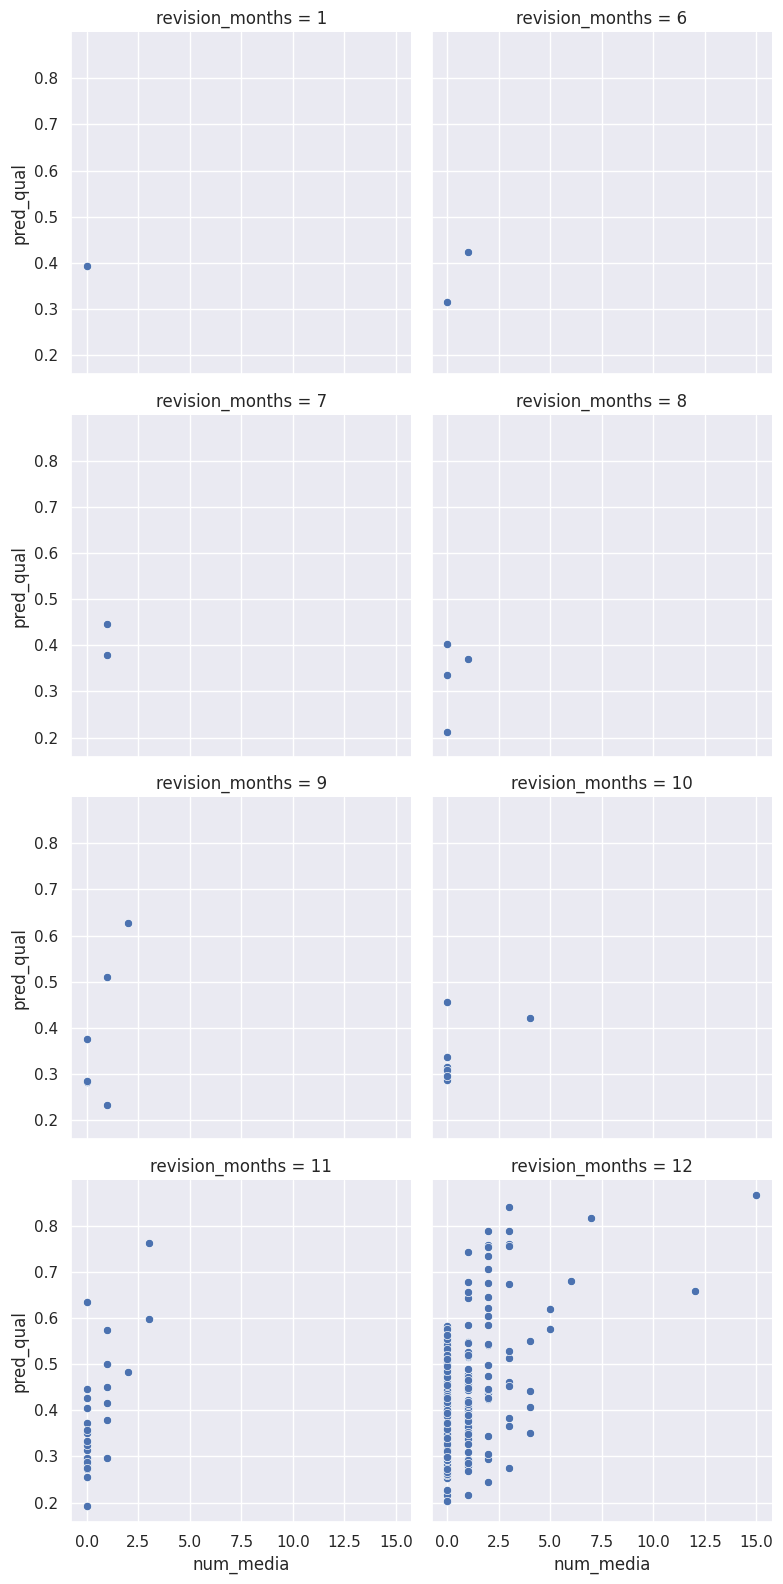

In [ ]:
# num_media and pred_qual over a granularity of monthly
# pick a sample year of 2021
g = sns.FacetGrid(data = df_num_media_analysis.loc[df_num_media_analysis.revision_year == 2021], col = "revision_months", height = 4, aspect = 1, col_wrap = 2)
g.map(sns.scatterplot, "num_media", "pred_qual")

###### Plots of num_media and quality class over a granularity of years

<Axes: xlabel='quality_class', ylabel='num_media'>

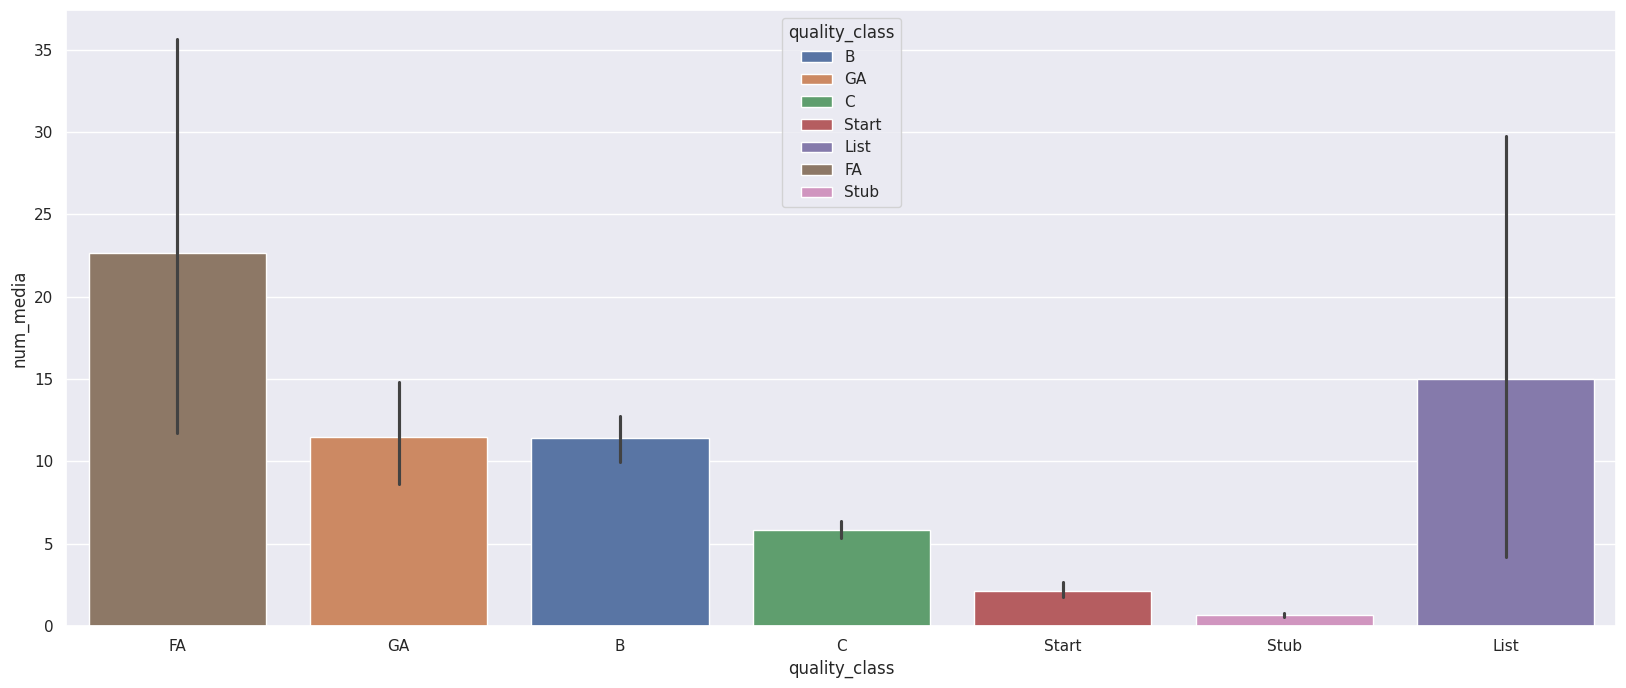

In [ ]:
# A barplot of num_media and quality_class
sns.barplot(data = df_num_media_analysis, x = "quality_class", y = "num_media",order = bar_plot_order_quality_class, hue = "quality_class")

(0.0, 100.0)

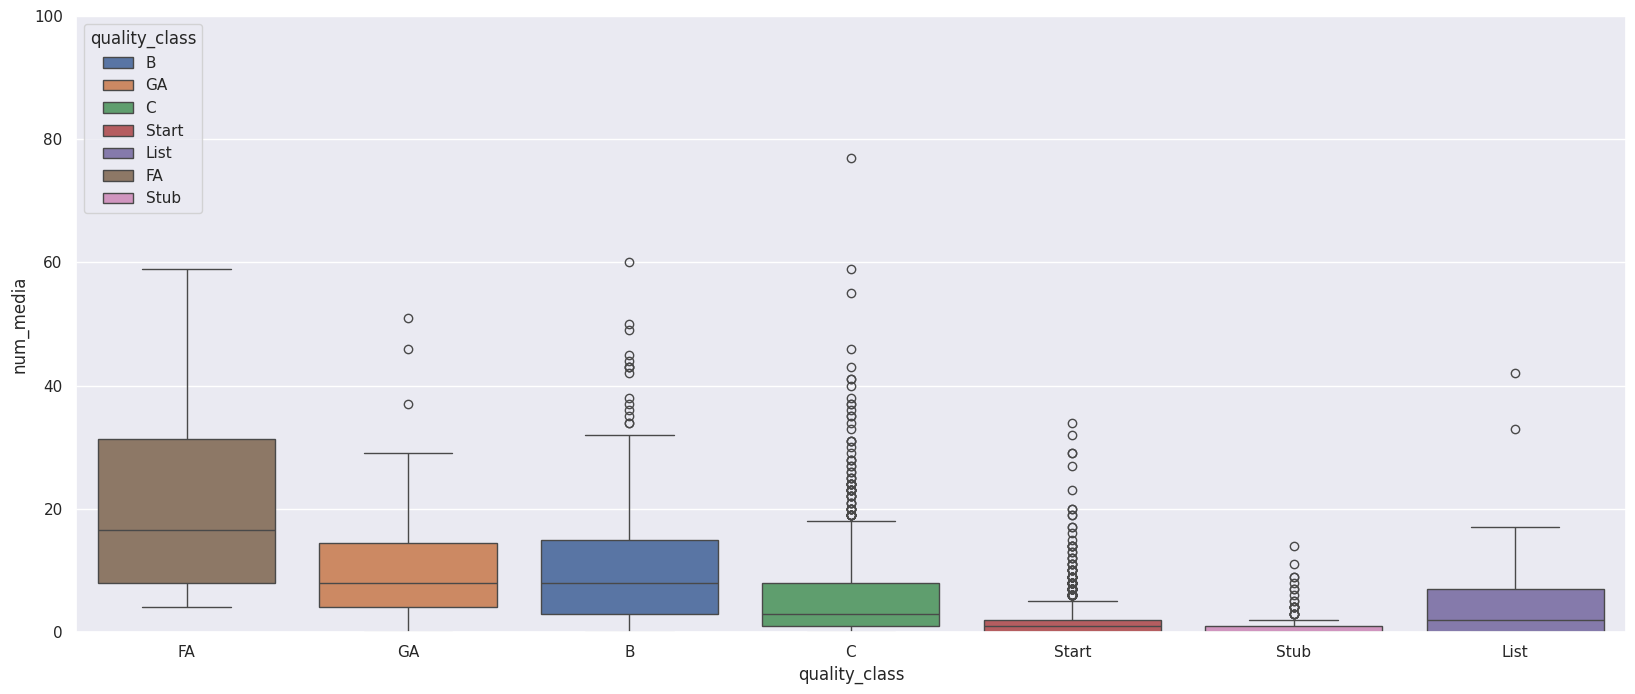

In [ ]:
# boxplot of quality class and num media
sns.boxplot(data = df_num_media_analysis, x = "quality_class", y = "num_media", order = bar_plot_order_quality_class, hue = "quality_class")
plt.ylim(0, 100) #adds a ylim because all upper tails are below 100

###### Plots of num_media and quality class over a granularity of months

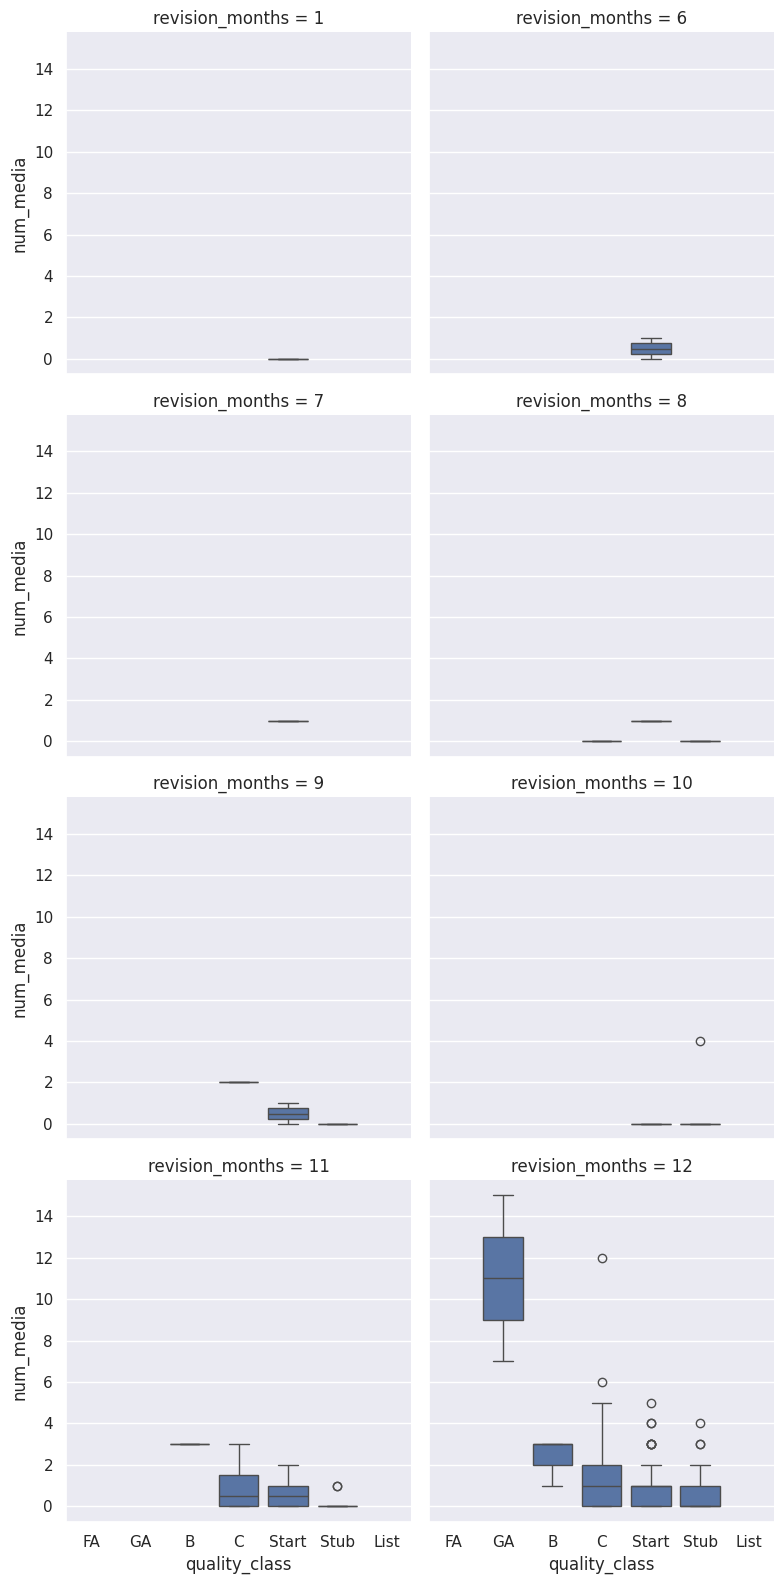

In [ ]:
# num_media and quality_classs over a granularity of monthly
# pick a sample year of 2021
g = sns.FacetGrid(data = df_num_media_analysis.loc[df_num_media_analysis.revision_year == 2021], col = "revision_months", height = 4, aspect = 1, col_wrap = 2)
g.map(sns.boxplot, "quality_class", "num_media", order = bar_plot_order_quality_class)

###### Plots of importance class and num_media over a granularity of years

<Axes: xlabel='importance_class', ylabel='num_media'>

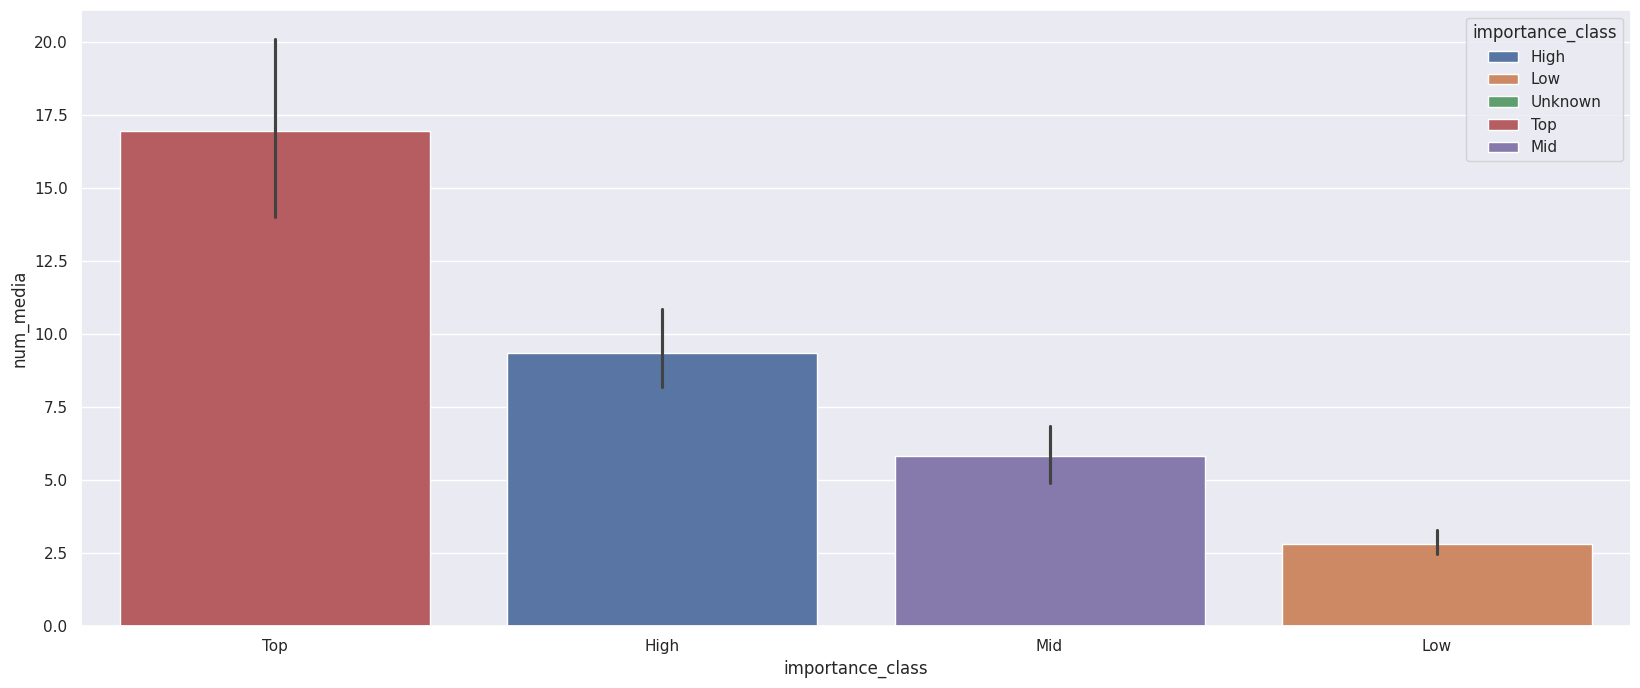

In [ ]:
# A barplot of num_media and importance_class
sns.barplot(data = df_num_media_analysis, x = "importance_class", y = "num_media",order = bar_plot_order_importance_class, hue ="importance_class")

(0.0, 50.0)

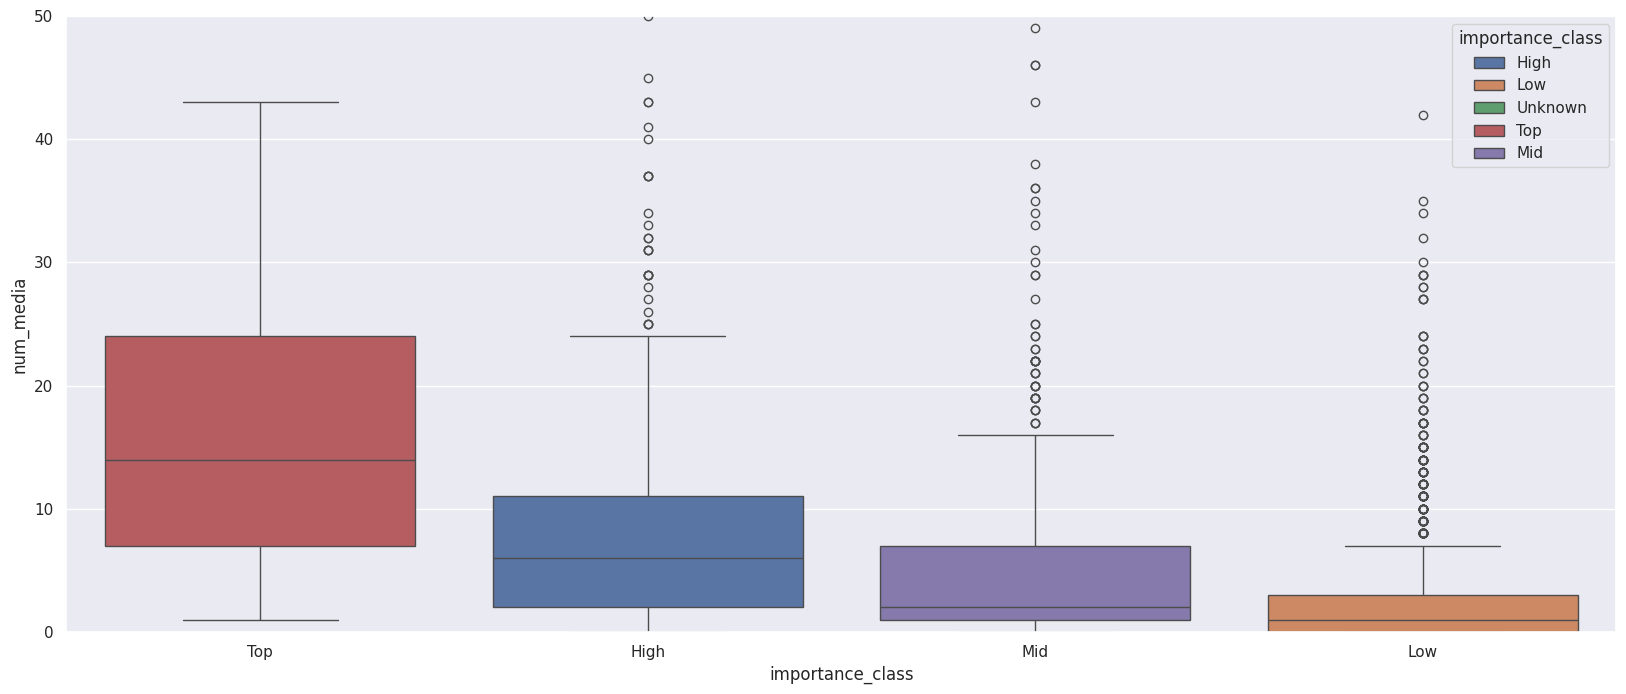

In [ ]:
# boxplot of num_media and importance class
sns.boxplot(data = df_num_media_analysis, x = "importance_class", y = "num_media", order = bar_plot_order_importance_class, hue = "importance_class")
plt.ylim(0, 50) # adds a ylim because all upper tails are below 50

###### Plots of num_media and importance class over a granularity of months

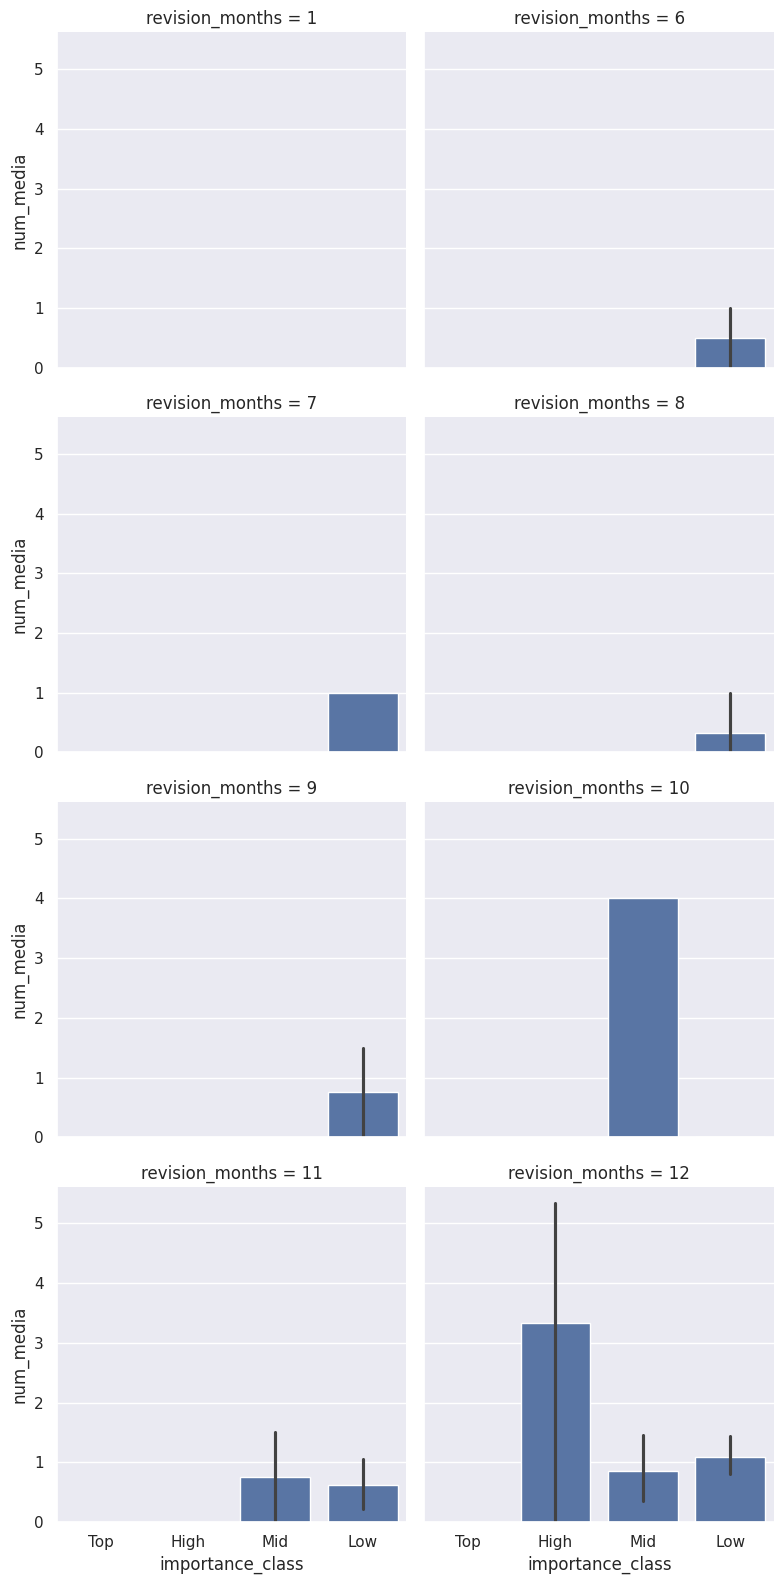

In [ ]:
# num_media and importance over a granularity of monthly
# pick a sample year of 2021
g = sns.FacetGrid(data = df_num_media_analysis.loc[df_num_media_analysis.revision_year == 2021], col = "revision_months", height = 4, aspect = 1, col_wrap = 2)
g.map(sns.barplot, "importance_class", "num_media", order = bar_plot_order_importance_class)

###### Observations
1. There is not a clear relationship between num_media and pred_qual.
2. Articles which are of the least quality (Stubs) have num_media of less than or equal to 2.
3. Articles with a greater quality class and importance class have a greater median value of num_media.

###### Tradeoffs between longer and shorter granularities
1. Scatter Plot (pred_qual, num_media)
- Scatter plots from both sets of plots are very similar and show only a moderate relationship between pred_qual and num_media. All sets of plots complement each other in this case.
2. Box plot and Bar plot (quality_class, num_media)
- There is variation in the distribution of quality class because of a scarcity of data in plots that use shorter granularities. For the plots that have an almost sufficient amount of data, the plot mirrors those that use a longer granularity.
3. Box plot and Bar plot (importance_class, num_media)
- There is also variation in importance class because of a scarcity of data that use shorter granularities. However, for plots with an almost sufficient amount of data, the plot mirrors those that use a longer granularity.

###### Agrregation and Filters
-  The max value of num_media was filtered for every article and used in the analyses. The max value was chosen to test the hypothesis that the more num_media the higher the quality score.


## I. Relationship between (num_headings and pred_qual) (num_headings and quality_class) (num_headings and importance_class) over different granularities

In [ ]:
# here we get the maximum values of num_headings for each page_id.
# the revision_id will be used to merge with the respective pred_qual valies in the original df_revisions
df_num_headings_analysis = df_revisions.loc[:, ["page_id", "num_headings", "revision_id", "quality_class", "importance_class", "revision_year", "revision_months"]].groupby("page_id").max()
df_num_headings_analysis

num_headings  revision_id quality_class importance_class  \
page_id                                                              
39                  24   1127470765             B             High   
627                131   1122142578            GA              Low   
903                  7   1124952523             C              Low   
1365                47   1130090281             B              Low   
3201                24   1126273383             B             High   
...                ...          ...           ...              ...   
72569668             4   1130664066             C              Low   
72596935             5   1130388362             C              Low   
72598169             6   1130644028             C              Low   
72613949             4   1130613139         Start              Low   
72624020             3   1130730324         Start              Mid   

          revision_year  revision_months  
page_id                                   
39                 2022               12  
627                2022               12  
903                2022               12  
1365               2022               12  
3201               2022               12  
...                 ...              ...  
72569668           2022               12  
72596935           2022               12  
72598169           2022               12  
72613949           2022               12  
72624020           2022               12  

[3642 rows x 6 columns]

In [ ]:
# pred_qual_values - a variable created in the first analysis that holds the revision id and pred qual of all articles
df_num_headings_analysis = df_num_headings_analysis.merge(pred_qual_values, left_on = "revision_id", right_on = "revision_id")
#we use the merge function to combine our dataframes thus getting the pred_qual values
df_num_headings_analysis

num_headings revision_id quality_class importance_class  revision_year  \
0               24  1127470765             B             High           2022   
1              131  1122142578            GA              Low           2022   
2                7  1124952523             C              Low           2022   
3               47  1130090281             B              Low           2022   
4               24  1126273383             B             High           2022   
...            ...         ...           ...              ...            ...   
3637             4  1130664066             C              Low           2022   
3638             5  1130388362             C              Low           2022   
3639             6  1130644028             C              Low           2022   
3640             4  1130613139         Start              Low           2022   
3641             3  1130730324         Start              Mid           2022   

      revision_months  pred_qual  
0                  12   0.881909  
1                  12   0.854619  
2                  12   0.581719  
3                  12   0.945119  
4                  12   0.806806  
...               ...        ...  
3637               12   0.469029  
3638               12   0.458267  
3639               12   0.458552  
3640               12   0.384134  
3641               12   0.307534  

[3642 rows x 7 columns]

###### Plots of num_headings and pred_qual over a granularity of years

<Axes: xlabel='num_headings', ylabel='pred_qual'>

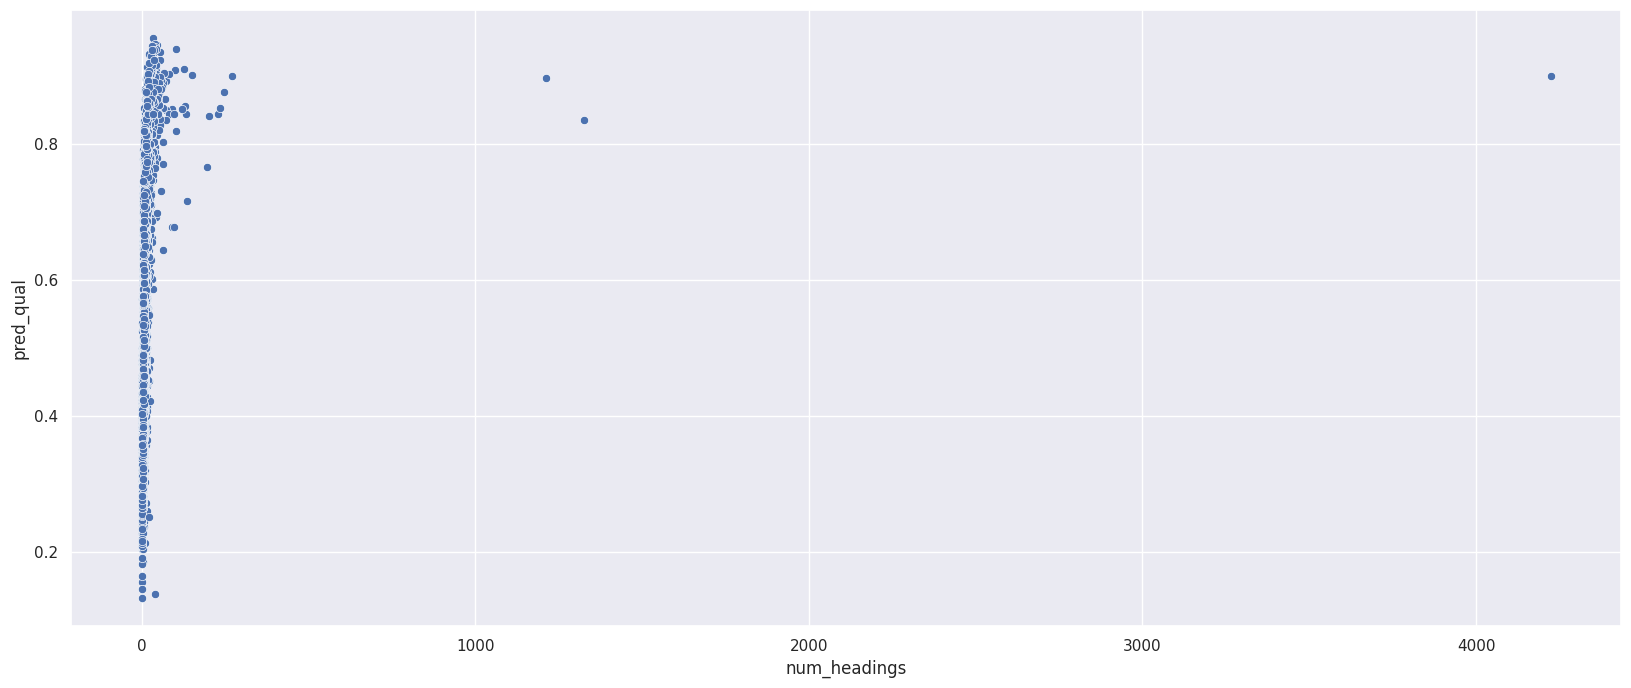

In [ ]:
# A scatterplot for num_headings and pred_qual
sns.scatterplot(data = df_num_headings_analysis, x = "num_headings", y = "pred_qual")

<Axes: xlabel='num_headings', ylabel='pred_qual'>

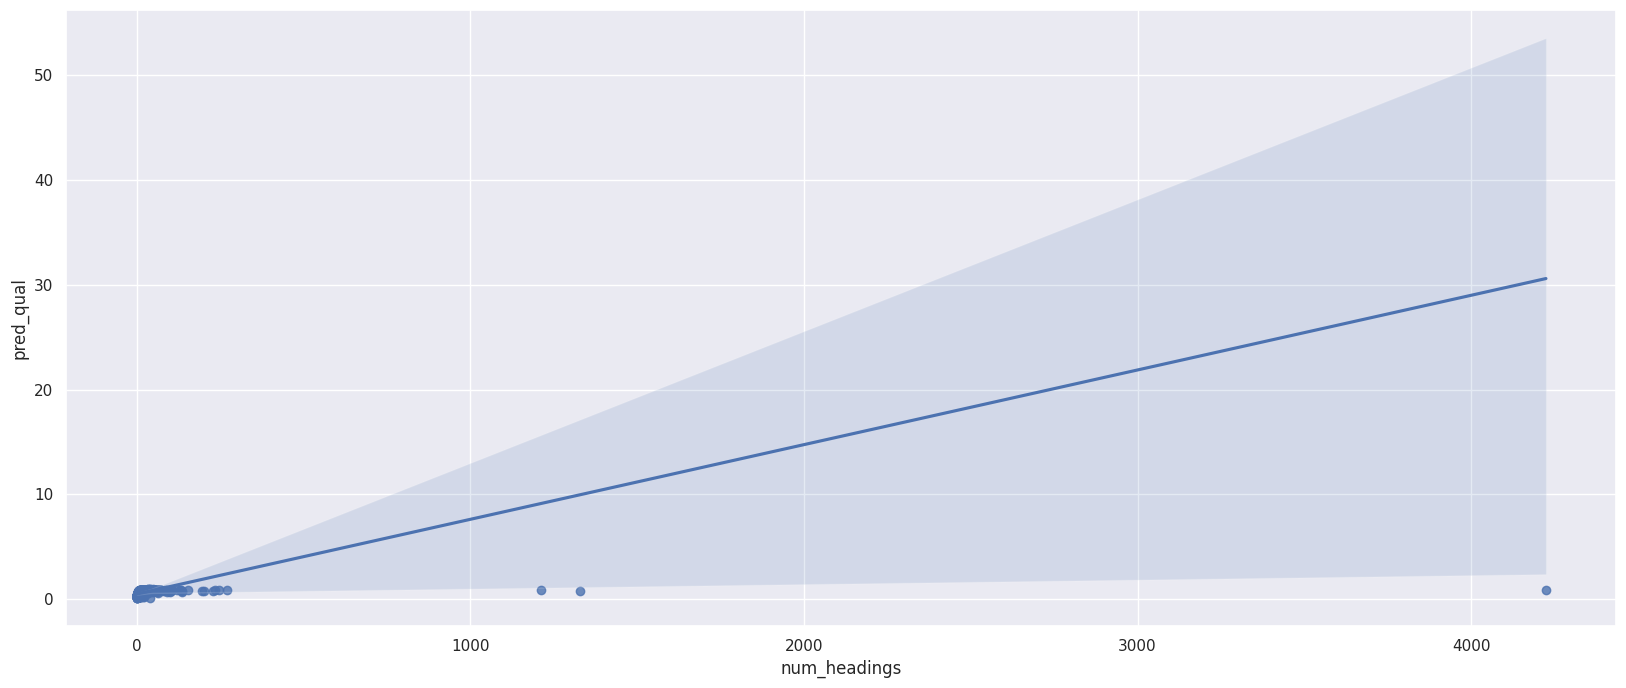

In [ ]:
sns.regplot(data = df_num_headings_analysis, x = "num_headings", y = "pred_qual", fit_reg = True, robust = True)

###### Plots of num_headings and pred_qual over a monthly granularity

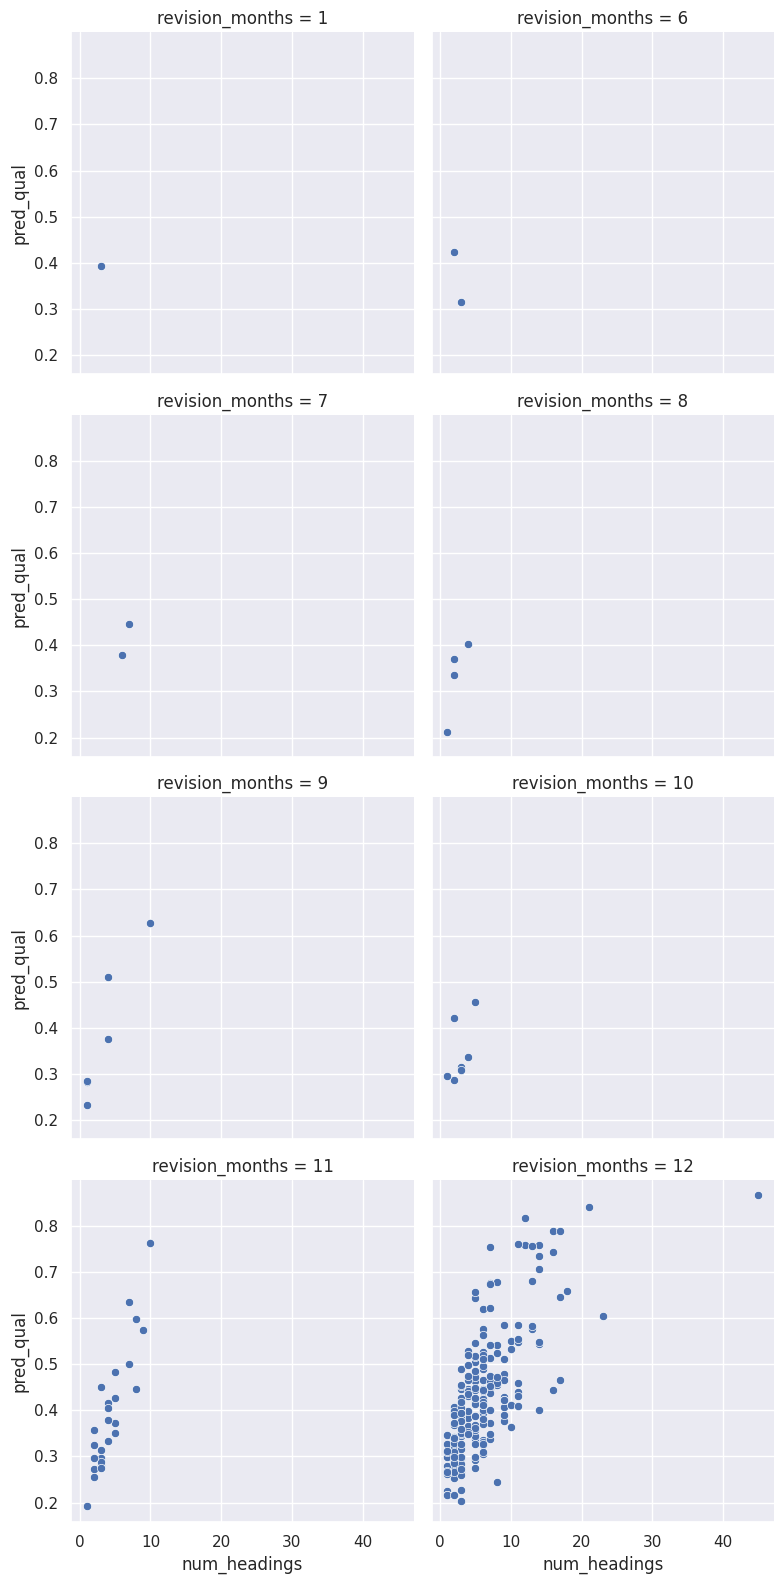

In [ ]:
# num_media and pred_qual over a granularity of monthly
# pick a sample year of 2021
g = sns.FacetGrid(data = df_num_headings_analysis.loc[df_num_headings_analysis.revision_year == 2021], col = "revision_months", height = 4, aspect = 1, col_wrap = 2)
g.map(sns.scatterplot, "num_headings", "pred_qual")

###### Plots of num_headings and quality class over a yearly granularity

<Axes: xlabel='quality_class', ylabel='num_headings'>

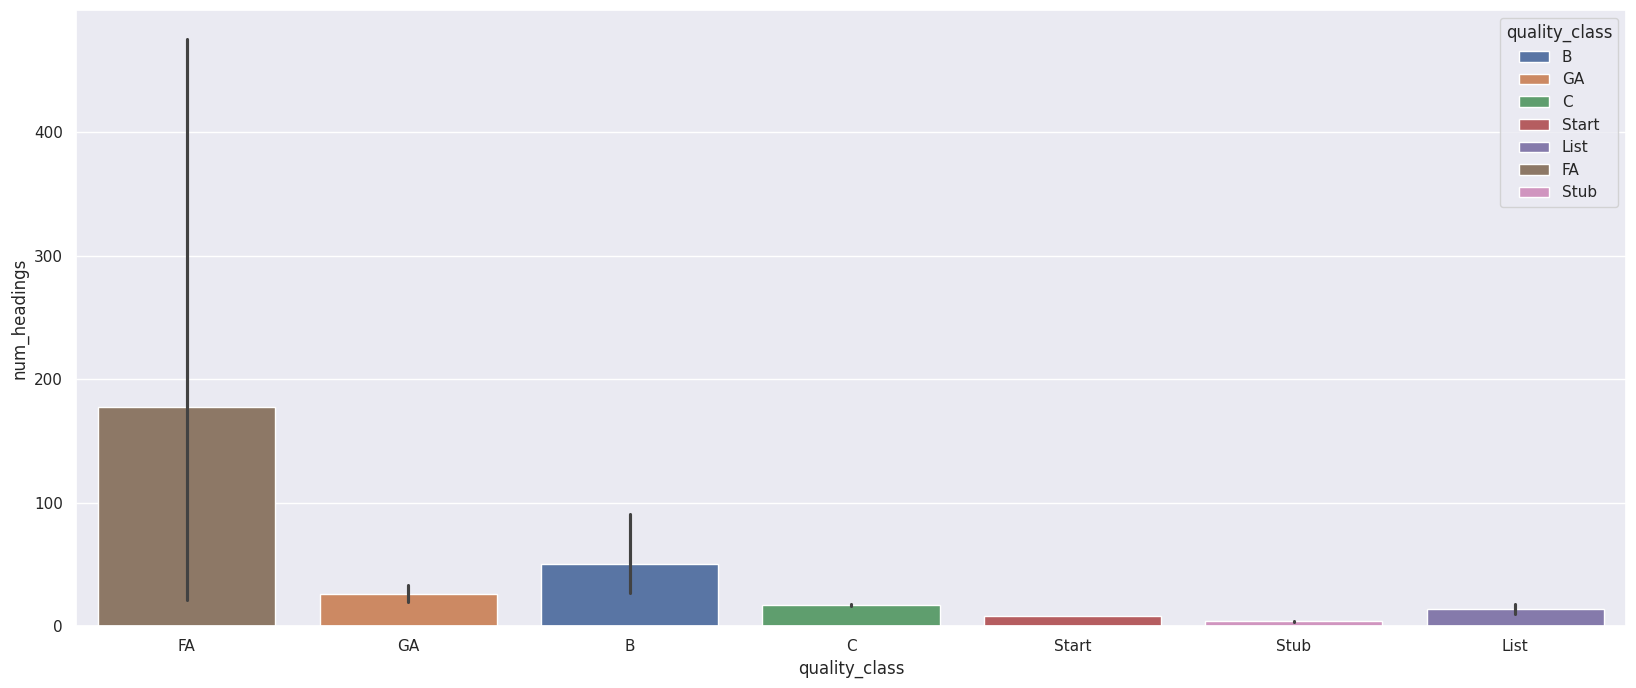

In [ ]:
# A bar plot to show the relationship between quality_class and num_headings
sns.barplot(data = df_num_headings_analysis, x = "quality_class", y = "num_headings", order = bar_plot_order_quality_class, hue = "quality_class")

(0.0, 100.0)

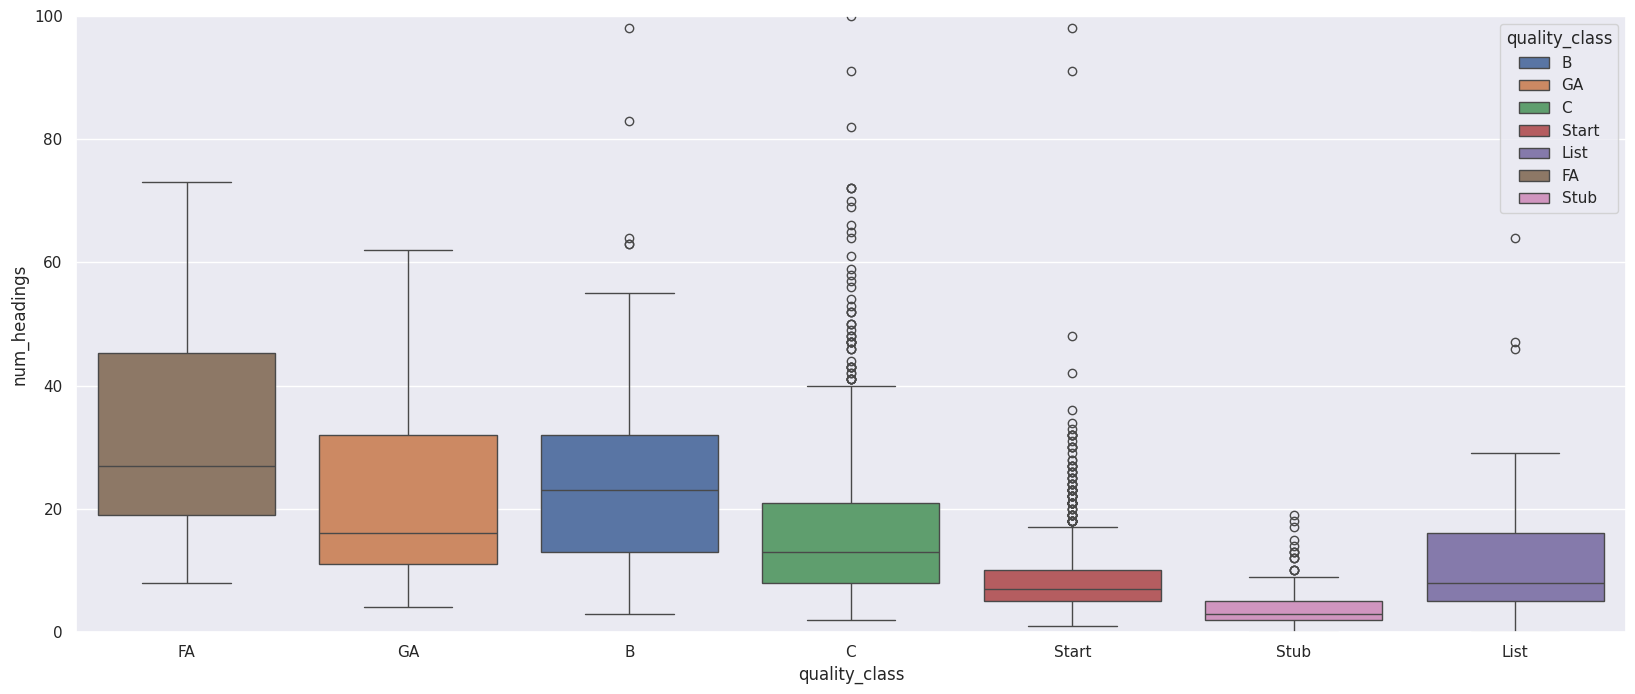

In [ ]:
sns.boxplot(data = df_num_headings_analysis, x = "quality_class", y = "num_headings", order = bar_plot_order_quality_class, hue = "quality_class")
plt.ylim(0, 100) #adds a a ylim because all upper tails are below 100

##### Plots of num_headings and pred_qual over a monthly granularity

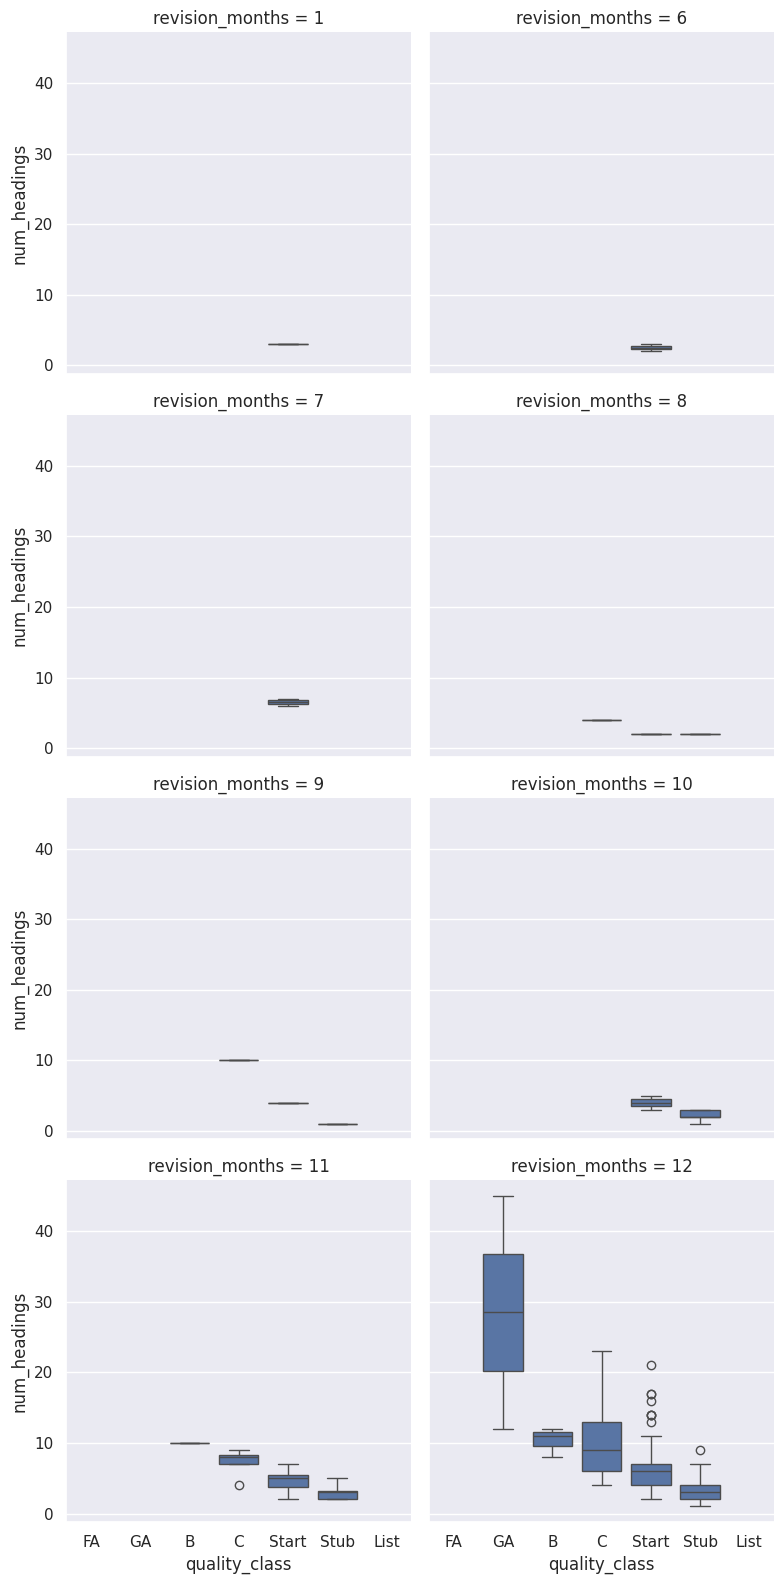

In [ ]:
# num_headings and quality class over a granularity of monthly
# pick a sample year of 2021
g = sns.FacetGrid(data = df_num_headings_analysis.loc[df_num_headings_analysis.revision_year == 2021], col = "revision_months", height = 4, aspect = 1, col_wrap = 2)
g.map(sns.boxplot, "quality_class", "num_headings", order = bar_plot_order_quality_class)

###### Plots of num_headings and importance class over a yearly granularity

<Axes: xlabel='importance_class', ylabel='num_headings'>

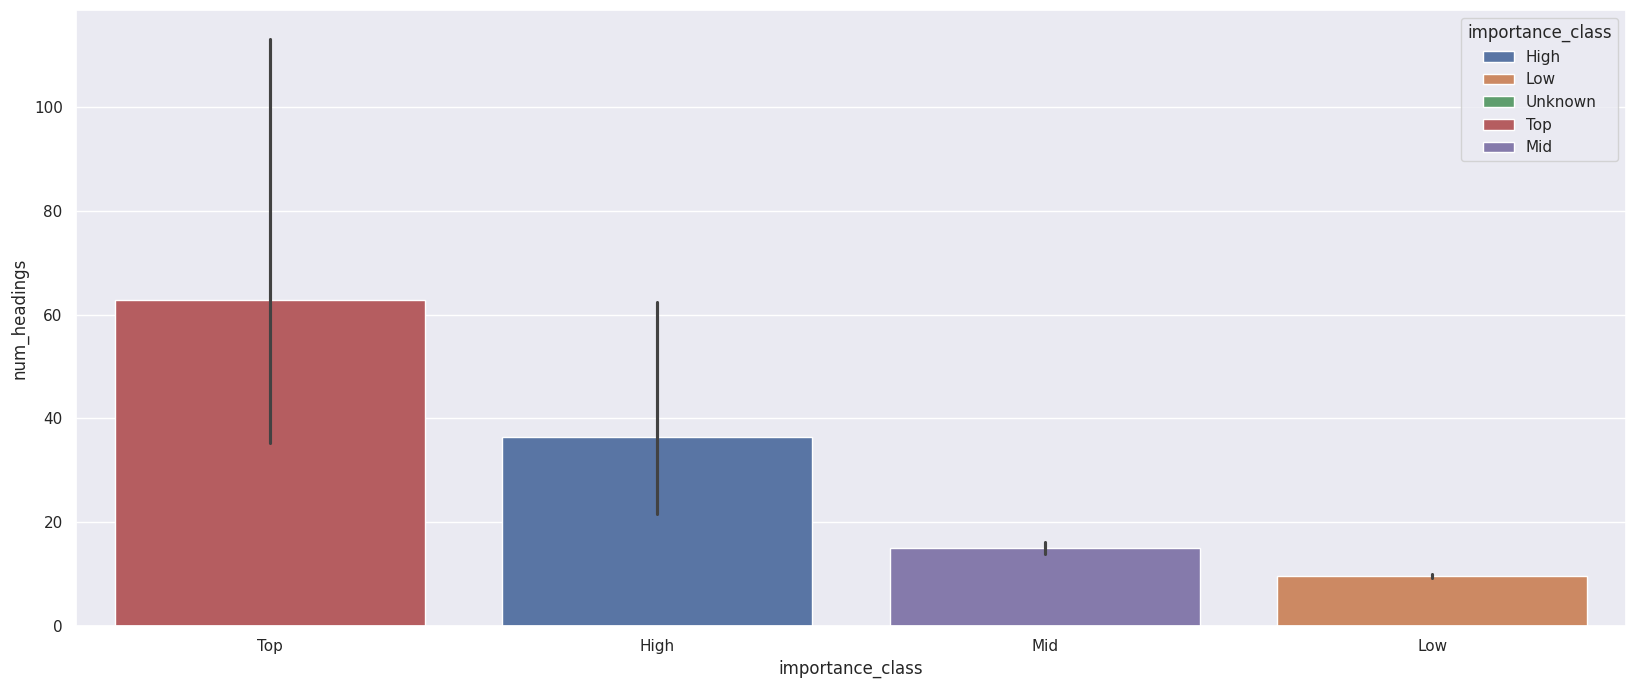

In [ ]:
# A bar plot to show the relationship between importance_class and num_headings
sns.barplot(data = df_num_headings_analysis, x = "importance_class", y = "num_headings", order = bar_plot_order_importance_class, hue = "importance_class")

(0.0, 75.0)

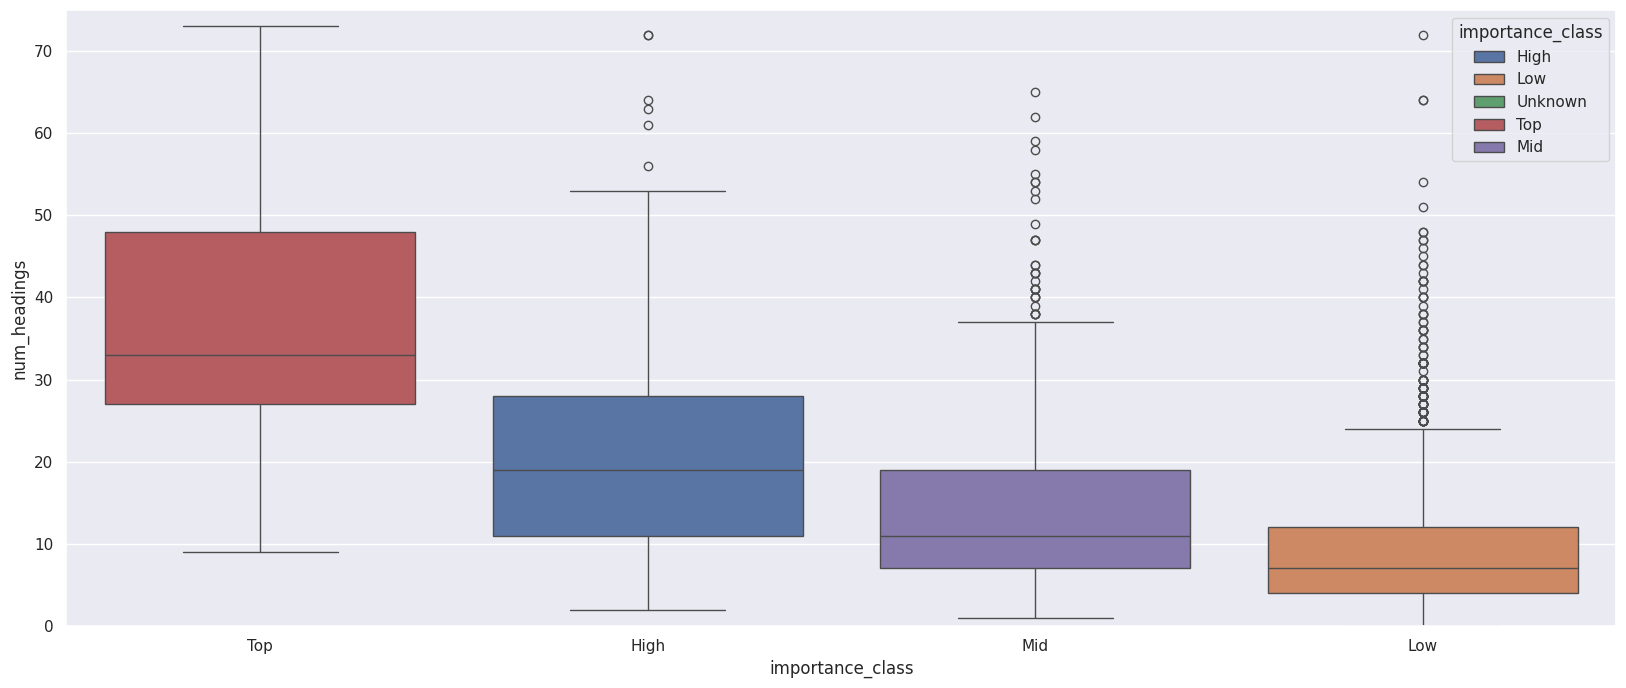

In [ ]:
sns.boxplot(data = df_num_headings_analysis, x = "importance_class", y = "num_headings", order = bar_plot_order_importance_class, hue = "importance_class")
plt.ylim(0, 75) #all upper tails are below 100

##### Plots of importance class and num_headings over a monthrly granularity

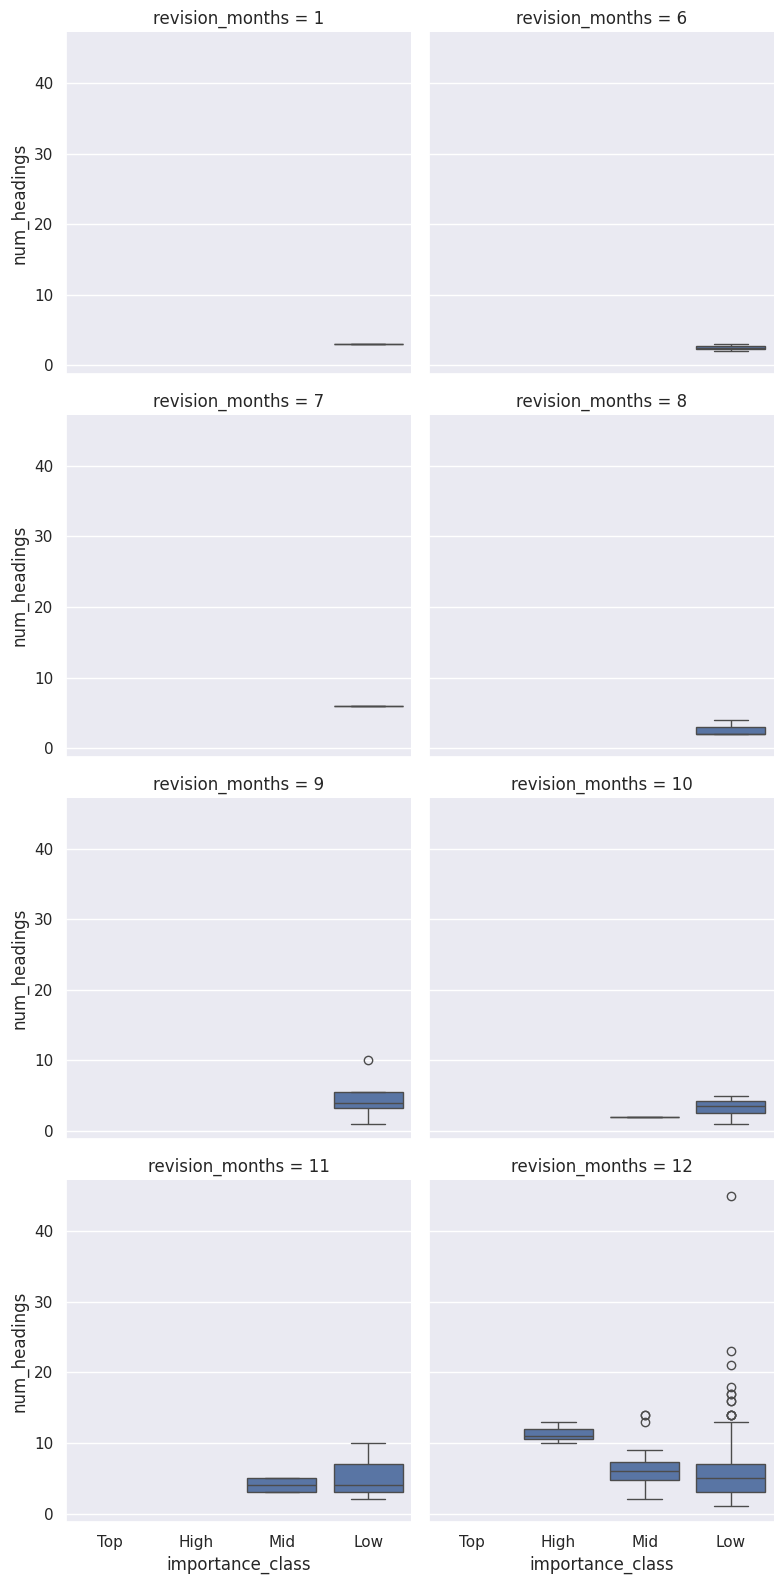

In [ ]:
# num_headings and importance class over a granularity of monthly
# pick a sample year of 2021
g = sns.FacetGrid(data = df_num_headings_analysis.loc[df_num_headings_analysis.revision_year == 2021], col = "revision_months", height = 4, aspect = 1, col_wrap = 2)
g.map(sns.boxplot, "importance_class", "num_headings", order = bar_plot_order_importance_class)

###### Observations
1. The greater the number of num_headings the greater the value of pred_qual upto a certain point where their is no more increment.
2. Articles which are of the least quality (Stubs) have num_headings of less than or equal to 10.
3. Articles with a high quality class and importance class have a higher median value of num_headings.

#### Tradeofs between shorter and longer granularities
1. Scatter plot (pred_qual and num_headings)
 - There is little variation between the scatter plots of shorter and longer granularities. It is however clearer to see the slope of the scatter plot for shorter granularities.
2. Barplot (quality_class and num_headings)
- There is some variation in the distribution of quality_class in the shorter granularities because of the scarcity of data. However, for plots that have an almost sufficient number of data points, the plots begin to mirror the plots from larger granularities.
3. Barplot (importance_class and num_headings)
- There is some variation in the distribution of importance_class in the shorter granularities because of the scarcity of data. However, for plots that have an almost sufficient number of data points, the plots begin to mirror the plots from larger granularities.

#### Filters and aggregations
- The max value of num_headings was selected to test the hypothesis that the greater the number of headings the higher the quality scores
- Data was filtered based on the granularity period that was required for analysis.

### J. Relationship between (num_categories and pred_qual) (num_categories and quality_class) (num_categories and importance_class)

In [ ]:
# here we get the maximum values of num_categories for each page_id.
df_num_categories_analysis = df_revisions.loc[:, ["page_id", "num_categories", "revision_id", "quality_class", "importance_class", "revision_months", "revision_year"]].groupby("page_id").max()
df_num_categories_analysis

num_categories  revision_id quality_class importance_class  \
page_id                                                                
39                     9   1127470765             B             High   
627                   23   1122142578            GA              Low   
903                    2   1124952523             C              Low   
1365                  14   1130090281             B              Low   
3201                   4   1126273383             B             High   
...                  ...          ...           ...              ...   
72569668               8   1130664066             C              Low   
72596935               4   1130388362             C              Low   
72598169               3   1130644028             C              Low   
72613949               4   1130613139         Start              Low   
72624020               5   1130730324         Start              Mid   

          revision_months  revision_year  
page_id                                   
39                     12           2022  
627                    12           2022  
903                    12           2022  
1365                   12           2022  
3201                   12           2022  
...                   ...            ...  
72569668               12           2022  
72596935               12           2022  
72598169               12           2022  
72613949               12           2022  
72624020               12           2022  

[3642 rows x 6 columns]

In [ ]:
# pred_qual_values - a variable created in the first analysis that holds the revision id and pred qual of all articles
df_num_categories_analysis = df_num_categories_analysis.merge(pred_qual_values, left_on = "revision_id", right_on = "revision_id")
#we use the merge function to combine our dataframes thus getting the pred_qual values
df_num_categories_analysis

num_categories revision_id quality_class importance_class  \
0                  9  1127470765             B             High   
1                 23  1122142578            GA              Low   
2                  2  1124952523             C              Low   
3                 14  1130090281             B              Low   
4                  4  1126273383             B             High   
...              ...         ...           ...              ...   
3637               8  1130664066             C              Low   
3638               4  1130388362             C              Low   
3639               3  1130644028             C              Low   
3640               4  1130613139         Start              Low   
3641               5  1130730324         Start              Mid   

      revision_months  revision_year  pred_qual  
0                  12           2022   0.881909  
1                  12           2022   0.854619  
2                  12           2022   0.581719  
3                  12           2022   0.945119  
4                  12           2022   0.806806  
...               ...            ...        ...  
3637               12           2022   0.469029  
3638               12           2022   0.458267  
3639               12           2022   0.458552  
3640               12           2022   0.384134  
3641               12           2022   0.307534  

[3642 rows x 7 columns]

##### Plots of num_categories and pred_qual over a granularity of years

<Axes: xlabel='num_categories', ylabel='pred_qual'>

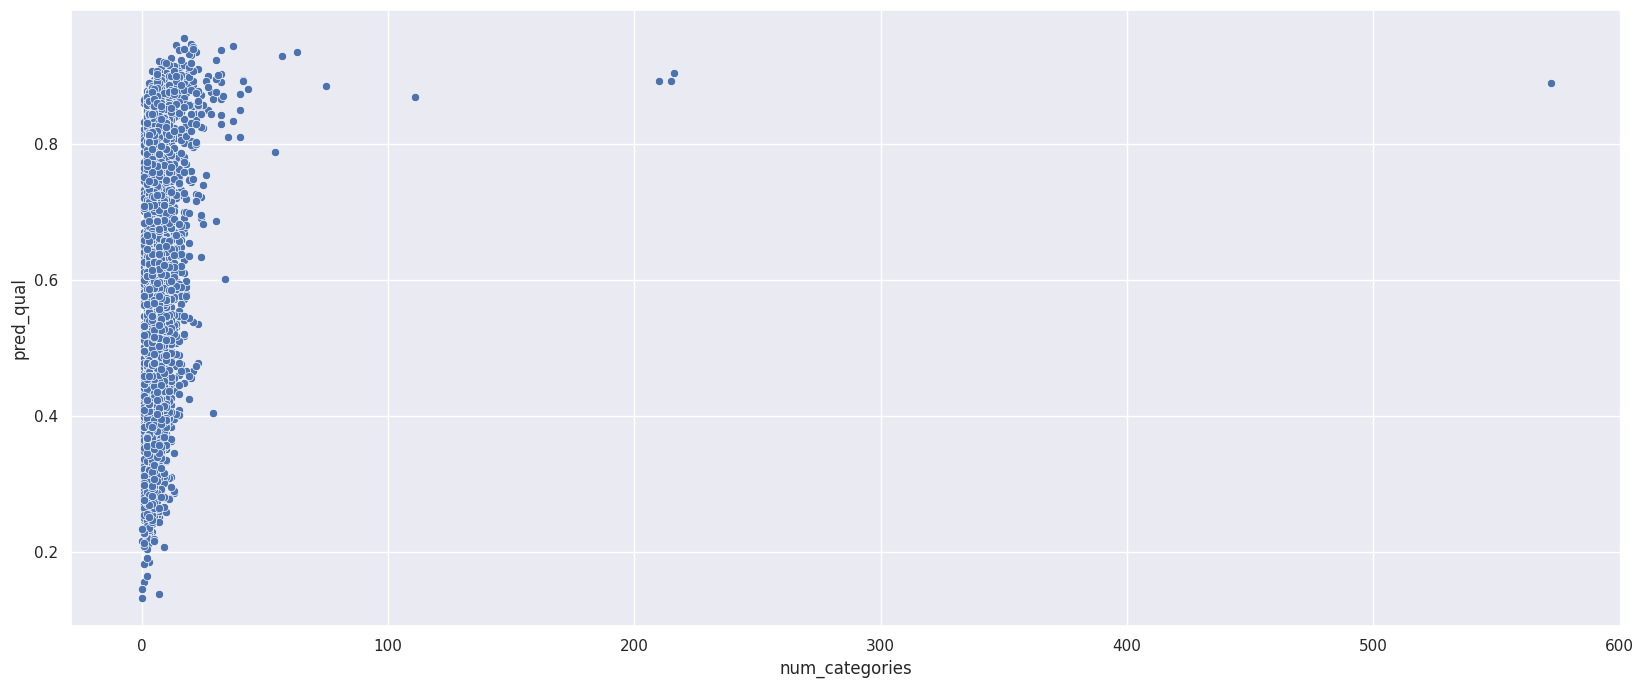

In [ ]:
# A lineplot between num_categories and pred_qual
# fig = plt.subplots(figsize=(20, 10))
sns.scatterplot(data = df_num_categories_analysis, x = "num_categories", y = "pred_qual")

(0.0, 100.0)

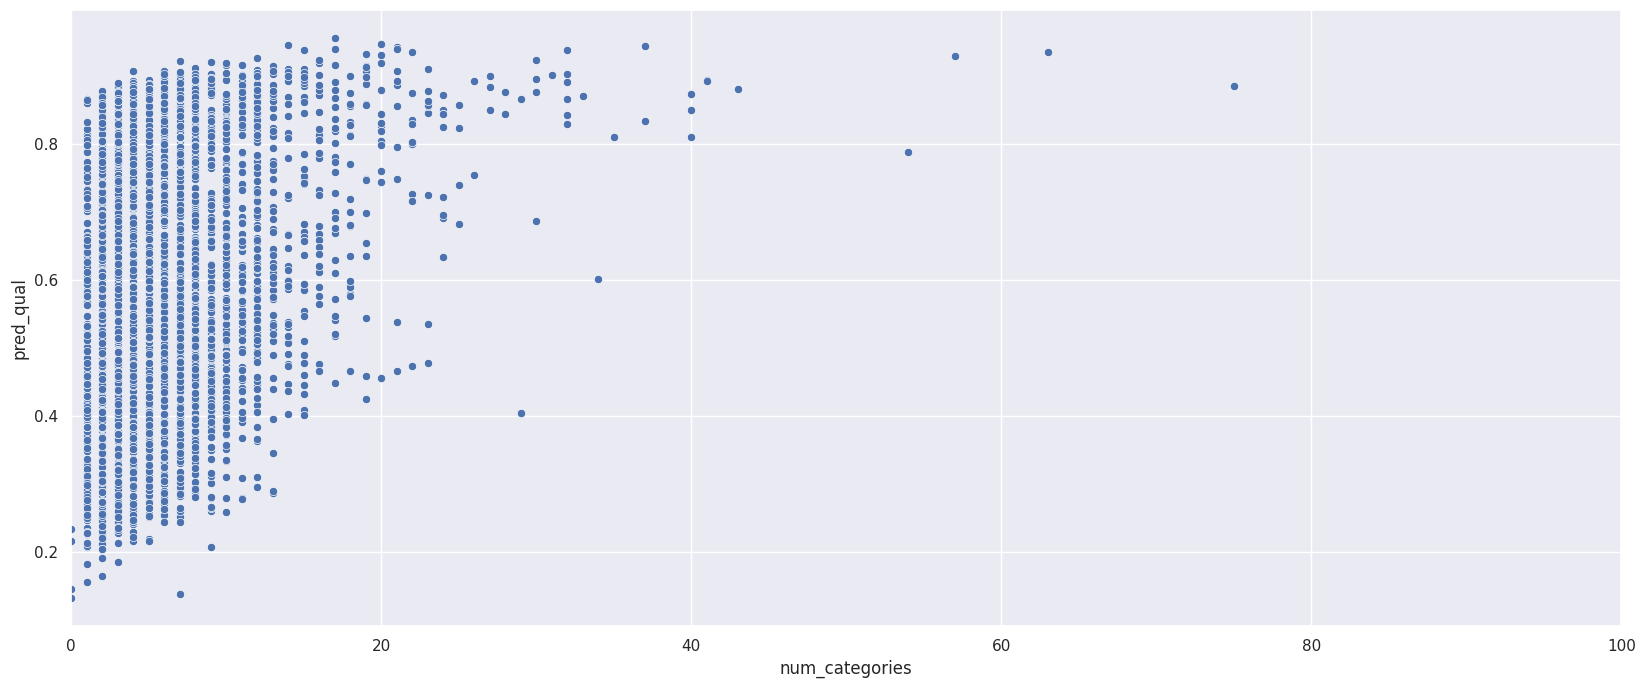

In [ ]:
# A scatterplot between num_categories and pred_qual with a lower xlim
sns.scatterplot(data = df_num_categories_analysis, x = "num_categories", y = "pred_qual")
plt.xlim(0, 100)

###### Plots of num_categories and pred_qual over a granularity of months

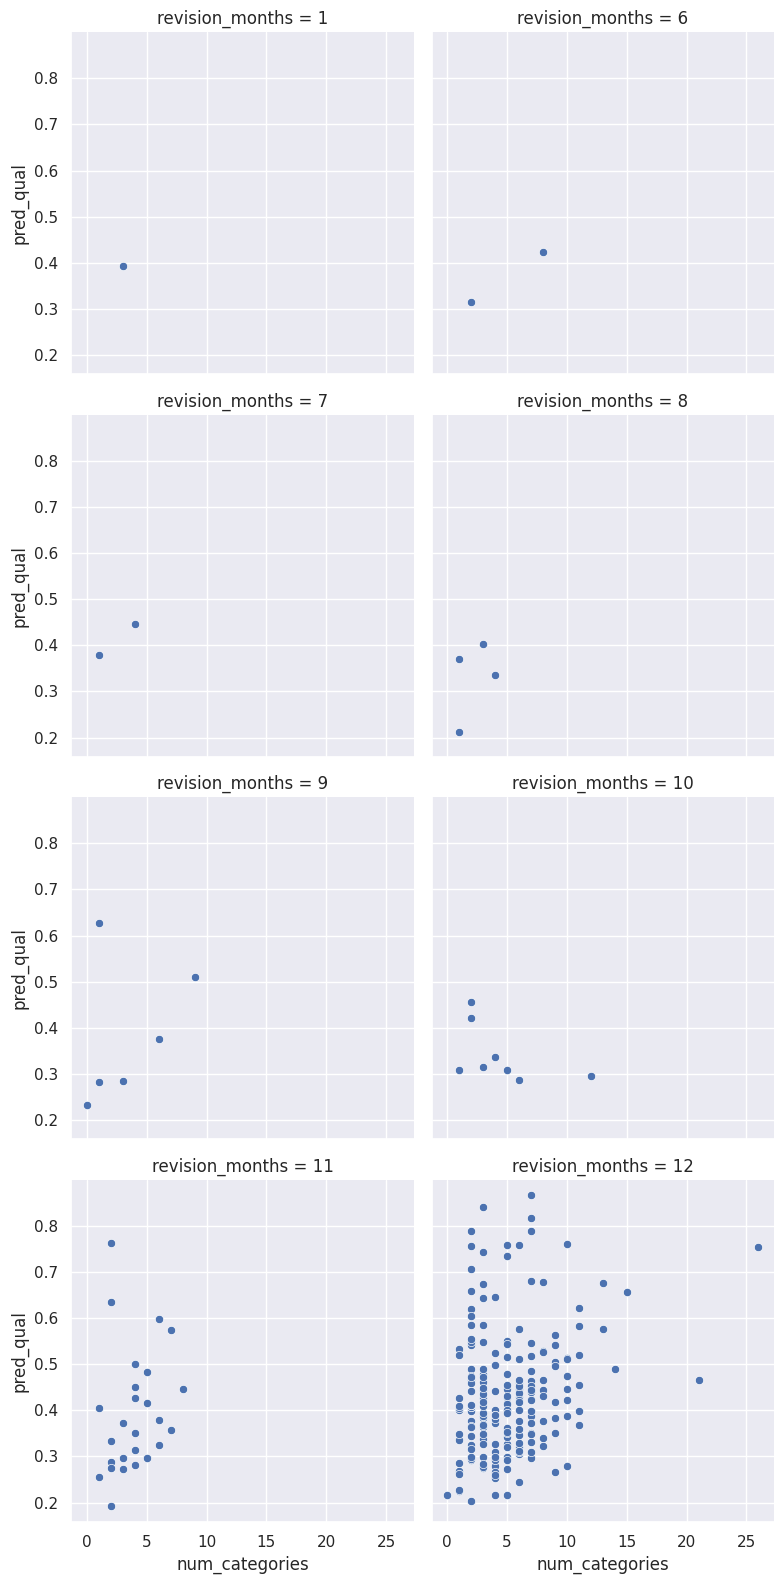

In [ ]:
# num_categories and pred_qual over a granularity of monthly
# pick a sample year of 2021
g = sns.FacetGrid(data = df_num_categories_analysis.loc[df_num_categories_analysis.revision_year == 2021], col = "revision_months", height = 4, aspect = 1, col_wrap = 2)
g.map(sns.scatterplot, "num_categories", "pred_qual")

###### Plots of num_categories and quality class over a granularity of yearly

<Axes: xlabel='quality_class', ylabel='num_categories'>

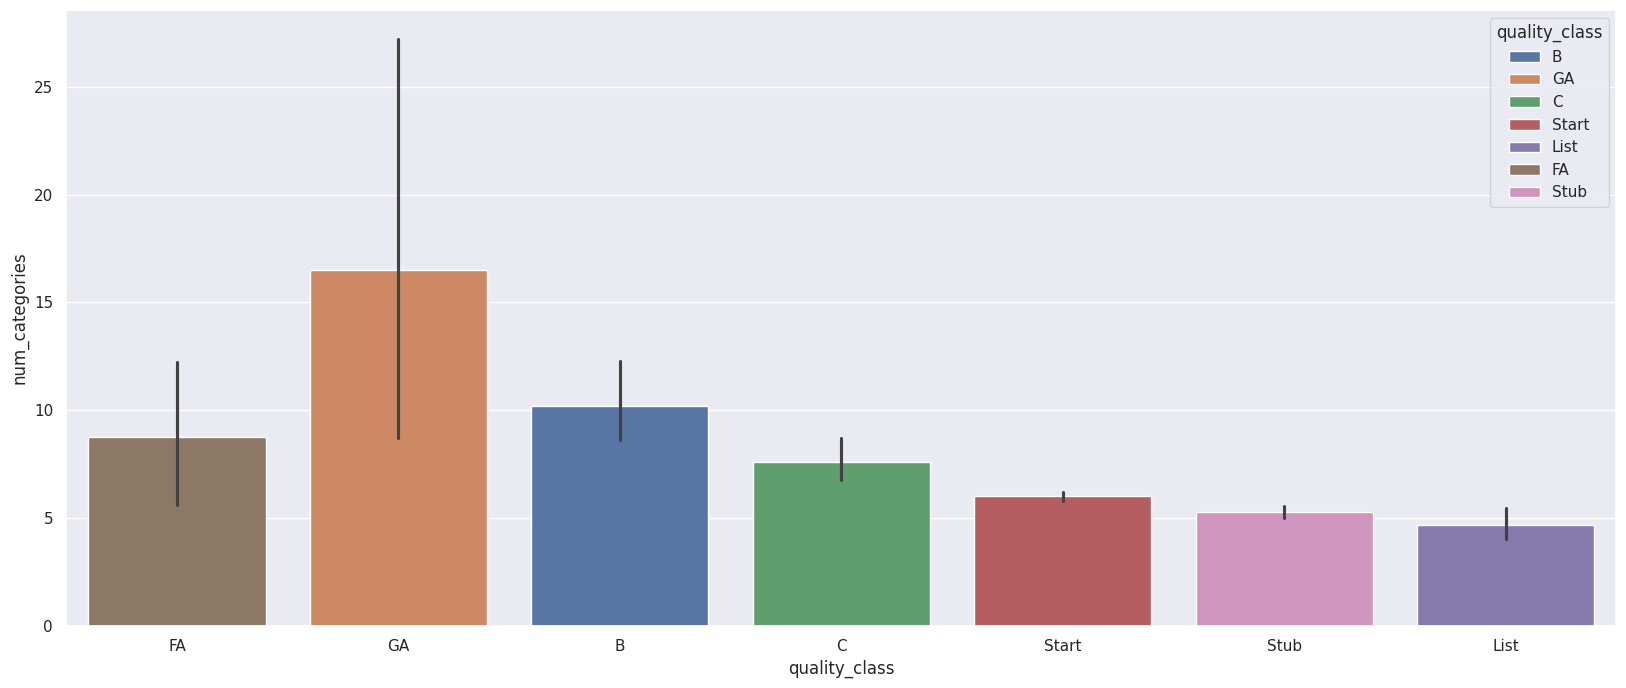

In [ ]:
# A barplot between num_categories and quality_class
sns.barplot(data = df_num_categories_analysis, x = "quality_class", y = "num_categories", order = bar_plot_order_quality_class, hue = "quality_class")

(0.0, 20.0)

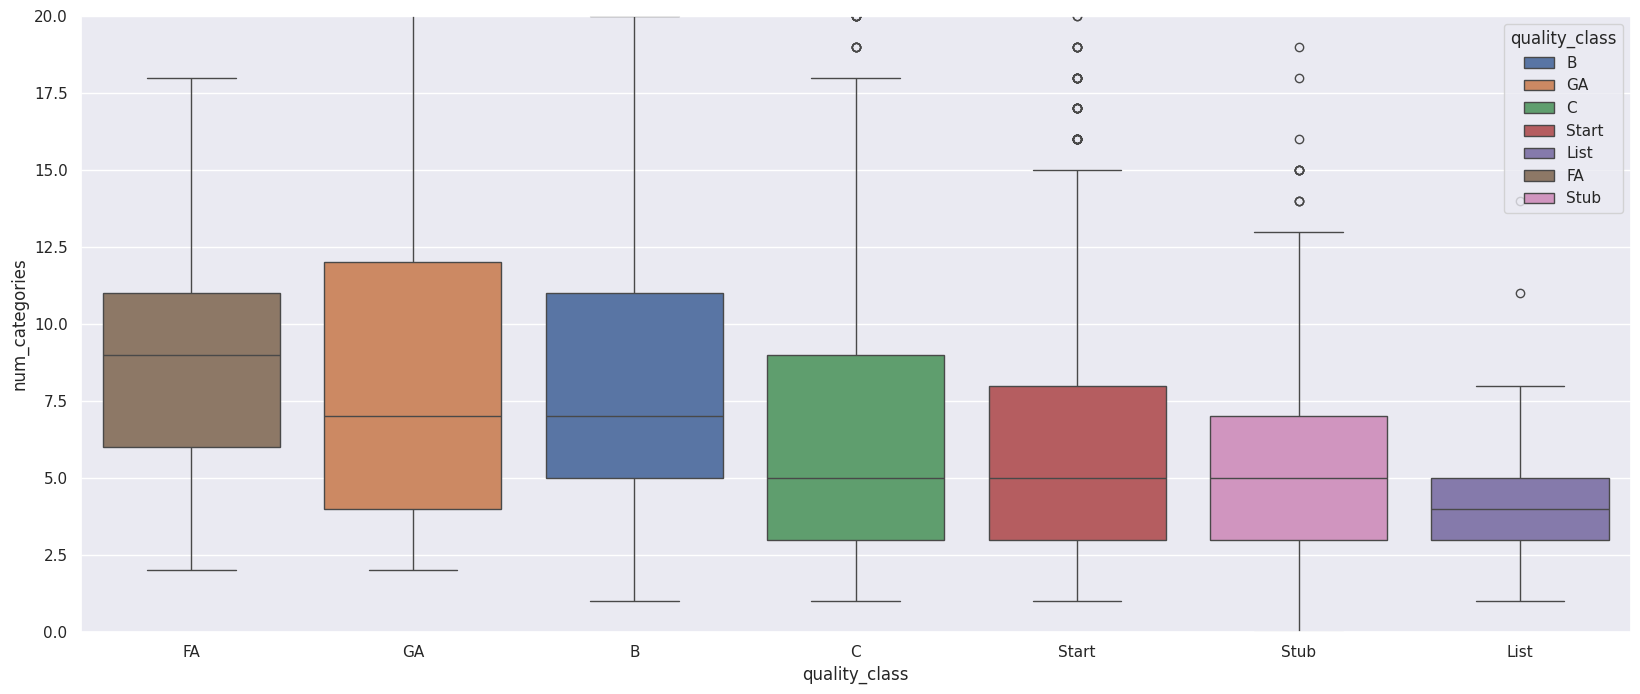

In [ ]:
# violin plot of quality class and num_categories
sns.boxplot(data = df_num_categories_analysis, x = "quality_class", y = "num_categories", order = bar_plot_order_quality_class, hue = "quality_class")
plt.ylim(0, 20) #all the upper tails are below 20

###### Plots of num_categories and quality class over a granularity of monthly

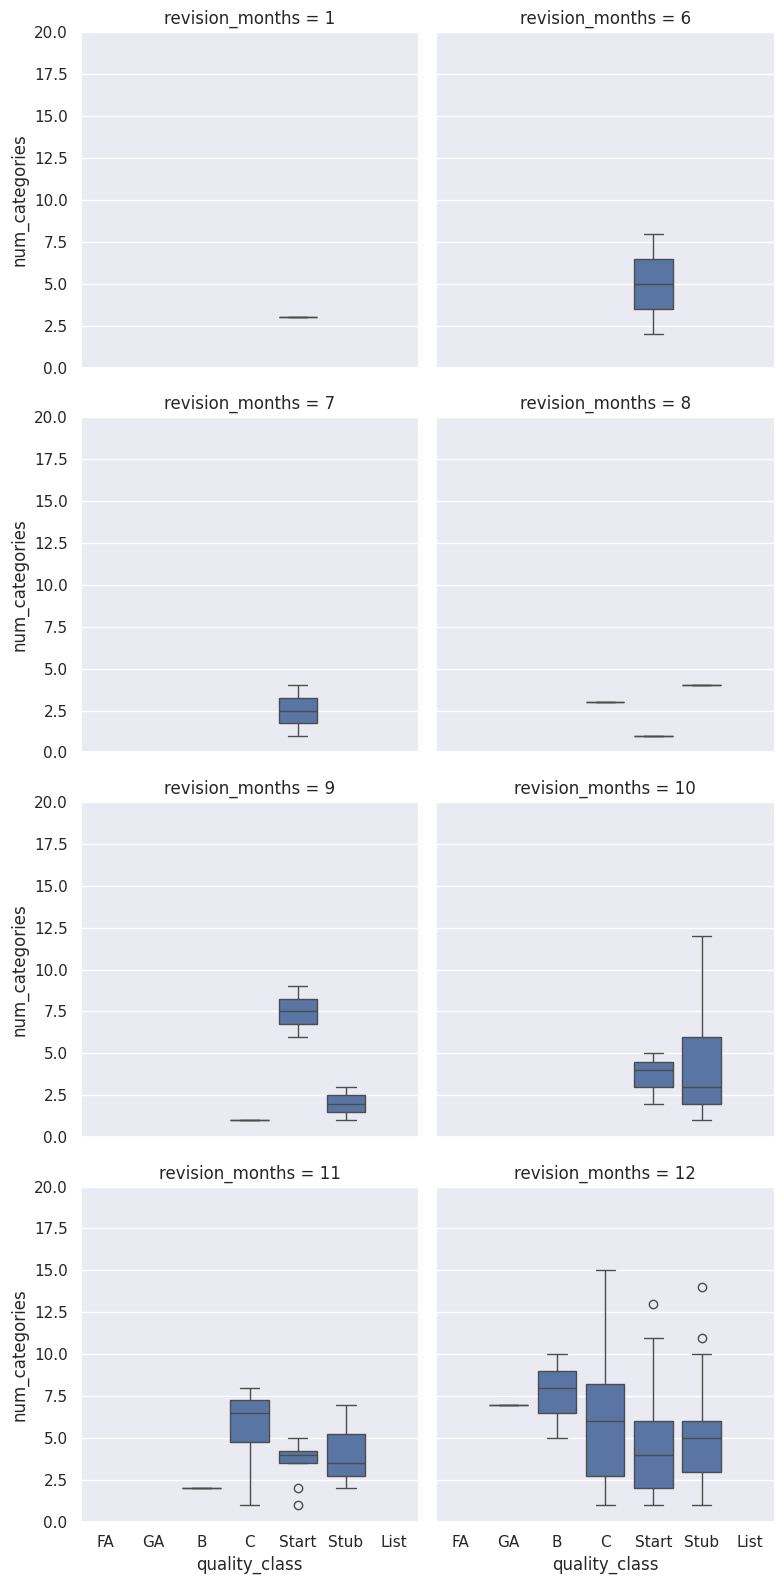

In [ ]:
# num_categories and quality class over a granularity of monthly
# pick a sample year of 2021
g = sns.FacetGrid(data = df_num_categories_analysis.loc[df_num_categories_analysis.revision_year == 2021], col = "revision_months", height = 4, aspect = 1, col_wrap = 2)
plt.ylim(0, 20)
g.map(sns.boxplot, "quality_class", "num_categories", order = bar_plot_order_quality_class)

###### Plots of num_categories and importance class over a granularity of years

<Axes: xlabel='importance_class', ylabel='num_categories'>

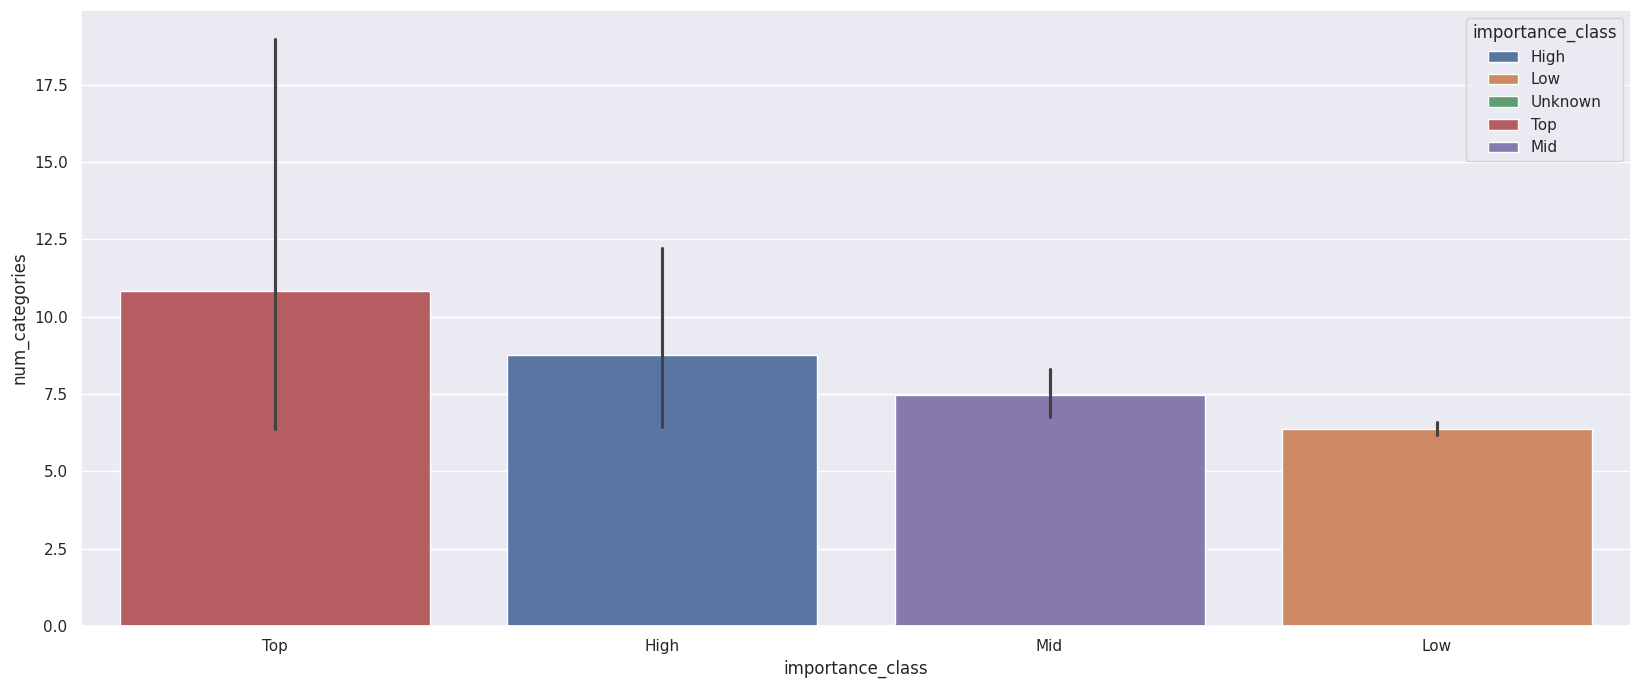

In [ ]:
# A barplot between num_categories and importance_class
sns.barplot(data = df_num_categories_analysis, x = "importance_class", y = "num_categories", order = bar_plot_order_importance_class, hue = "importance_class")

(0.0, 20.0)

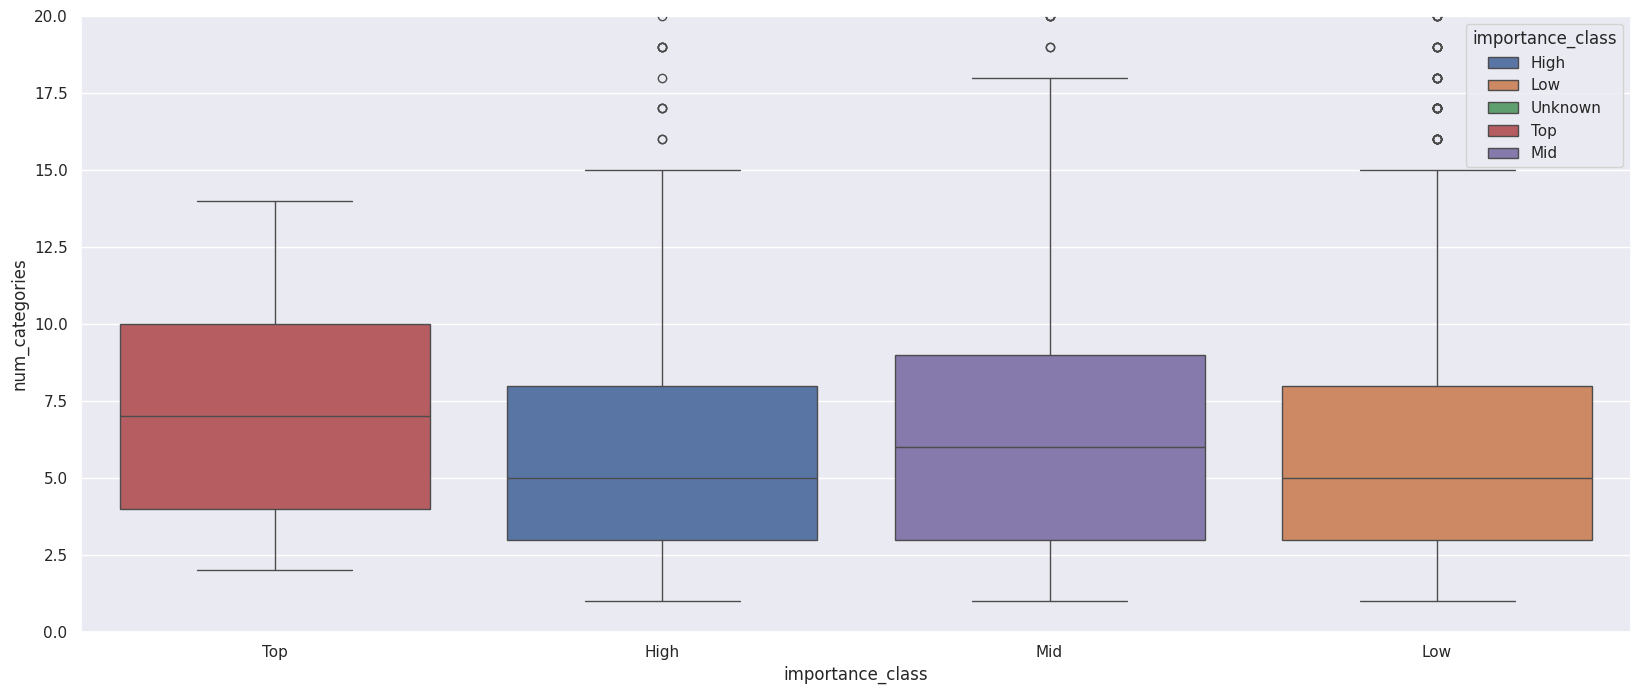

In [ ]:
# violin plot of importance class and num_categories
sns.boxplot(data = df_num_categories_analysis, x = "importance_class", y = "num_categories", order = bar_plot_order_importance_class, hue = "importance_class")
plt.ylim(0, 20)

###### Plots of importance class and num_categories over a monthly granularity

(0.0, 20.0)

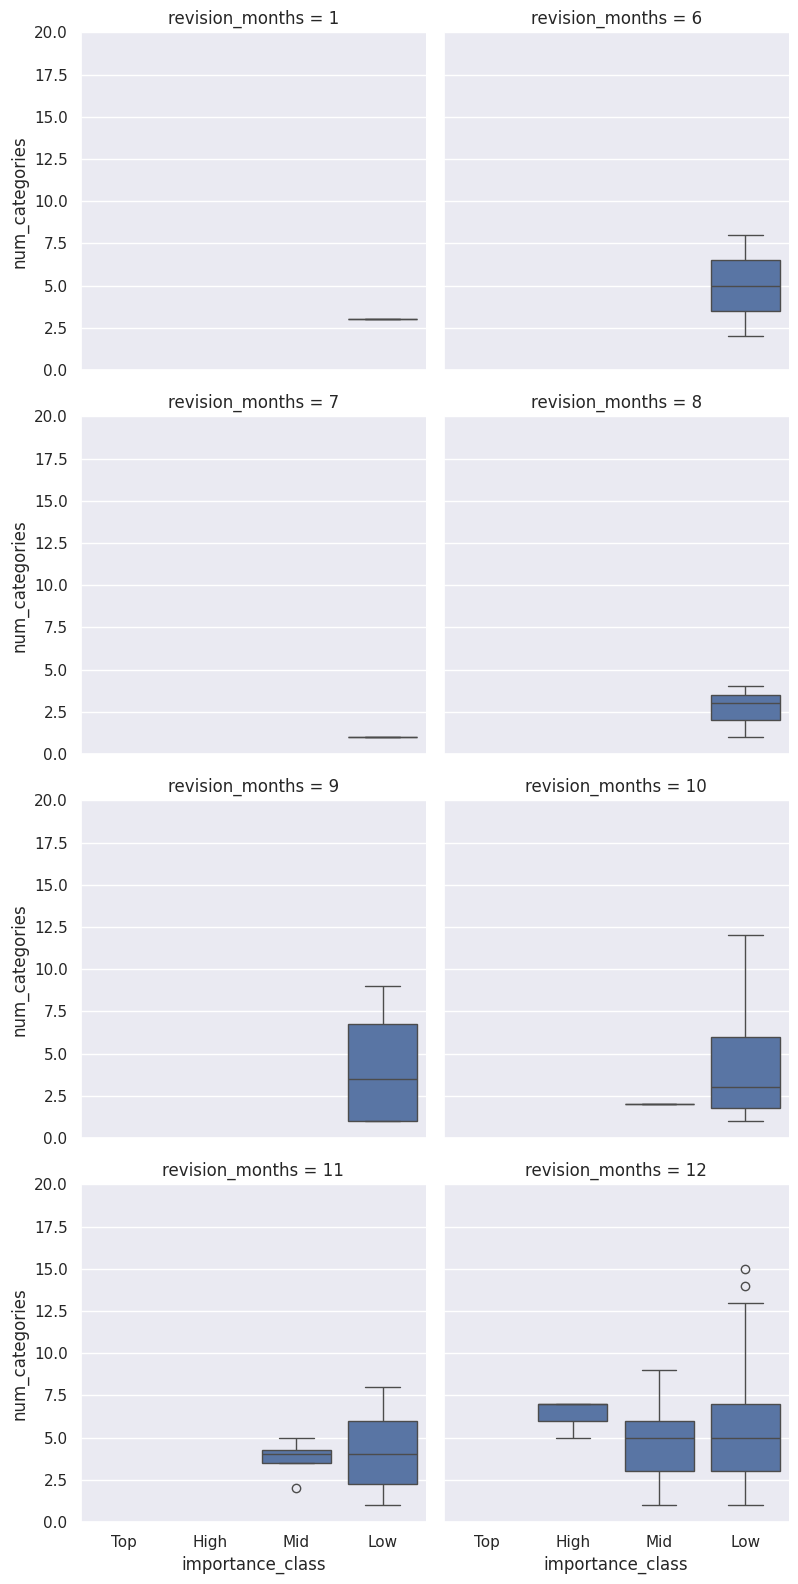

In [ ]:
# num_categories and importance class over a granularity of monthly
# pick a sample year of 2021
g = sns.FacetGrid(data = df_num_categories_analysis.loc[df_num_categories_analysis.revision_year == 2021], col = "revision_months", height = 4, aspect = 1, col_wrap = 2)
g.map(sns.boxplot, "importance_class", "num_categories", order = bar_plot_order_importance_class)
plt.ylim(0, 20)

###### Observations
1. There is no clear relationship between num_categories and the quality_scores.
2. Articles with a higher quality class and importance class have a higher median of num_categories.

##### Tradeoffs between shorter and longer granularities
1. Scatter plot between num_categories and pred_qual.
- Shorter granularity plots reveal a non-consistent relationship between num_categories and pred_qual where certain graphs are positive sloping while others are negatively sloping. This dynamic proves that there is no clear relationship between the two variables.
2. Box plot and bar plot of num_categories and quality class.
- Plots with longer granularities show that the median of all quality classes is almost the same thus proving that num_categories has a very minimal effect on quality scores.
- Plots with shorter granularities also show major variations thus showing that there is no clear relationship between the two variables.
- Insufficient data for all classes in shorter granularities hampers better analysis.
3. Box plot and bar plot of num categories and importance class
- Plots with longer granularities show that the median of all importance classes is almost the same thus proving that num_categories has a very minimal effect on quality scores.
- Plots with shorter granularities also show major variations thus showing that there is no clear relationship between the two variables.
##### Filters and aggregations
- The max value of num_categories was taken for each article during the revision period to test the hypothesis that the more num_categories there are the higher the value of quality scores.

## 3. Future Analyses

In [ ]:
# TODO: Describe what additional patterns you might want to explore and visualize in the data (and why). You don't have to know how to do the analyses.

1. The first visualization that I would like to make will primarily be of benefit for the writer of the article. It will need to be hosted on a web page where the writer of the article can track the quality scores of the article through different revision timestamps. The first graph will be an interactive line graph showing the pred_qual of the article through the entire revision period. When the writer hovers over a particular point in the line graph, a small popup appears showing the date of the revision_timestamp, the quality class and the importance class. This visualization will help the writer understand how the article is rated.

2. The second visualization will primarily also benefit the writer of the article. This visualization will now show the evolution of feature values through different revisions. Since all feature values are quantitative, there will all be plotted on a single line graph which will be interactive. Again, on hover a popup will appear showing the associated values of all feature scores at a particular revision timestamp. In addition, on hover it will also show the quality scores of the article thus allowing the writer to know what factors contribute to a good quality article.

3. The third visualization will benefit the reader. Upon opening an article the reader should see a chart showing the quality scores of the current revision article as well as the page_views since the latest revision.